# Lending Club Case Study
### by Ayush and Nivedita

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
loan_df.shape

(39717, 111)

- Observation: There are 39k+ rows and 100+ columns

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

Observation 
- There seem to be columns which have most values missing
- These can be dropped

---

## Feature Extraction
- We will choose the required columns for anlysis and drop the rest
- We will also drop columns with more than 90% missing values

### Null Value Analysis
- Choosing between imputing or dropping values based on threshold

In [7]:
# ?loan_df.dropna

#### Columns - Null Value Analysis

##### Dropping columns where all values are missing

In [8]:
loan_df.dropna(how='all', axis=1, inplace=True)

In [9]:
loan_df.shape

(39717, 57)

In [10]:
df_checkpoint = loan_df.copy()

In [11]:
loan_df.shape

(39717, 57)

##### Dropping columns which only have one type of value
- they won't provide any relevants insights (they have only value throughout the column)

In [12]:
for col in loan_df.columns:
    if len(loan_df[col].unique()) == 1:
        print("dropping:", col, "which contained:", loan_df[col].unique(), 'as the only value')
        loan_df.drop(col, inplace=True, axis=1)

dropping: pymnt_plan which contained: ['n'] as the only value
dropping: initial_list_status which contained: ['f'] as the only value
dropping: policy_code which contained: [1] as the only value
dropping: application_type which contained: ['INDIVIDUAL'] as the only value
dropping: acc_now_delinq which contained: [0] as the only value
dropping: delinq_amnt which contained: [0] as the only value


In [13]:
loan_df.shape

(39717, 51)

In [14]:
col_checkpoint = loan_df.copy()

In [15]:
loan_df.shape

(39717, 51)

##### Checking percentage of missing values in all columns

In [16]:
miss_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)

In [17]:
# list of columns which have missing values
miss_percentage.loc[miss_percentage > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

###### Observation: We can see that there are 2 columns with more than 90% missing values and one column with more than 60% missing values.

- First, we remove the columns with more than 90% missing values

In [18]:
loan_df.drop(list(miss_percentage[miss_percentage >= 90].index), axis=1, inplace=True)

- Next, we check what kind of values does mths_since_last_delinq has.

In [19]:
loan_df.mths_since_last_delinq.describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [20]:
loan_df.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
115.0      1
106.0      1
95.0       1
120.0      1
89.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

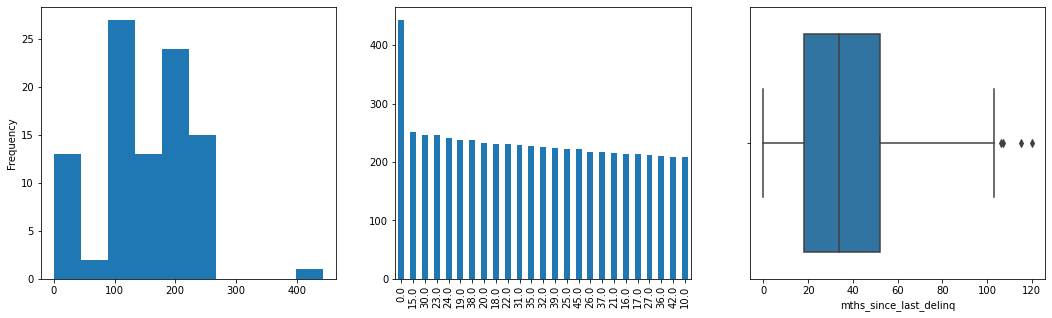

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

loan_df.mths_since_last_delinq.value_counts().plot(kind='hist', ax=ax1)
loan_df.mths_since_last_delinq.value_counts()[0:10].plot(kind='bar', ax=ax2)
sns.boxplot(x='mths_since_last_delinq', data=loan_df, ax=ax3)

plt.show()

#### Note:

This column lets us know the number of months since the borrower's last delinquency.  
- Only 400 people out 13k are not defaulting on monthly payments, so it does not seem to be a strong indicator for whether a person will be "Charged off" or not
- There are more than 60% missing values in this column
- It also seems like this data will not be available during loan application period, hence we are dropping this column

In [22]:
loan_df.drop(['mths_since_last_delinq'], axis=1, inplace=True)

In [23]:
loan_df.shape

(39717, 48)

In [24]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_late_fee recoveries  \
0   10.65%       162.87     B        B2  ...               0.00       0.00   
1   15.27%        59.83     C        C4  ...               0.00     117.08   
2   15.96%        84.33     C        C5  ...               0.00       0.00   
3   13.49%       339.31     C        C1  ...              16.97       0.00   
4   12.69%        67.79     B        B5  ...               0.00       0.00   

  collection_recovery_fee  last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                    0.00        Jan-15          171.62             May-16   
1                    1.11        Apr-13          119.66             Sep-13   
2                    0.00        Jun-14          649.91             May-16   
3                    0.00        Jan-15          357.48             Apr-16   
4                    0.00        May-16           67.79             May-16   

  collections_12_mths_ex_med chargeoff_within_12_mths pub_rec_bankruptcies  \
0                        0.0                      0.0                  0.0   
1                        0.0                      0.0                  0.0   
2                        0.0                      0.0                  0.0   
3                        0.0                      0.0                  0.0   
4                        0.0                      0.0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 48 columns]

###### Observation: about 55% of the columns had no relevant information, and have beend dropped

---

#### Rows - Null Value Analysis

In [25]:
loan_df.dropna(how='all', axis=0).shape

(39717, 48)

##### Observation: There are no rows where all values are missing

In [26]:
loan_df.dropna().shape

(24406, 48)

In [27]:
len(loan_df[loan_df.isnull().sum(axis=1) <= 3])

39673

##### Observation: There are no rows with more than 3 missing values, hence no rows need to be dropped

---

### Feature Extraction
- We will analyze the columns and description and decide whether they are relevant for our analysis or not

In [28]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### Dropping customer behavior columns which are not present at the time of loan application

In [29]:
all_cust_behav_col = ['collection_recovery_fee','delinq_2yrs','earliest_cr_line','inq_last_6mths','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','open_acc','out_prncp','out_prncp_inv','pub_rec','recoveries','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']
loan_df.drop(all_cust_behav_col, axis=1, inplace=True)

##### After analyzing the column description we have decided to drop some columns

| Column          | Reason                                |
|-----------------|---------------------------------------|
| member_id       | similar to id                         |
| funded_amnt     | Data Unavailable when loan is applied |
| funded_amnt_inv | Data Unavailable when loan is applied |
| url             | not required for analysis             |
| desc            | not important for reducing risk       |
| title           | similar to purpose                    |
| zip_code        | country code gives sufficient info    |



In [30]:
loan_df.drop(['member_id', 'funded_amnt', 'funded_amnt_inv', 'url', 'desc', 'title', 'zip_code'], axis=1, inplace=True)

In [31]:
loan_df.shape

(39717, 21)

In [32]:
loan_df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### For the analysis, there is no particular relevance of the `id` column, hence dropping it

In [33]:
loan_df.drop(['id'], axis=1, inplace=True)

##### Looking closely at the data, some of the columns are filled with one value or NaN, so we will drop these as well

In [34]:
loan_df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [35]:
loan_df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [36]:
loan_df.tax_liens.unique()

array([ 0., nan])

In [37]:
loan_df.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1, inplace=True)

In [38]:
loan_df.shape

(39717, 17)

##### Observation: ~15% columns remain after feature selection

##### As a final step we check for correlation between the numeric columns

In [39]:
loan_df.corr()

loan_amnt  installment  annual_inc       dti  \
loan_amnt              1.000000     0.930288    0.271149  0.066439   
installment            0.930288     1.000000    0.270874  0.054186   
annual_inc             0.271149     0.270874    1.000000 -0.122732   
dti                    0.066439     0.054186   -0.122732  1.000000   
pub_rec_bankruptcies  -0.037180    -0.034103   -0.016801  0.005691   

                      pub_rec_bankruptcies  
loan_amnt                        -0.037180  
installment                      -0.034103  
annual_inc                       -0.016801  
dti                               0.005691  
pub_rec_bankruptcies              1.000000

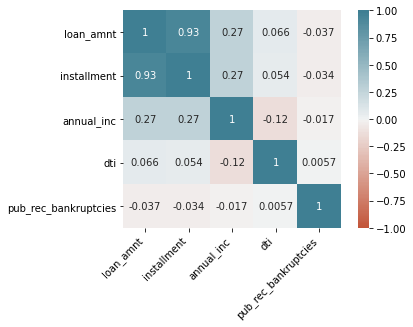

In [40]:
ax = sns.heatmap(
    loan_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Observation: 
- Installament and Loan Amount are positively correlated (strong)
- dti and annual income are negatively correlated (weak)

In [41]:
loan_df.head()

loan_amnt        term int_rate  installment grade sub_grade  \
0       5000   36 months   10.65%       162.87     B        B2   
1       2500   60 months   15.27%        59.83     C        C4   
2       2400   36 months   15.96%        84.33     C        C5   
3      10000   36 months   13.49%       339.31     C        C1   
4       3000   60 months   12.69%        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status         purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off             car         GA   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3     Source Verified  Dec-11   Fully Paid           other         CA  20.00   
4     Source Verified  Dec-11      Current           other         OR  17.94   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [42]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [43]:
loan_df[loan_df.loan_status == 'Current'].shape

(1140, 17)

##### Note: We know that loan applications whose loan_status is Current are not relevant as these applicants cannot be classified as defaulters / non-defaulters as of now and hence these rows can be dropped

In [44]:
loan_df = loan_df[~(loan_df.loan_status == 'Current')]

In [45]:
loan_df.head()

loan_amnt        term int_rate  installment grade sub_grade  \
0       5000   36 months   10.65%       162.87     B        B2   
1       2500   60 months   15.27%        59.83     C        C4   
2       2400   36 months   15.96%        84.33     C        C5   
3      10000   36 months   13.49%       339.31     C        C1   
5       5000   36 months    7.90%       156.46     A        A4   

              emp_title emp_length home_ownership  annual_inc  \
0                   NaN  10+ years           RENT     24000.0   
1                 Ryder   < 1 year           RENT     30000.0   
2                   NaN  10+ years           RENT     12252.0   
3   AIR RESOURCES BOARD  10+ years           RENT     49200.0   
5  Veolia Transportaton    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off             car         GA   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3     Source Verified  Dec-11   Fully Paid           other         CA  20.00   
5     Source Verified  Dec-11   Fully Paid         wedding         AZ  11.20   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
5                   0.0

In [46]:
loan_df.shape

(38577, 17)

###### Observation: Approximately 2.8% rows have been dropped from the data set

---

### Imputing Missing Values

In [47]:
miss_percentage = round(100*(loan_df.isnull().sum()/len(loan_df)), 2)

##### The following columns have missing values which can be imputed

In [48]:
miss_percentage.loc[miss_percentage > 0].index.to_list()

['emp_title', 'emp_length', 'pub_rec_bankruptcies']

In [49]:
miss_percentage.loc[miss_percentage > 0]

emp_title               6.19
emp_length              2.68
pub_rec_bankruptcies    1.81
dtype: float64

#### Employee Title

In [50]:
loan_df.emp_title.value_counts()

US Army                          131
Bank of America                  107
IBM                               65
AT&T                              57
Kaiser Permanente                 56
                                ... 
Discovery Shutters & Shadings      1
School  of Visual Arts             1
orgill inc.                        1
Urban Corps of San Diego           1
MECHANICS BANK                     1
Name: emp_title, Length: 28027, dtype: int64

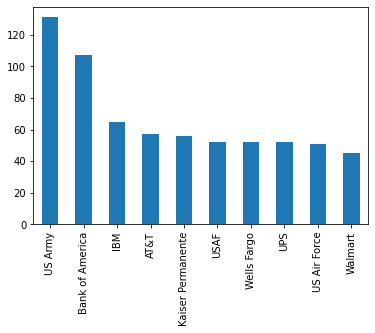

In [51]:
loan_df.emp_title.value_counts()[0:10].plot(kind='bar')
plt.show()

In [52]:
loan_df.emp_title.mode()

0    US Army
dtype: object

##### Note: Dropping emp_title
6% of the data (~1800 entries) is missing in emp_title, however, the most frequenty occuring emp_title (US Army) is ~0.44% (134 entries), hence filling this column with mode will skew the data.   
Moreover, many of the emp_titles are in small numbers, so it may not be fruitful to analyze this column.

In [53]:
loan_df.drop(['emp_title'], axis=1, inplace=True)

In [54]:
loan_df.shape

(38577, 16)

---

#### Employee Length (length of employment)

In [55]:
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

##### Normalizing Employee Length
- Remove years
- Remove year
- Replace < 1 with 0
- Replace 10+ with 10
- convert to numeric data

In [56]:
def clean_up(x):
    str_x = str(x)
    if str(x) == 'nan':
        return x
    else:
        normalized = str_x.replace('years', '').replace('year', '').replace('< 1', '0').replace('10+', '10')
        return int(normalized)

In [57]:
loan_df.emp_length = loan_df.emp_length.apply(clean_up)

In [58]:
loan_df.emp_length.value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [59]:
100*loan_df.emp_length.value_counts()/sum(loan_df.emp_length.value_counts())

10.0    22.608140
0.0     12.007245
2.0     11.429256
3.0     10.686128
4.0      8.901556
5.0      8.507351
1.0      8.440763
6.0      5.774558
7.0      4.557319
8.0      3.822182
9.0      3.265502
Name: emp_length, dtype: float64

In [60]:
loan_df.emp_length.isnull().sum()

1033

In [61]:
loan_df.emp_length.describe()

count    37544.000000
mean         4.940976
std          3.557082
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

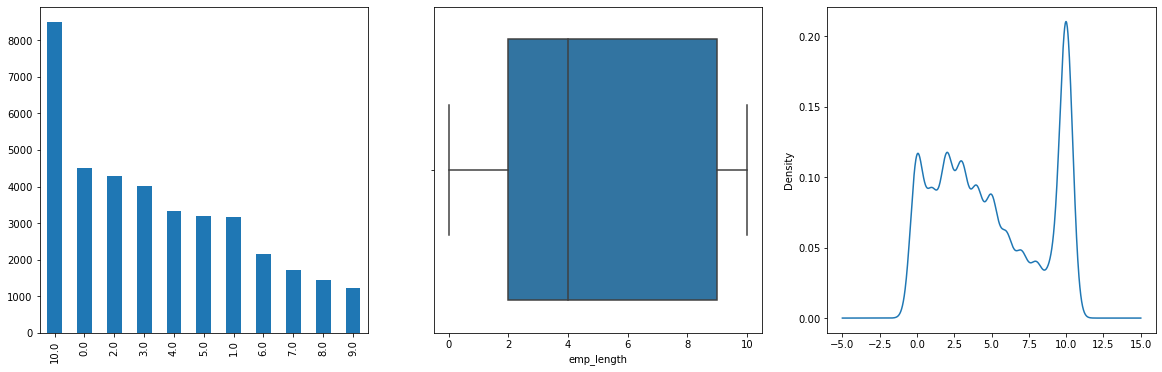

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

loan_df.emp_length.value_counts().plot(kind='bar', ax=ax1)
sns.boxplot(x='emp_length', data=loan_df, ax=ax2)
# sns.kdeplot(x='emp_length', data=loan_df, ax=ax3)
loan_df.emp_length.plot(kind='kde', ax=ax3)

plt.show()

##### Imputing null values of emp_length with mode
- Looking at the plots, it is more likely that the missing values will be filled with 10 (mode)
- This was originally categorical data, which is usually filled with mode

In [63]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace=True)

In [64]:
loan_df.emp_length.isnull().sum()

0

In [65]:
loan_df.emp_length.value_counts()

10.0    9521
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

##### Checking impact of imputing with mode via plots

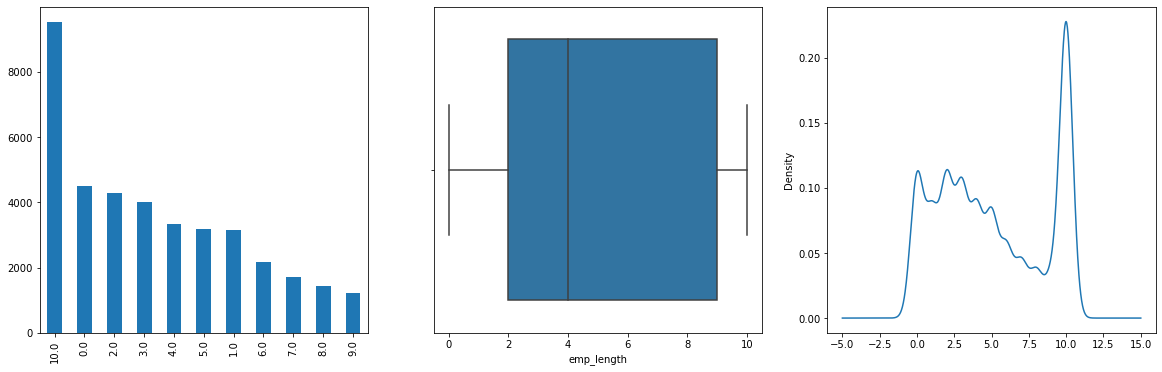

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

loan_df.emp_length.value_counts().plot(kind='bar', ax=ax1)
sns.boxplot(x='emp_length', data=loan_df, ax=ax2)
# sns.kdeplot(x='emp_length', data=loan_df, ax=ax3)
loan_df.emp_length.plot(kind='kde', ax=ax3)

plt.show()

##### Observation: The plots look similar before and after imputation, hence filling with mode is a good approach.

---

#### Public Bankruptcies

In [67]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [68]:
loan_df.pub_rec_bankruptcies.isnull().sum()

697

##### Imputing the missing values for public bankruptcies with 0 (mode) as out of 38k+ records 36k+ records are filled with 0

In [69]:
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace=True)

In [70]:
loan_df.pub_rec_bankruptcies.isnull().sum()

0

In [71]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

---

In [72]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_length            38577 non-null  float64
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  addr_state            38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  pub_rec_bankruptcie

##### Observation: 
- There are total 38577 records in the data
- All null values have been imputed except for mths_since_last_delinq

---


### Derived Columns

#### Converting issue_d column to Date Time format
- this will help in adding month and year columns

In [73]:
loan_df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [74]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format="%b-%y")

In [75]:
loan_df['month'] = pd.DatetimeIndex(loan_df.issue_d).month

In [76]:
loan_df['year'] = pd.DatetimeIndex(loan_df.issue_d).year

In [77]:
loan_df['month_alpha'] = loan_df.issue_d.apply(lambda x: x.strftime('%b'))

In [78]:
loan_df.head()

loan_amnt        term int_rate  installment grade sub_grade  emp_length  \
0       5000   36 months   10.65%       162.87     B        B2        10.0   
1       2500   60 months   15.27%        59.83     C        C4         0.0   
2       2400   36 months   15.96%        84.33     C        C5        10.0   
3      10000   36 months   13.49%       339.31     C        C1        10.0   
5       5000   36 months    7.90%       156.46     A        A4         3.0   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01   Fully Paid   

          purpose addr_state    dti  pub_rec_bankruptcies  month  year  \
0     credit_card         AZ  27.65                   0.0     12  2011   
1             car         GA   1.00                   0.0     12  2011   
2  small_business         IL   8.72                   0.0     12  2011   
3           other         CA  20.00                   0.0     12  2011   
5         wedding         AZ  11.20                   0.0     12  2011   

  month_alpha  
0         Dec  
1         Dec  
2         Dec  
3         Dec  
5         Dec

---

##### Grade
- Deriving Column: Encoding such that A 6, B becomes 5 and so on

In [79]:
loan_df.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [80]:
loan_df['grade_num'] = loan_df.grade.apply(lambda x: int(x.replace('A', '6').replace('B', '5').replace('C', '4').replace('D', '3').replace('E', '2').replace('F', '1').replace('G', '0')))

In [81]:
loan_df.head()

loan_amnt        term int_rate  installment grade sub_grade  emp_length  \
0       5000   36 months   10.65%       162.87     B        B2        10.0   
1       2500   60 months   15.27%        59.83     C        C4         0.0   
2       2400   36 months   15.96%        84.33     C        C5        10.0   
3      10000   36 months   13.49%       339.31     C        C1        10.0   
5       5000   36 months    7.90%       156.46     A        A4         3.0   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01   Fully Paid   

          purpose addr_state    dti  pub_rec_bankruptcies  month  year  \
0     credit_card         AZ  27.65                   0.0     12  2011   
1             car         GA   1.00                   0.0     12  2011   
2  small_business         IL   8.72                   0.0     12  2011   
3           other         CA  20.00                   0.0     12  2011   
5         wedding         AZ  11.20                   0.0     12  2011   

  month_alpha  grade_num  
0         Dec          5  
1         Dec          4  
2         Dec          4  
3         Dec          4  
5         Dec          6

---

##### Sub Grade
- Deriving Column: Encoding such that A1 becomes 66, A2 becomes 65, C3 becomes 42

In [82]:
loan_df.sub_grade.value_counts().head()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
Name: sub_grade, dtype: int64

###### Observation: Subgrade contains grade information as well

In [83]:
loan_df.loc[:,['grade', 'sub_grade']]

grade sub_grade
0         B        B2
1         C        C4
2         C        C5
3         C        C1
5         A        A4
...     ...       ...
39712     A        A4
39713     C        C1
39714     A        A4
39715     A        A2
39716     E        E2

[38577 rows x 2 columns]

In [84]:
loan_df['sub_grade_num'] = loan_df.sub_grade.apply(lambda x: x.replace('6', '1').replace('5', '2').replace('4', '3').replace('3', '2').replace('2', '1').replace('1', '0').replace('G', '0'))
loan_df['sub_grade_num'] = loan_df.sub_grade.apply(lambda x: int(x.replace('A', '6').replace('B', '5').replace('C', '4').replace('D', '3').replace('E', '2').replace('F', '1').replace('G', '0')))

In [85]:
loan_df.head()

loan_amnt        term int_rate  installment grade sub_grade  emp_length  \
0       5000   36 months   10.65%       162.87     B        B2        10.0   
1       2500   60 months   15.27%        59.83     C        C4         0.0   
2       2400   36 months   15.96%        84.33     C        C5        10.0   
3      10000   36 months   13.49%       339.31     C        C1        10.0   
5       5000   36 months    7.90%       156.46     A        A4         3.0   

  home_ownership  annual_inc verification_status  ...  loan_status  \
0           RENT     24000.0            Verified  ...   Fully Paid   
1           RENT     30000.0     Source Verified  ...  Charged Off   
2           RENT     12252.0        Not Verified  ...   Fully Paid   
3           RENT     49200.0     Source Verified  ...   Fully Paid   
5           RENT     36000.0     Source Verified  ...   Fully Paid   

          purpose addr_state    dti  pub_rec_bankruptcies  month  year  \
0     credit_card         AZ  27.65                   0.0     12  2011   
1             car         GA   1.00                   0.0     12  2011   
2  small_business         IL   8.72                   0.0     12  2011   
3           other         CA  20.00                   0.0     12  2011   
5         wedding         AZ  11.20                   0.0     12  2011   

   month_alpha grade_num  sub_grade_num  
0          Dec         5             52  
1          Dec         4             44  
2          Dec         4             45  
3          Dec         4             41  
5          Dec         6             64  

[5 rows x 21 columns]

---

##### Loan Status
Since there are two types of categorical values, we can convert them to a numeric type for better analysis
- charged off => 0
- paid => 1

Adding a loan_status_num column for future usage as per requirement

In [86]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [87]:
loan_df['loan_status_num'] = loan_df.loan_status.apply(lambda x: int(x.replace('Fully Paid', '1').replace('Charged Off', '0')))

In [88]:
loan_df['loan_status_num'].value_counts()

1    32950
0     5627
Name: loan_status_num, dtype: int64

---

### Normalizing Data

In [89]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   term                  38577 non-null  object        
 2   int_rate              38577 non-null  object        
 3   installment           38577 non-null  float64       
 4   grade                 38577 non-null  object        
 5   sub_grade             38577 non-null  object        
 6   emp_length            38577 non-null  float64       
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  addr_state      

#### Let's look at columns which have "object" as dtype (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html))

In [90]:
loan_df.select_dtypes('object')

term int_rate grade sub_grade home_ownership verification_status  \
0       36 months   10.65%     B        B2           RENT            Verified   
1       60 months   15.27%     C        C4           RENT     Source Verified   
2       36 months   15.96%     C        C5           RENT        Not Verified   
3       36 months   13.49%     C        C1           RENT     Source Verified   
5       36 months    7.90%     A        A4           RENT     Source Verified   
...           ...      ...   ...       ...            ...                 ...   
39712   36 months    8.07%     A        A4       MORTGAGE        Not Verified   
39713   36 months   10.28%     C        C1           RENT        Not Verified   
39714   36 months    8.07%     A        A4       MORTGAGE        Not Verified   
39715   36 months    7.43%     A        A2       MORTGAGE        Not Verified   
39716   36 months   13.75%     E        E2            OWN        Not Verified   

       loan_status             purpose addr_state month_alpha  
0       Fully Paid         credit_card         AZ         Dec  
1      Charged Off                 car         GA         Dec  
2       Fully Paid      small_business         IL         Dec  
3       Fully Paid               other         CA         Dec  
5       Fully Paid             wedding         AZ         Dec  
...            ...                 ...        ...         ...  
39712   Fully Paid    home_improvement         CO         Jul  
39713   Fully Paid         credit_card         NC         Jul  
39714   Fully Paid  debt_consolidation         MA         Jul  
39715   Fully Paid               other         MD         Jul  
39716   Fully Paid  debt_consolidation         MA         Jun  

[38577 rows x 10 columns]

##### term - 36 months / 60 months
- convert to 0/1 where 
- 0 represents smaller term length (36 months) & 
- 1 represents larger term length of 60 months

We can do this later in the analysis

In [91]:
loan_df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [92]:
# loan_df.term = loan_df.term.apply(lambda x: float(x.replace('36 months', 0).replace('60 months', 1)))

In [93]:
loan_df.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
5     36 months
Name: term, dtype: object

---

##### interest rate
- convert to numeric by dropping percentage

In [94]:
loan_df.int_rate.value_counts().head()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
Name: int_rate, dtype: int64

In [95]:
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(x.replace('%', '')))

In [96]:
loan_df.int_rate.value_counts().head()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
Name: int_rate, dtype: int64

---

##### Home Ownersip
- replace NONE with RENT

In [97]:
loan_df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

###### Imputing NONE with mode (i.e. RENT)

In [98]:
loan_df.home_ownership = loan_df.home_ownership.apply(lambda x: x.replace('NONE', 'RENT'))

In [99]:
loan_df.home_ownership.value_counts()

RENT        18483
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64

---

##### Verification Status

In [100]:
loan_df.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

---

##### Purpose

In [101]:
loan_df.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

---

##### State (Address State - US)

In [102]:
loan_df.addr_state.value_counts().head()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
Name: addr_state, dtype: int64

In [103]:
loan_df.select_dtypes('object').head(2)

term grade sub_grade home_ownership verification_status  loan_status  \
0   36 months     B        B2           RENT            Verified   Fully Paid   
1   60 months     C        C4           RENT     Source Verified  Charged Off   

       purpose addr_state month_alpha  
0  credit_card         AZ         Dec  
1          car         GA         Dec

---

#### Let's look at numeric columns

In [104]:
loan_df.select_dtypes('int64').head(2)

loan_amnt  month  year  grade_num  sub_grade_num  loan_status_num
0       5000     12  2011          5             52                1
1       2500     12  2011          4             44                0

In [105]:
loan_df.select_dtypes('float64').head(2)

int_rate  installment  emp_length  annual_inc    dti  pub_rec_bankruptcies
0     10.65       162.87        10.0     24000.0  27.65                   0.0
1     15.27        59.83         0.0     30000.0   1.00                   0.0

#### Setting dtype to int for bankruptcies and length of employment 
- as these values are distinct integers


In [106]:
loan_df.pub_rec_bankruptcies = loan_df.pub_rec_bankruptcies.astype('int64')
loan_df.annual_inc = loan_df.annual_inc.astype('int64')
loan_df.emp_length = loan_df.emp_length.astype('int64')

In [107]:
loan_df.select_dtypes('int64').head(2)

loan_amnt  emp_length  annual_inc  pub_rec_bankruptcies  month  year  \
0       5000          10       24000                     0     12  2011   
1       2500           0       30000                     0     12  2011   

   grade_num  sub_grade_num  loan_status_num  
0          5             52                1  
1          4             44                0

In [108]:
loan_df.select_dtypes('float64').head(2)

int_rate  installment    dti
0     10.65       162.87  27.65
1     15.27        59.83   1.00

---

### Deriving Categorical Columns

In [109]:
loan_df.shape

(38577, 22)

In [110]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   term                  38577 non-null  object        
 2   int_rate              38577 non-null  float64       
 3   installment           38577 non-null  float64       
 4   grade                 38577 non-null  object        
 5   sub_grade             38577 non-null  object        
 6   emp_length            38577 non-null  int64         
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  int64         
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  addr_state      

In [111]:
categorical_data = loan_df.select_dtypes('object').columns.to_list()
print(categorical_data)

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'month_alpha']


In [112]:
integer_data = loan_df.select_dtypes('int64').columns.to_list()
print(integer_data)

['loan_amnt', 'emp_length', 'annual_inc', 'pub_rec_bankruptcies', 'month', 'year', 'grade_num', 'sub_grade_num', 'loan_status_num']


In [113]:
continous_float_data = loan_df.select_dtypes('float64').columns.to_list()
print(continous_float_data)

['int_rate', 'installment', 'dti']


---

##### Loan Amount can be categorized into 5 categories (Very Small to Very Large)

This can be done using cut (divide data into custom bins)

In [114]:
loan_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [115]:
bins = [499, 5000, 10000, 20000, 30000, 40000]
pd.cut(loan_df.loan_amnt, bins=bins).unique()

[(499, 5000], (5000, 10000], (10000, 20000], (20000, 30000], (30000, 40000]]
Categories (5, interval[int64]): [(499, 5000] < (5000, 10000] < (10000, 20000] < (20000, 30000] < (30000, 40000]]

In [116]:
labels = ['Very Small (<5k)', 'Small (<10k)', 'Medium (<20k)', 'Large (<30k)', 'Very Large (>30k)']
loan_df['loan_amount_cat'] = pd.cut(loan_df.loan_amnt, bins=bins, labels=labels)

In [117]:
loan_df.head(2)

loan_amnt        term  int_rate  installment grade sub_grade  emp_length  \
0       5000   36 months     10.65       162.87     B        B2          10   
1       2500   60 months     15.27        59.83     C        C4           0   

  home_ownership  annual_inc verification_status  ... addr_state    dti  \
0           RENT       24000            Verified  ...         AZ  27.65   
1           RENT       30000     Source Verified  ...         GA   1.00   

  pub_rec_bankruptcies month  year  month_alpha  grade_num  sub_grade_num  \
0                    0    12  2011          Dec          5             52   
1                    0    12  2011          Dec          4             44   

  loan_status_num   loan_amount_cat  
0               1  Very Small (<5k)  
1               0  Very Small (<5k)  

[2 rows x 23 columns]

---

#### Interest can be binned into 5 categories
- low
- medium
- high

In [118]:
loan_df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [119]:
labels = ['low (<7%)', 'medium (<15%)', 'high (>15%)']
bins = [5.41, 7, 15, 25]
pd.cut(loan_df.int_rate, bins=bins).unique()

[(7.0, 15.0], (15.0, 25.0], (5.41, 7.0]]
Categories (3, interval[float64]): [(5.41, 7.0] < (7.0, 15.0] < (15.0, 25.0]]

In [120]:
loan_df['int_rate_cat'] = pd.cut(loan_df.int_rate, bins=bins, labels=labels)

In [121]:
loan_df.head(2)

loan_amnt        term  int_rate  installment grade sub_grade  emp_length  \
0       5000   36 months     10.65       162.87     B        B2          10   
1       2500   60 months     15.27        59.83     C        C4           0   

  home_ownership  annual_inc verification_status  ...    dti  \
0           RENT       24000            Verified  ...  27.65   
1           RENT       30000     Source Verified  ...   1.00   

  pub_rec_bankruptcies month  year  month_alpha  grade_num  sub_grade_num  \
0                    0    12  2011          Dec          5             52   
1                    0    12  2011          Dec          4             44   

   loan_status_num   loan_amount_cat   int_rate_cat  
0                1  Very Small (<5k)  medium (<15%)  
1                0  Very Small (<5k)    high (>15%)  

[2 rows x 24 columns]

---

#### Debt To Income can be binned into 5 categories
- very_low
- low
- medium
- high
- very_high

In [122]:
loan_df.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [123]:
loan_df.dti.value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
27.20      1
28.08      1
27.52      1
28.54      1
Name: dti, Length: 2853, dtype: int64

In [124]:
pd.qcut(loan_df.dti, q=5).unique()

[(19.71, 29.99], (-0.001, 6.91], (6.91, 11.35], (15.31, 19.71], (11.35, 15.31]]
Categories (5, interval[float64]): [(-0.001, 6.91] < (6.91, 11.35] < (11.35, 15.31] < (15.31, 19.71] < (19.71, 29.99]]

In [125]:
labels = ['Very Low (<6.91%)', 'low (<11.35%)', 'medium (<15.31%)', 'high (<19.71%)', 'Very High (>19.71%)']
loan_df['dti_cat'] = pd.qcut(loan_df.dti, q=5, labels=labels)

In [126]:
loan_df.head(2)

loan_amnt        term  int_rate  installment grade sub_grade  emp_length  \
0       5000   36 months     10.65       162.87     B        B2          10   
1       2500   60 months     15.27        59.83     C        C4           0   

  home_ownership  annual_inc verification_status  ... pub_rec_bankruptcies  \
0           RENT       24000            Verified  ...                    0   
1           RENT       30000     Source Verified  ...                    0   

  month  year month_alpha  grade_num  sub_grade_num  loan_status_num  \
0    12  2011         Dec          5             52                1   
1    12  2011         Dec          4             44                0   

    loan_amount_cat   int_rate_cat              dti_cat  
0  Very Small (<5k)  medium (<15%)  Very High (>19.71%)  
1  Very Small (<5k)    high (>15%)    Very Low (<6.91%)  

[2 rows x 25 columns]

---

In [127]:
loan_df.select_dtypes('float64').head(2)

int_rate  installment    dti
0     10.65       162.87  27.65
1     15.27        59.83   1.00

In [128]:
loan_df.select_dtypes('int64').head(2)

loan_amnt  emp_length  annual_inc  pub_rec_bankruptcies  month  year  \
0       5000          10       24000                     0     12  2011   
1       2500           0       30000                     0     12  2011   

   grade_num  sub_grade_num  loan_status_num  
0          5             52                1  
1          4             44                0

In [129]:
loan_df.select_dtypes('object').head(2)

term grade sub_grade home_ownership verification_status  loan_status  \
0   36 months     B        B2           RENT            Verified   Fully Paid   
1   60 months     C        C4           RENT     Source Verified  Charged Off   

       purpose addr_state month_alpha  
0  credit_card         AZ         Dec  
1          car         GA         Dec

In [130]:
loan_df.describe()

loan_amnt      int_rate   installment    emp_length    annual_inc  \
count  38577.000000  38577.000000  38577.000000  38577.000000  3.857700e+04   
mean   11047.025430     11.932219    322.466318      5.076445  6.877797e+04   
std     7348.441646      3.691327    208.639215      3.602917  6.421868e+04   
min      500.000000      5.420000     15.690000      0.000000  4.000000e+03   
25%     5300.000000      8.940000    165.740000      2.000000  4.000000e+04   
50%     9600.000000     11.710000    277.860000      4.000000  5.886800e+04   
75%    15000.000000     14.380000    425.550000      9.000000  8.200000e+04   
max    35000.000000     24.400000   1305.190000     10.000000  6.000000e+06   

                dti  pub_rec_bankruptcies         month          year  \
count  38577.000000          38577.000000  38577.000000  38577.000000   
mean      13.272727              0.042694      7.114757   2010.309070   
std        6.673044              0.202809      3.408523      0.882658   
min        0.000000              0.000000      1.000000   2007.000000   
25%        8.130000              0.000000      4.000000   2010.000000   
50%       13.370000              0.000000      7.000000   2011.000000   
75%       18.560000              0.000000     10.000000   2011.000000   
max       29.990000              2.000000     12.000000   2011.000000   

          grade_num  sub_grade_num  loan_status_num  
count  38577.000000   38577.000000     38577.000000  
mean       4.446639      47.518781         0.854136  
std        1.380003      14.138758         0.352975  
min        0.000000       1.000000         0.000000  
25%        4.000000      41.000000         1.000000  
50%        5.000000      52.000000         1.000000  
75%        6.000000      61.000000         1.000000  
max        6.000000      65.000000         1.000000

---

## Univariate Analysis
- Perform univariate analysis on each of the columns

In [131]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   term                  38577 non-null  object        
 2   int_rate              38577 non-null  float64       
 3   installment           38577 non-null  float64       
 4   grade                 38577 non-null  object        
 5   sub_grade             38577 non-null  object        
 6   emp_length            38577 non-null  int64         
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  int64         
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  addr_state      

##### Loan Amount

In [132]:
loan_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

##### Observation: The minimum loan applied is 500USD and maximum loan applied is 35000 USD

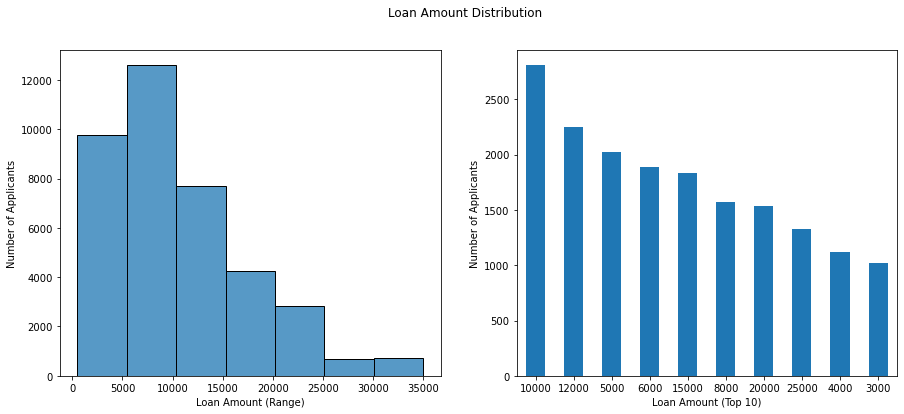

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

plt.suptitle('Loan Amount Distribution')
sns.histplot(loan_df.loan_amnt, bins=7, ax=ax1)
loan_df.loan_amnt.value_counts()[0:10].plot(kind='bar', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_xlabel('Loan Amount (Top 10)')
ax2.set_ylabel('Number of Applicants')
ax1.set_xlabel('Loan Amount (Range)')
ax1.set_ylabel('Number of Applicants')
plt.show()

Observations:
- Most people are applying for a loan within a range of 5000 - 10000 USD

---


##### Term

In [134]:
loan_df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

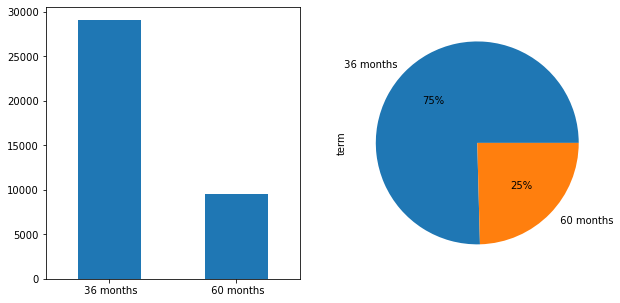

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

loan_df.term.value_counts().plot(kind='bar', ax=ax1)
loan_df.term.value_counts().plot(kind='pie', ax=ax2, autopct='%1.0f%%')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
plt.show()

In [136]:
loan_df.term.value_counts(normalize=True)*100

 36 months    75.42318
 60 months    24.57682
Name: term, dtype: float64

##### Every 3 out of 4 people choose 36 months term loan

---

In [137]:
col_large_unique = []
col_small_unique = []
for col in loan_df:
    if len(loan_df[col].unique()) > 14:
#         print(col, ':',len(loan_df[col].unique()))
        col_large_unique.append(col)
    else:
        col_small_unique.append(col)

# subgrade num will be analyzed when analyzing sub_grade itself
col_large_unique.remove('sub_grade_num')
# date column should not be analyzed as categorical data
col_large_unique.remove('issue_d')

# grade_num plots will be covered in grade
col_small_unique.remove('grade_num')
# loan_status_num plots will be covered in loan_status
col_small_unique.remove('loan_status_num')

print('large:', col_large_unique)
print('small:', col_small_unique)

large: ['loan_amnt', 'int_rate', 'installment', 'sub_grade', 'annual_inc', 'addr_state', 'dti']
small: ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'pub_rec_bankruptcies', 'month', 'year', 'month_alpha', 'loan_amount_cat', 'int_rate_cat', 'dti_cat']


In [138]:
def plot_large(loan_df, column):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
    plt.suptitle(column)
    try:
        sns.histplot(loan_df[column], bins=7, ax=ax1)
        ax1.set_xticks(ax1.get_xticklabels(), rotation=90)
    except:
        pass
    try:
        if column == 'dti':
            sns.kdeplot(x='dti', data=loan_df, ax=ax2)
        else:
            loan_df[column].value_counts()[0:10].plot(kind='bar', ax=ax2)
    except:
        try:
            sns.kdeplot(x=column, data=loan_df, ax=ax2)
        except:
            pass
        pass
    try:
        if column == 'sub_grade':
            sns.boxplot(x='sub_grade_num', data=loan_df, ax=ax3)
            ax3.set_xlabel('Sub Grade Encoded')
        else:
            sns.boxplot(x=column, data=loan_df, ax=ax3)
    except:
        pass
    plt.savefig(f"{column}.png")
    plt.show()

#### Plots for Continous Features

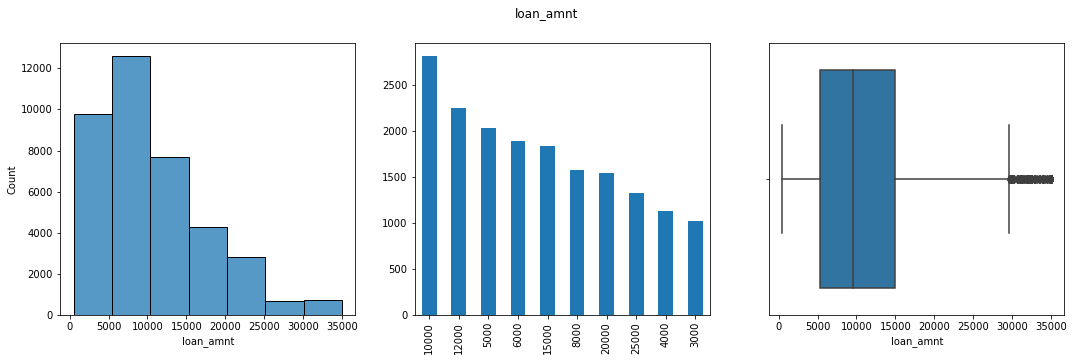

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


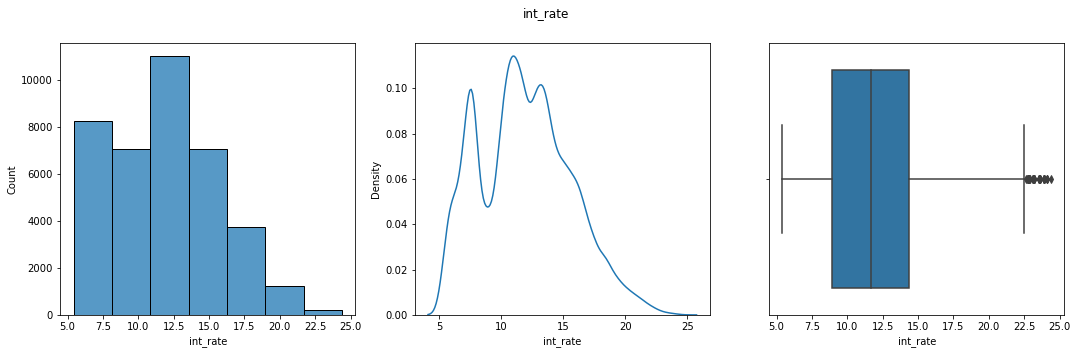

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64


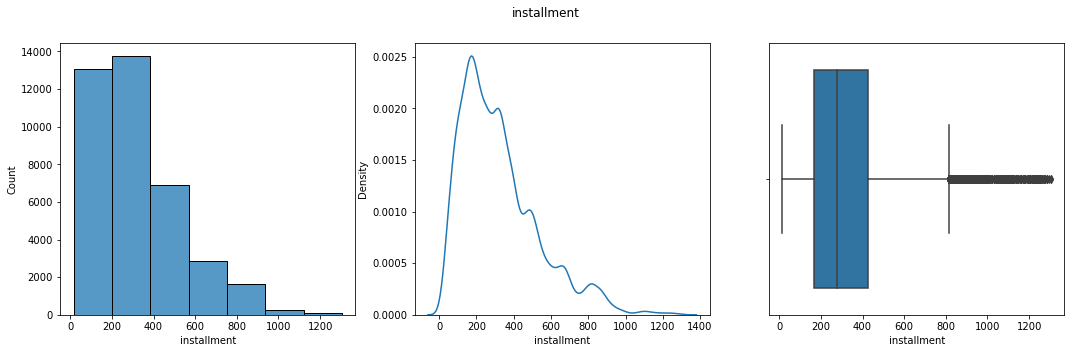

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64


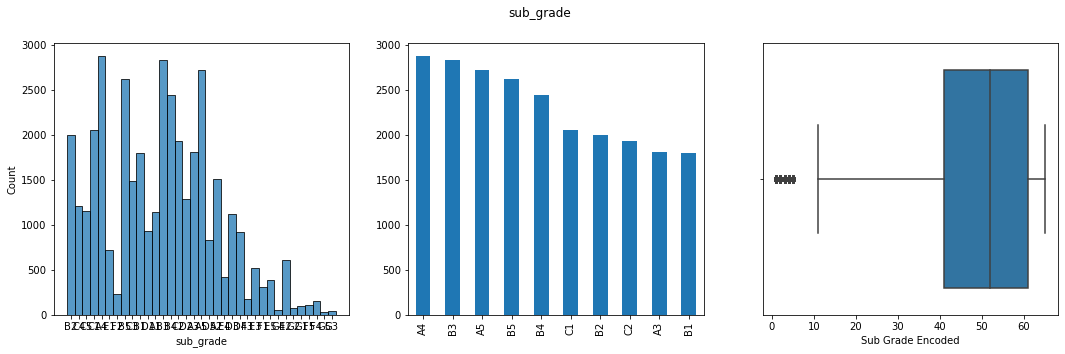

count    38577.000000
mean        47.518781
std         14.138758
min          1.000000
25%         41.000000
50%         52.000000
75%         61.000000
max         65.000000
Name: sub_grade_num, dtype: float64


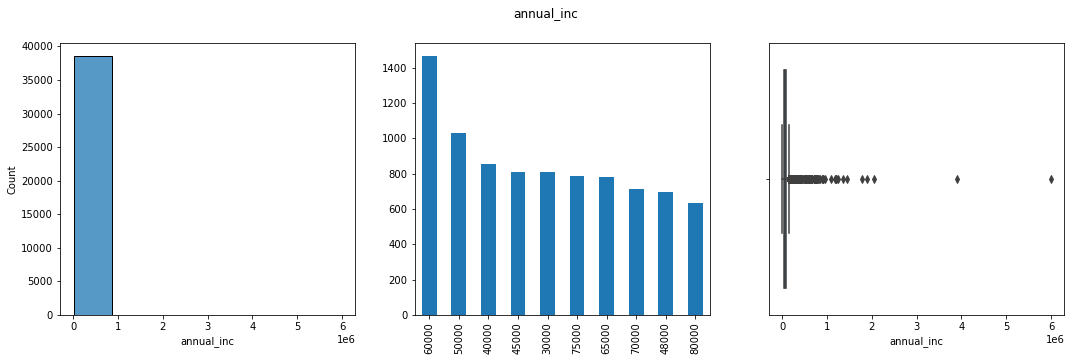

Plotting Annual Income after removing outliers (discard >99th percentile)


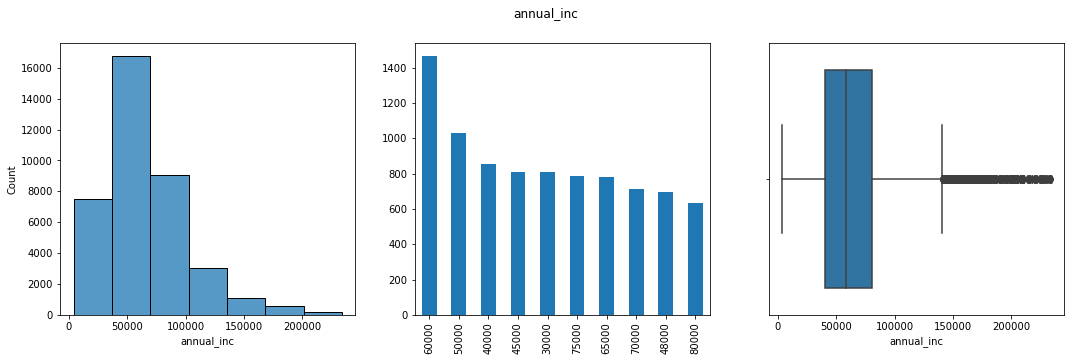

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


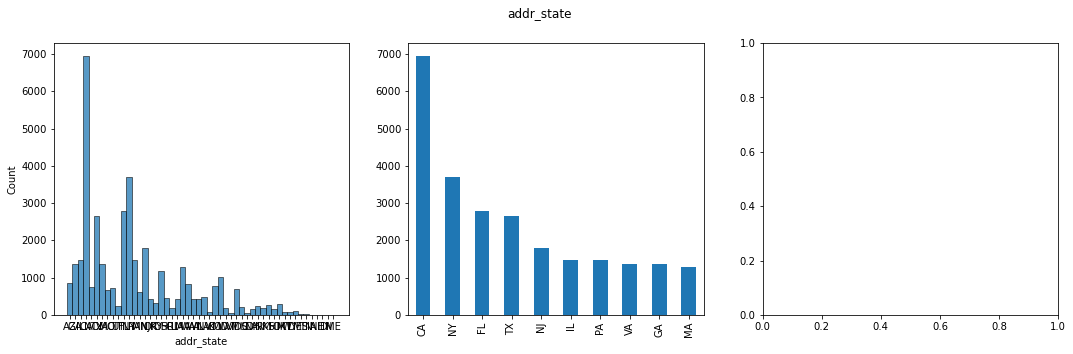

count     38577
unique       50
top          CA
freq       6949
Name: addr_state, dtype: object


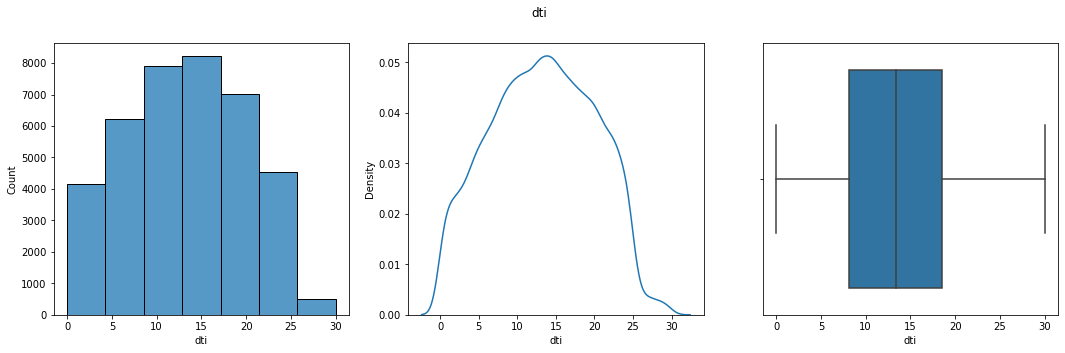

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


In [139]:
import traceback

for column in col_large_unique:
    try:
        plot_large(loan_df, column)
        if column == 'annual_inc':
            print('Plotting Annual Income after removing outliers (discard >99th percentile)')
            plot_large(loan_df[loan_df['annual_inc']<loan_df['annual_inc'].quantile(q=0.99)], column)
            print(loan_df[column].describe())
        elif column == 'sub_grade':
            print(loan_df['sub_grade_num'].describe())
        elif column == 'emp_length':
            print(loan_df[column].describe())
            print(loan_df['emp_length'].value_counts())
        else:
            print(loan_df[column].describe())
            
    except:
        print(traceback.format_exc())

### Observation from features that have more than 14 distinct values
#### Loan Amount
- Maximum people are taking loans between 5000-10000 USD
- 50% (25th percentile to 75th percentile) of the loans are between 5k USD to 15k USD
- 30k+ USD can be considered as outliers

#### Interest Rate
- For 25% of the applicants, the interest rate is less than 8.94%
- ~50% of the applicatns have interest rate between ~9% to 14%
- Minium interest rate is 5.42% and Maximum is 24.4%

#### Installment
- 75% of the applicants are paying installment less than 425 USD
- The installment can go as low as 15 dollars
- The installment distribution is right skewed (median is quite less than mean)

#### Sub Grade
- 75% of the Applications have a grade between A to C. 
- The distribution is skewed towards people having higher grade (A being the highest)
- People having A4, B3, A5 sub grades are most common
- People having G grade apply but are seldom in number. 

#### Annual Income
- There is a large range in annual income (4k USD to 6Million USD).
- The 75th percentile has annual income of 82k USD while the maximum is 6 Million, indicating that there are outliers in the higher range.

#### Address State
- Most applications are from California, New York and Florida
- 18% applications are from California

#### DTI
- The Debt to Income ratio is approximately normally distributed
- The spread of the data is wide as the standard deviation is 6.7%
- The mean and median for DTI is 13.3%

In [140]:
# as per the observation in annual income, we should select values without outlies for further analysis
loan_df[loan_df['annual_inc']<loan_df['annual_inc'].quantile(q=0.99)].shape

(38191, 25)

In [141]:
loan_df.shape

(38577, 25)

##### Removing outliers (>99th percentile values) from annual income
- Losing 386 (1%) values in the process

In [142]:
loan_df = loan_df[loan_df['annual_inc']<loan_df['annual_inc'].quantile(q=0.99)]

In [143]:
loan_df.head()

loan_amnt        term  int_rate  installment grade sub_grade  emp_length  \
0       5000   36 months     10.65       162.87     B        B2          10   
1       2500   60 months     15.27        59.83     C        C4           0   
2       2400   36 months     15.96        84.33     C        C5          10   
3      10000   36 months     13.49       339.31     C        C1          10   
5       5000   36 months      7.90       156.46     A        A4           3   

  home_ownership  annual_inc verification_status  ... pub_rec_bankruptcies  \
0           RENT       24000            Verified  ...                    0   
1           RENT       30000     Source Verified  ...                    0   
2           RENT       12252        Not Verified  ...                    0   
3           RENT       49200     Source Verified  ...                    0   
5           RENT       36000     Source Verified  ...                    0   

  month  year month_alpha  grade_num  sub_grade_num  loan_status_num  \
0    12  2011         Dec          5             52                1   
1    12  2011         Dec          4             44                0   
2    12  2011         Dec          4             45                1   
3    12  2011         Dec          4             41                1   
5    12  2011         Dec          6             64                1   

    loan_amount_cat   int_rate_cat              dti_cat  
0  Very Small (<5k)  medium (<15%)  Very High (>19.71%)  
1  Very Small (<5k)    high (>15%)    Very Low (<6.91%)  
2  Very Small (<5k)    high (>15%)        low (<11.35%)  
3      Small (<10k)  medium (<15%)  Very High (>19.71%)  
5  Very Small (<5k)  medium (<15%)        low (<11.35%)  

[5 rows x 25 columns]

In [144]:
def plot_small(loan_df, column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    if column in ['purpose', 'emp_length']:
        sns.countplot(y = column, data=loan_df, ax=ax1,
                     order = loan_df[column].value_counts().index)
        loan_df[column].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    elif column == 'month':
        sns.countplot(y = 'month_alpha', data=loan_df, ax=ax1,
                     order = loan_df['month_alpha'].value_counts().index)
        loan_df['month_alpha'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    else:
        sns.countplot(x = column, data=loan_df, ax=ax1)
        loan_df[column].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    plt.suptitle(column)
    plt.savefig(f"{column}.png")
    plt.show()

#### Plots for Distinict Features

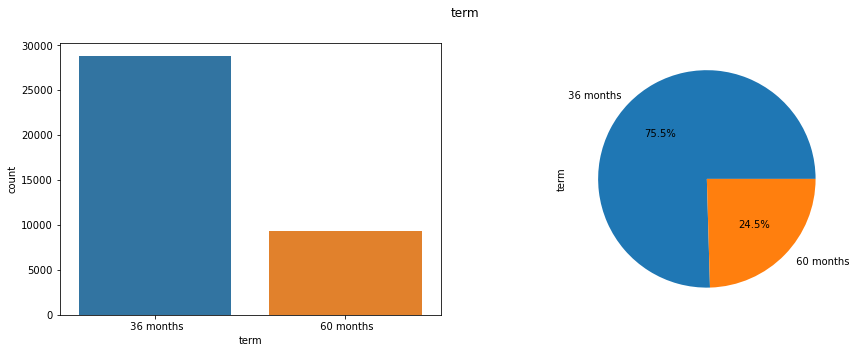

 36 months    28819
 60 months     9372
Name: term, dtype: int64


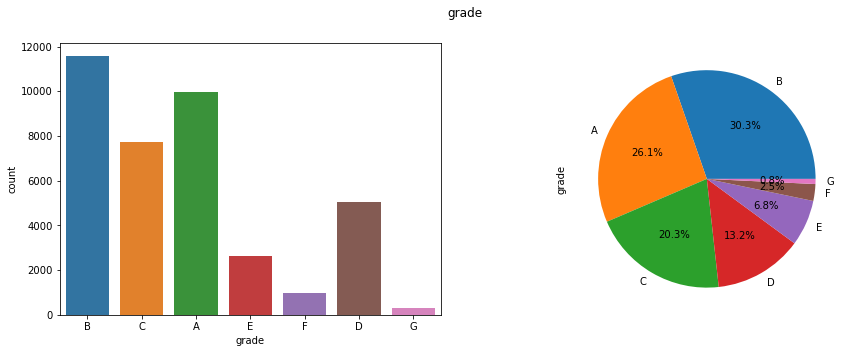

B    11581
A     9977
C     7753
D     5027
E     2610
F      954
G      289
Name: grade, dtype: int64


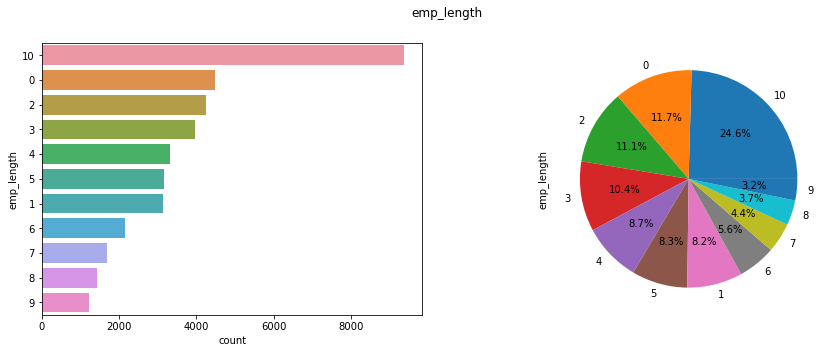

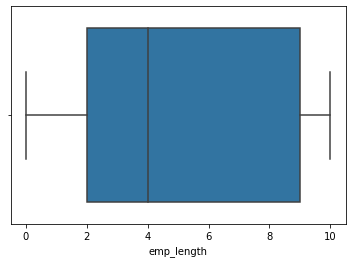

10    9382
0     4479
2     4245
3     3977
4     3315
5     3168
1     3143
6     2151
7     1697
8     1419
9     1215
Name: emp_length, dtype: int64


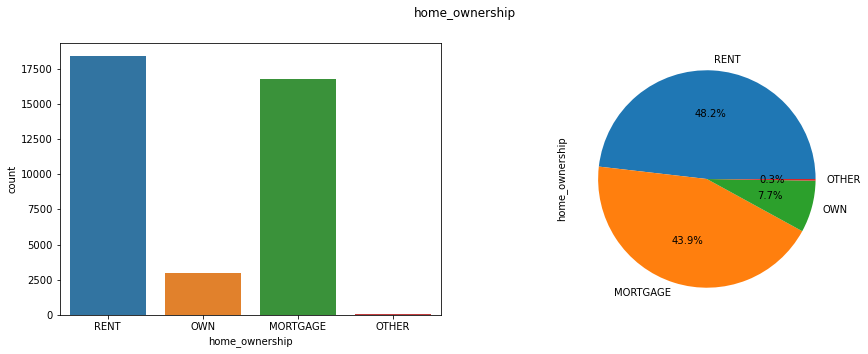

RENT        18400
MORTGAGE    16748
OWN          2947
OTHER          96
Name: home_ownership, dtype: int64


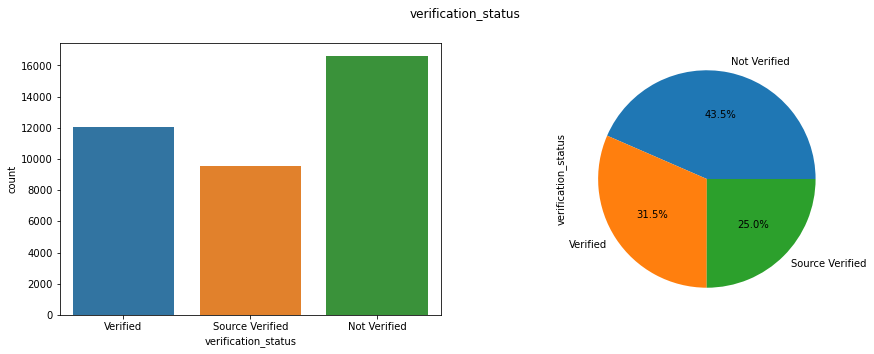

Not Verified       16604
Verified           12031
Source Verified     9556
Name: verification_status, dtype: int64


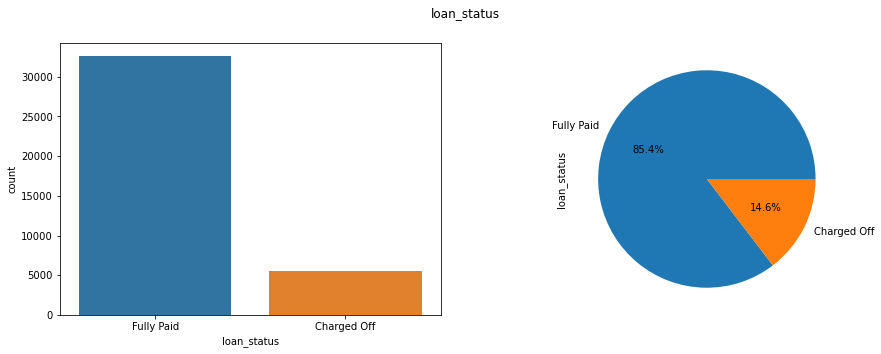

Fully Paid     32607
Charged Off     5584
Name: loan_status, dtype: int64


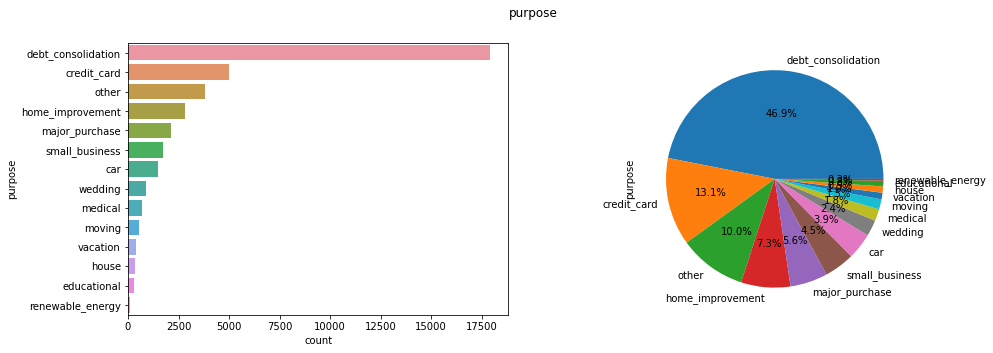

debt_consolidation    17917
credit_card            4987
other                  3831
home_improvement       2797
major_purchase         2129
small_business         1723
car                    1491
wedding                 917
medical                 674
moving                  570
vacation                375
house                   357
educational             323
renewable_energy        100
Name: purpose, dtype: int64


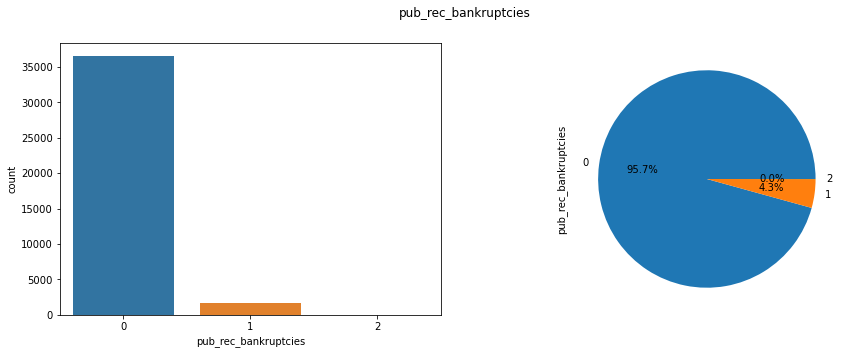

0    36553
1     1633
2        5
Name: pub_rec_bankruptcies, dtype: int64


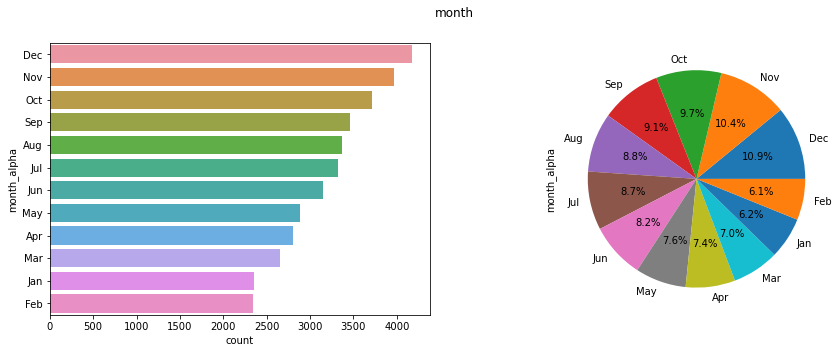

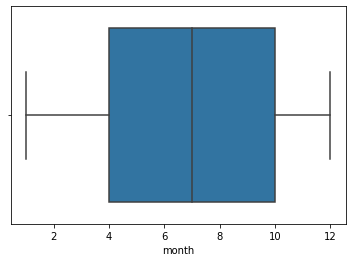

12    4175
11    3969
10    3709
9     3463
8     3363
7     3321
6     3146
5     2887
4     2808
3     2659
1     2354
2     2337
Name: month, dtype: int64


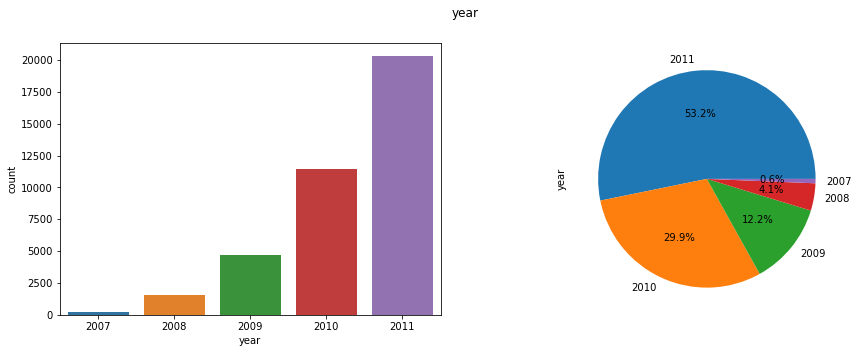

2011    20318
2010    11412
2009     4662
2008     1552
2007      247
Name: year, dtype: int64


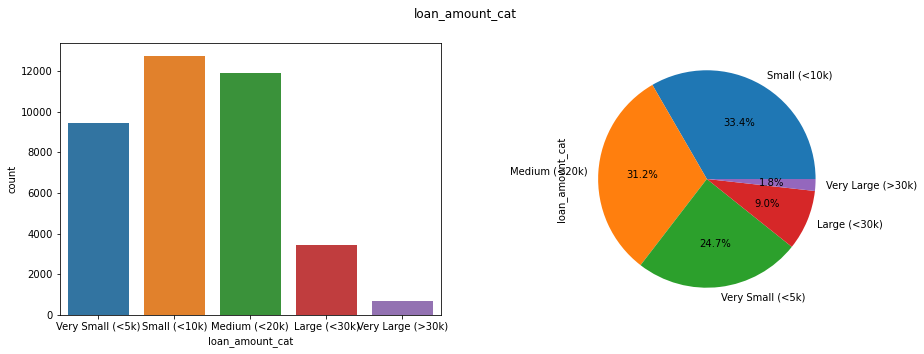

Small (<10k)         12737
Medium (<20k)        11922
Very Small (<5k)      9436
Large (<30k)          3424
Very Large (>30k)      672
Name: loan_amount_cat, dtype: int64


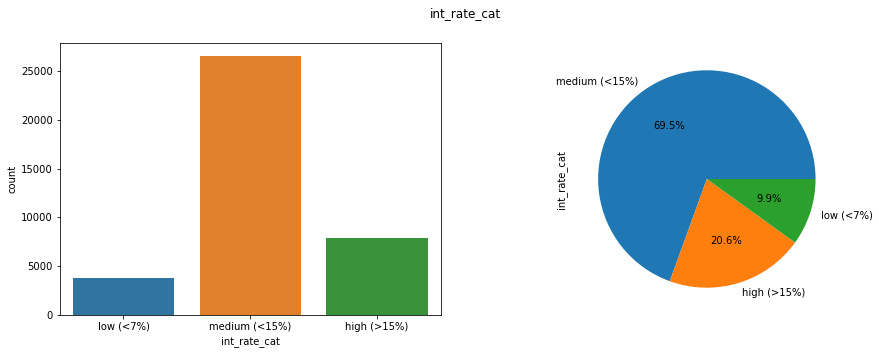

medium (<15%)    26529
high (>15%)       7866
low (<7%)         3796
Name: int_rate_cat, dtype: int64


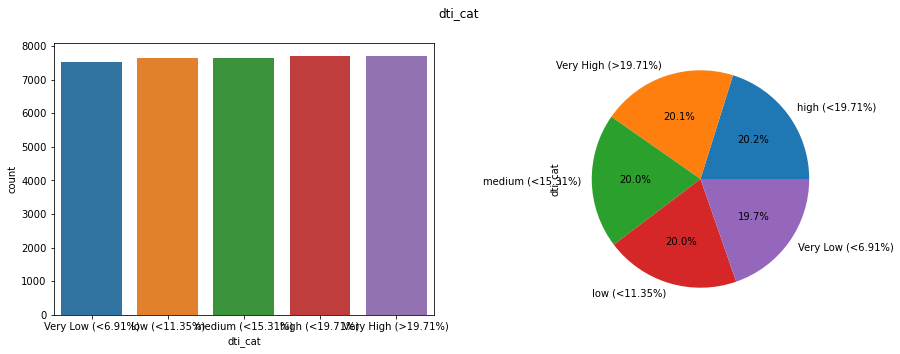

high (<19.71%)         7701
Very High (>19.71%)    7690
medium (<15.31%)       7646
low (<11.35%)          7643
Very Low (<6.91%)      7511
Name: dti_cat, dtype: int64


In [145]:
for column in col_small_unique:
    if column == 'month_alpha':
        continue
    plot_small(loan_df, column)
    if column in ['emp_length', 'month']:
        sns.boxplot(x=column, data=loan_df)
        plt.show()
    print(loan_df[column].value_counts())

### Observations from features with less than 14 distinct values

### term
- 3/4 people choose 36 months term. It is likely their loan amount is low.

#### grade
- Most applicants have a risk grade of "B" (30.3%)
- 75% of the applicants have grades "A", "B" or "C"
- In the remaining 25% of applications, grade "D" is the most common

#### Employment Length
- There is a decline in number of loan applicants after 4 years of employment. A splike is again observed at 10+ years of employment. It could indicate that applicants between 4 to 9 years of employment are paying their previous loan and hence don't apply for another one. 
- 50% of loan applicants are between 0 to 4 years of employement. People having less than 1 year of employment also account for a large number of applicants (~11%). 

#### Home Ownership
- 90% of applicants are either living in a rented house or have a mortgage on their home
- Only 7% people have a house of their own

#### Verification Status
- 43% of the applicants don't have a source of income which is verified by LC or any other source. It might be that these people default the most.

#### Loan Status
- 14.6% applicants have defaulted on their loan

#### Purpose
- ~47% of the loan is taken for debt consolidation (i.e. paying previous loan by taking another loan)
- Similarly the next most popular purpose is the payment of credit card bill. This could be because credit cards charge a much higher interest than regular loans.
- For loans such as house loan, the applicants are less, but the amount is likely to be high

#### Public Record Bankruptcies
- Majority of the applicants (~96%) have never filed for bankruptcy
- 4.2% people have filed for bankruptcy once
- 5 people who filed for bakruptcy twice still got a loan once more

#### Month
- Most loans have been applied in the last 2 months of the year (4000+ in each month). This could be because banks generally provide a lower interest rate to meet targets at the end of the year.
- The tendency to apply for a loan keeps on gradually increasing from first quarter to last quarter. 
*Quarter wise share*
- First Quarter: Jan-Mar (~21%)
- Second Quarter: Apr-Jun (~23%)
- Third Quarter: July-Sep (~26%)
- Fourth Quarter: Oct-Dec (~30%)


#### Employment Length
- There is a decline in number of loan applicants after 4 years of employment. A splike is again observed at 10+ years of employment. It could indicate that applicants between 4 to 9 years of employment are paying their previous loan and hence don't apply for another one. 
- 50% of loan applicants are between 0 to 4 years of employement. People having less than 1 year of employment also account for a large number of applicants (~11%).


#### Year
- Most loans have been provided in the year 2011
- The loans given out has incresed steadily from 2007 to 2011. One potential reason is because 2007-2008 was when the great depression happened.

#### Loan Amount (Categorical)
- Small loans (<10k) are most easily approved. 
- ~60% people are applying for small loans.
- Approximately 25% people are applying for loans less than 5k, while 

#### Interest Rate (Categorical)
- The Interest rate is evenly distributed across categories (~33% each)


---

#### Time Series Analysis

In [146]:
loan_df_checkpoint = loan_df.copy()

In [147]:
loan_df.set_index('issue_d', inplace=True)

In [148]:
pd.set_option('display.max_columns', None)

<AxesSubplot:xlabel='issue_d'>

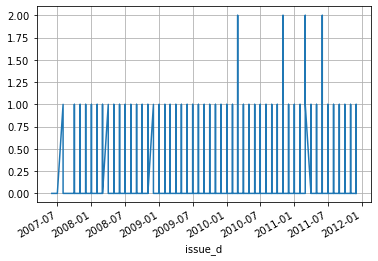

In [149]:
loan_df['pub_rec_bankruptcies'].plot(grid=True)

In [150]:
loan_df.describe()

loan_amnt      int_rate   installment    emp_length     annual_inc  \
count  38191.000000  38191.000000  38191.000000  38191.000000   38191.000000   
mean   10962.265979     11.917876    319.938941      5.068105   65313.603572   
std     7266.157660      3.684108    205.948407      3.600987   35150.774228   
min      500.000000      5.420000     15.690000      0.000000    4000.000000   
25%     5200.000000      8.940000    165.380000      2.000000   40000.000000   
50%     9600.000000     11.710000    276.300000      4.000000   58000.000000   
75%    15000.000000     14.350000    421.800000      9.000000   80232.000000   
max    35000.000000     24.400000   1305.190000     10.000000  234000.000000   

                dti  pub_rec_bankruptcies         month          year  \
count  38191.000000          38191.000000  38191.000000  38191.000000   
mean      13.333491              0.043021      7.114634   2010.309261   
std        6.657843              0.203550      3.408368      0.882733   
min        0.000000              0.000000      1.000000   2007.000000   
25%        8.210000              0.000000      4.000000   2010.000000   
50%       13.430000              0.000000      7.000000   2011.000000   
75%       18.600000              0.000000     10.000000   2011.000000   
max       29.990000              2.000000     12.000000   2011.000000   

          grade_num  sub_grade_num  loan_status_num  
count  38191.000000   38191.000000     38191.000000  
mean       4.452201      47.574612         0.853788  
std        1.376461      14.105395         0.353324  
min        0.000000       1.000000         0.000000  
25%        4.000000      41.000000         1.000000  
50%        5.000000      52.000000         1.000000  
75%        6.000000      61.000000         1.000000  
max        6.000000      65.000000         1.000000

In [151]:
loan_df[loan_df.pub_rec_bankruptcies == 2]

loan_amnt        term  int_rate  installment grade sub_grade  \
issue_d                                                                    
2011-06-01       3600   36 months     17.99       130.14     E        E1   
2011-03-01      15000   36 months     16.40       530.33     E        E1   
2010-11-01       8000   36 months     13.35       270.91     C        C4   
2010-11-01      10000   36 months     10.36       324.37     B        B5   
2010-03-01       3000   36 months     16.82       106.69     E        E2   

            emp_length home_ownership  annual_inc verification_status  \
issue_d                                                                 
2011-06-01          10       MORTGAGE       85000     Source Verified   
2011-03-01           6       MORTGAGE       98000     Source Verified   
2010-11-01           0       MORTGAGE       34000            Verified   
2010-11-01           7           RENT       45600     Source Verified   
2010-03-01           9       MORTGAGE       37100        Not Verified   

            loan_status             purpose addr_state    dti  \
issue_d                                                         
2011-06-01   Fully Paid  debt_consolidation         CA   6.35   
2011-03-01  Charged Off  debt_consolidation         AZ  11.41   
2010-11-01   Fully Paid         credit_card         NC  16.62   
2010-11-01  Charged Off         credit_card         NC  15.92   
2010-03-01   Fully Paid               other         AZ  17.92   

            pub_rec_bankruptcies  month  year month_alpha  grade_num  \
issue_d                                                                
2011-06-01                     2      6  2011         Jun          2   
2011-03-01                     2      3  2011         Mar          2   
2010-11-01                     2     11  2010         Nov          4   
2010-11-01                     2     11  2010         Nov          5   
2010-03-01                     2      3  2010         Mar          2   

            sub_grade_num  loan_status_num   loan_amount_cat   int_rate_cat  \
issue_d                                                                       
2011-06-01             21                1  Very Small (<5k)    high (>15%)   
2011-03-01             21                0     Medium (<20k)    high (>15%)   
2010-11-01             44                1      Small (<10k)  medium (<15%)   
2010-11-01             55                0      Small (<10k)  medium (<15%)   
2010-03-01             22                1  Very Small (<5k)    high (>15%)   

                      dti_cat  
issue_d                        
2011-06-01  Very Low (<6.91%)  
2011-03-01   medium (<15.31%)  
2010-11-01     high (<19.71%)  
2010-11-01     high (<19.71%)  
2010-03-01     high (<19.71%)

<AxesSubplot:xlabel='issue_d'>

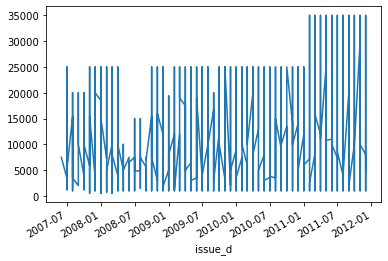

In [152]:
loan_df.loan_amnt.plot()

<AxesSubplot:xlabel='issue_d'>

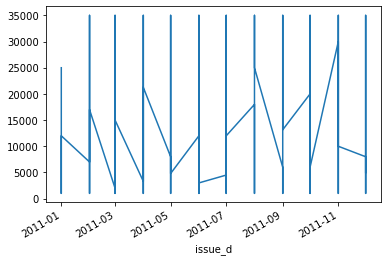

In [153]:
loan_df[(loan_df.index >= "2011-01-01")].loan_amnt.plot()

<AxesSubplot:xlabel='issue_d'>

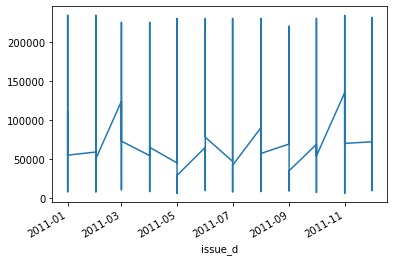

In [154]:
loan_df[(loan_df.index >= "2011-01-01")].annual_inc.plot()

#### Observation: No particular trend is observed when analyzing the time series data

---

### Bivariate Analysis

---

#### Checking Correlation between numeric values

In [155]:
loan_df.corr()

loan_amnt  int_rate  installment  emp_length  \
loan_amnt              1.000000  0.298454     0.931763    0.130619   
int_rate               0.298454  1.000000     0.275178   -0.011172   
installment            0.931763  0.275178     1.000000    0.103221   
emp_length             0.130619 -0.011172     0.103221    1.000000   
annual_inc             0.415012  0.066614     0.412474    0.144083   
dti                    0.071850  0.113470     0.061633    0.048646   
pub_rec_bankruptcies  -0.033173  0.085331    -0.030788    0.071165   
month                  0.052373  0.025966     0.030012    0.022870   
year                   0.108050  0.038047     0.051014    0.132160   
grade_num             -0.283311 -0.948005    -0.260667    0.010084   
sub_grade_num         -0.273249 -0.927826    -0.252419    0.008236   
loan_status_num       -0.061541 -0.212386    -0.028811   -0.023970   

                      annual_inc       dti  pub_rec_bankruptcies     month  \
loan_amnt               0.415012  0.071850             -0.033173  0.052373   
int_rate                0.066614  0.113470              0.085331  0.025966   
installment             0.412474  0.061633             -0.030788  0.030012   
emp_length              0.144083  0.048646              0.071165  0.022870   
annual_inc              1.000000 -0.107957             -0.016679  0.015293   
dti                    -0.107957  1.000000              0.006367  0.014998   
pub_rec_bankruptcies   -0.016679  0.006367              1.000000 -0.018696   
month                   0.015293  0.014998             -0.018696  1.000000   
year                    0.032536  0.092172              0.012224 -0.035395   
grade_num              -0.069191 -0.099216             -0.078501  0.030046   
sub_grade_num          -0.066571 -0.095090             -0.076280  0.027876   
loan_status_num         0.064431 -0.044225             -0.046885 -0.025024   

                          year  grade_num  sub_grade_num  loan_status_num  
loan_amnt             0.108050  -0.283311      -0.273249        -0.061541  
int_rate              0.038047  -0.948005      -0.927826        -0.212386  
installment           0.051014  -0.260667      -0.252419        -0.028811  
emp_length            0.132160   0.010084       0.008236        -0.023970  
annual_inc            0.032536  -0.069191      -0.066571         0.064431  
dti                   0.092172  -0.099216      -0.095090        -0.044225  
pub_rec_bankruptcies  0.012224  -0.078501      -0.076280        -0.046885  
month                -0.035395   0.030046       0.027876        -0.025024  
year                  1.000000   0.003945       0.000282        -0.025278  
grade_num             0.003945   1.000000       0.995280         0.202501  
sub_grade_num         0.000282   0.995280       1.000000         0.197765  
loan_status_num      -0.025278   0.202501       0.197765         1.000000

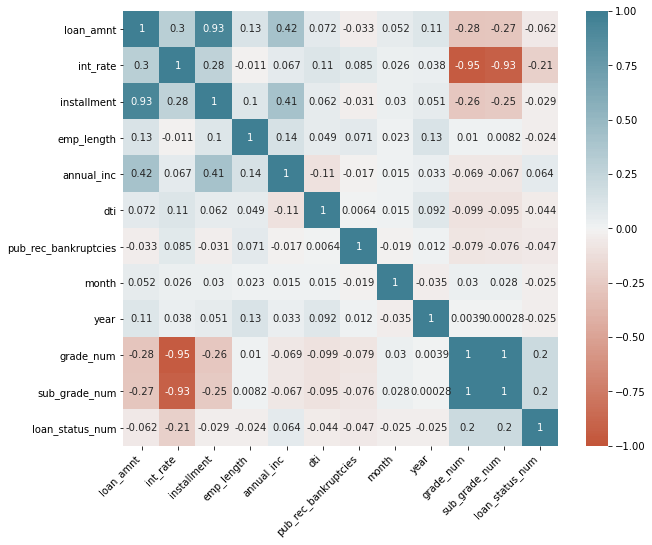

In [156]:
plt.figure(figsize=(10,8))

ax = sns.heatmap(
    loan_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [157]:
loan_df_corr = loan_df.loc[:, ['loan_amnt', 'installment', 'int_rate', 'grade_num', 'sub_grade_num', 'dti', 'annual_inc', 'emp_length']]

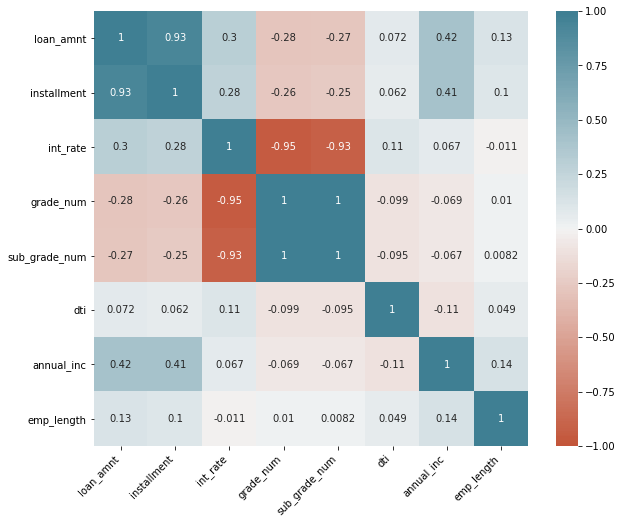

In [158]:
plt.figure(figsize=(10,8))

ax = sns.heatmap(
    loan_df_corr.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig('correlation_among_numeric_columns.png')

#### Observation

- As the grade goes down, the interest rate goes up (-95% correlation)
- As the annual income increases, the loan amount increases (+40% correlation)
- As the loan amount increases, the installment increases (+93% correlation)
- grade and subgrade are highly correlated (+93%), however this is expected since if grade is A then sub_grade will be from range (A1 to A6)

---

In [159]:
categories = loan_df.select_dtypes('object').columns.to_list()

In [160]:
categories.extend(loan_df.select_dtypes('category').columns.to_list())

In [161]:
print(categories)

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'month_alpha', 'loan_amount_cat', 'int_rate_cat', 'dti_cat']


In [162]:
loan_df.groupby(['grade', 'loan_status'])['annual_inc'].agg(['count', 'mean', 'median'])

count          mean  median
grade loan_status                             
A     Charged Off    601  52181.762063   45600
      Fully Paid    9376  64846.513225   58585
B     Charged Off   1414  56968.258133   50000
      Fully Paid   10167  65706.895446   58327
C     Charged Off   1342  56669.866617   50000
      Fully Paid    6411  64714.133676   56330
D     Charged Off   1112  60738.118705   54000
      Fully Paid    3915  66402.915964   60000
E     Charged Off    704  68215.204545   60000
      Fully Paid    1906  73831.596013   65000
F     Charged Off    312  74858.974359   66181
      Fully Paid     642  80107.233645   72568
G     Charged Off     99  73391.939394   67000
      Fully Paid     190  90504.821053   83500

In [163]:
loan_df.pivot_table(
    index='grade',
    values='annual_inc',
    aggfunc='median',
    columns='loan_status'
)

loan_status  Charged Off  Fully Paid
grade                               
A                  45600       58585
B                  50000       58327
C                  50000       56330
D                  54000       60000
E                  60000       65000
F                  66181       72568
G                  67000       83500

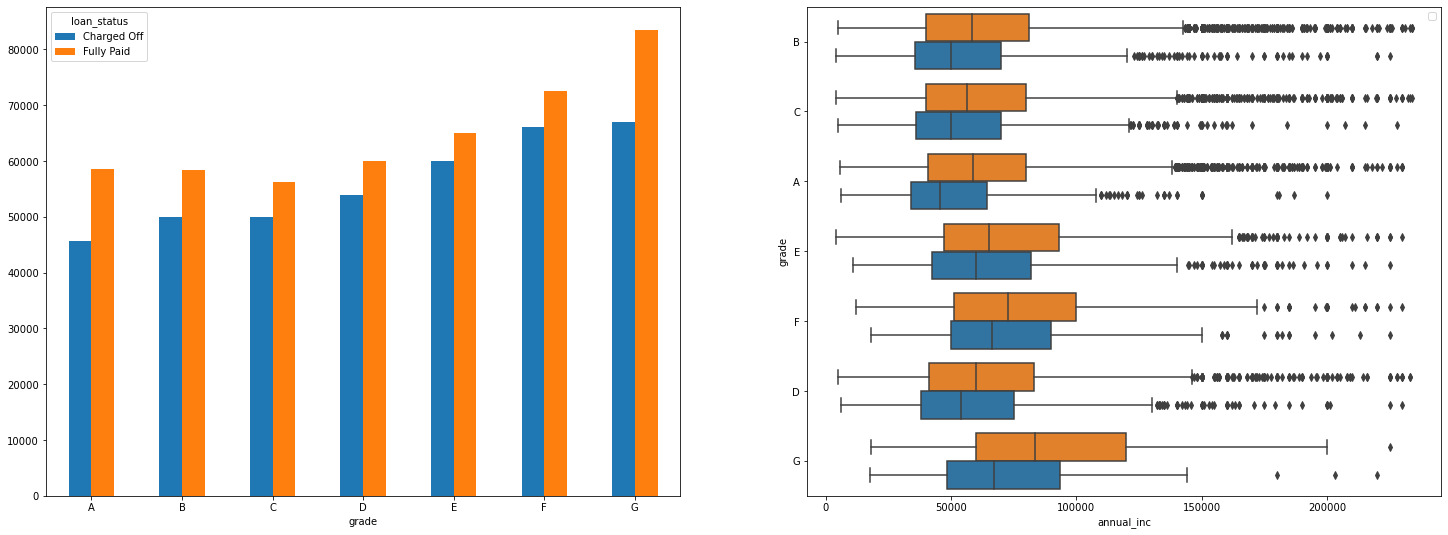

In [164]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,9))
my_pal = {"Charged Off": "tab:blue", "Fully Paid": "tab:orange"}


loan_df.pivot_table(
    index='grade',
    values='annual_inc',
    aggfunc='median',
    columns='loan_status',
).plot(kind='bar', ax=ax1, )
sns.boxplot(x='annual_inc', y='grade', data=loan_df, ax=ax2, hue='loan_status', palette=my_pal)
ax2.legend('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

plt.savefig('annual_income_vs_grade.png')
plt.show()

Observation:
- The median and mean annual income is higher for people who are paying off their loan than those who aren't for all grades.
- The overall range of income is smaller for charged of individuals as can be seen by size of the boxplot

---

In [165]:
def plot_bivariate_with_hue(numeric, categorical, df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
    my_pal = {"Charged Off": "tab:blue", "Fully Paid": "tab:orange"}

    grouped_df = df.groupby('loan_status')[categorical].value_counts(normalize=True)
    grouped_df.unstack('loan_status').plot(kind='bar', ax=ax1)
    piv = df.pivot_table(
        index=categorical,
        values=numeric,
        aggfunc='median',
        columns='loan_status',
    )
    
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
    
    sns.boxplot(x=numeric, y=categorical, data=df, ax=ax2, hue='loan_status', palette=my_pal)
    ax2.legend('')
    ax1.set_title(f'Percentage Distribution - {categorical}')
    ax2.set_title(f'Spread of Data - {categorical} vs {numeric}')
    
    plt.savefig(f'{categorical}_vs_{numeric}.png')
    plt.show()
    
    print(piv)
    

In [166]:
print(categories)

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'month_alpha', 'loan_amount_cat', 'int_rate_cat', 'dti_cat']


In [167]:
numeric = integer_data + continous_float_data

In [168]:
print(numeric)

['loan_amnt', 'emp_length', 'annual_inc', 'pub_rec_bankruptcies', 'month', 'year', 'grade_num', 'sub_grade_num', 'loan_status_num', 'int_rate', 'installment', 'dti']


Plotting for term


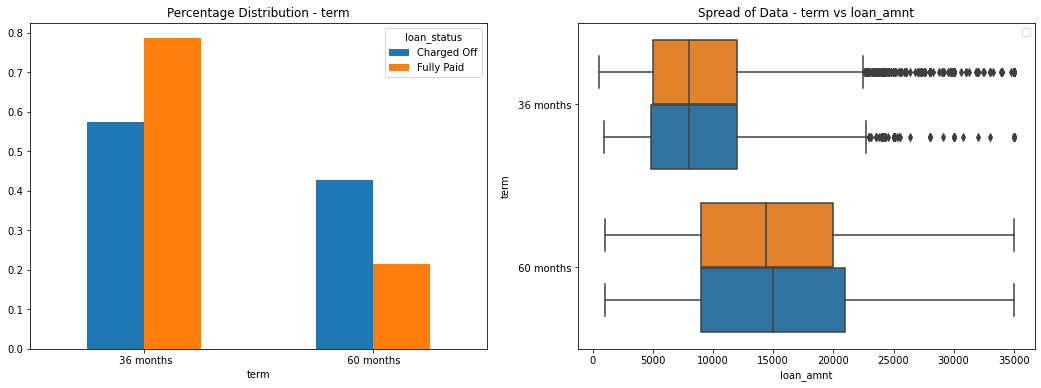

loan_status  Charged Off  Fully Paid
term                                
 36 months          8000        8000
 60 months         15000       14400


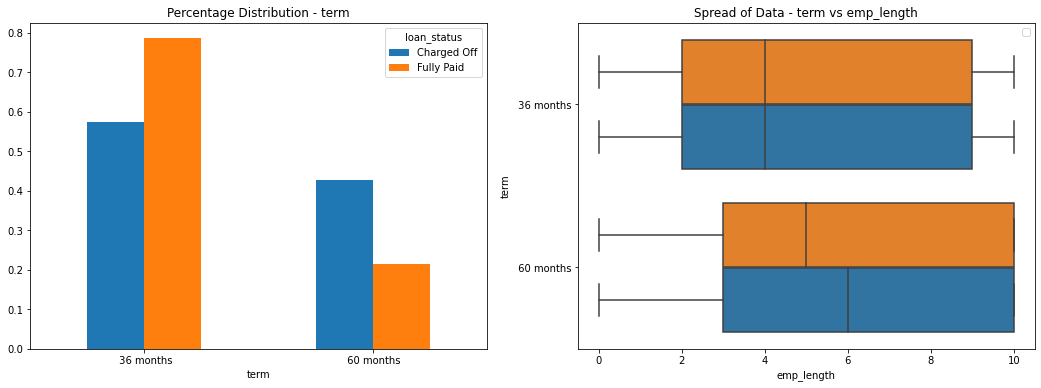

loan_status  Charged Off  Fully Paid
term                                
 36 months             4           4
 60 months             6           5


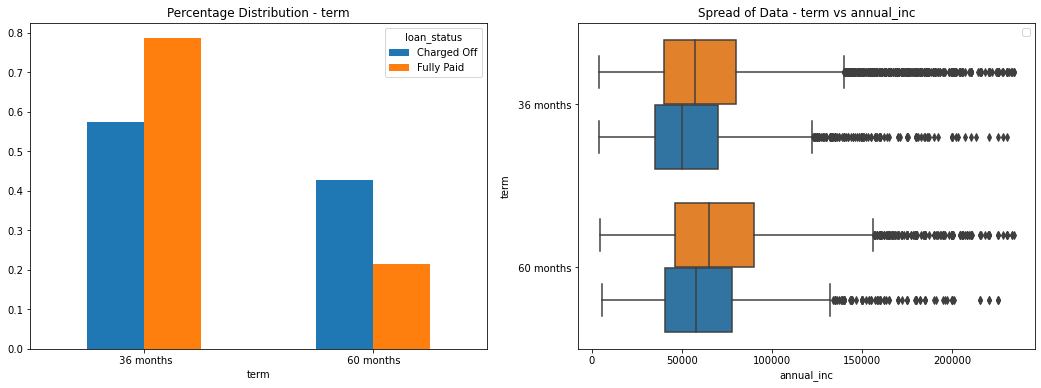

loan_status  Charged Off  Fully Paid
term                                
 36 months       50000.0     57250.5
 60 months       58000.0     64800.0


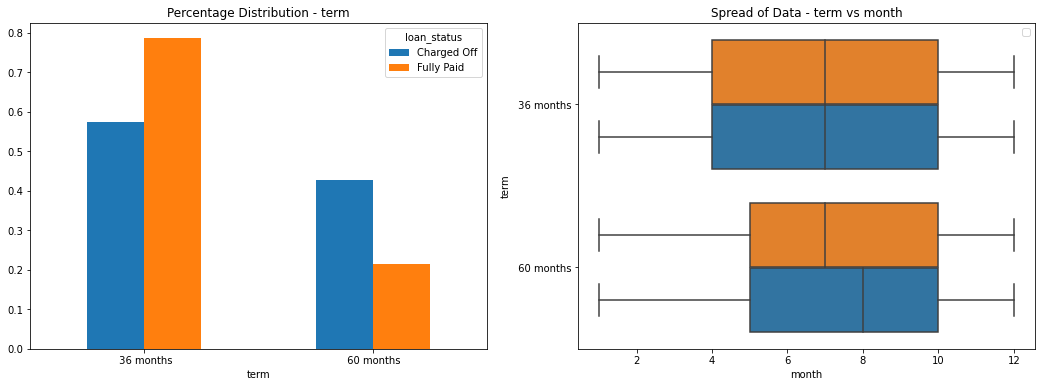

loan_status  Charged Off  Fully Paid
term                                
 36 months             7           7
 60 months             8           7


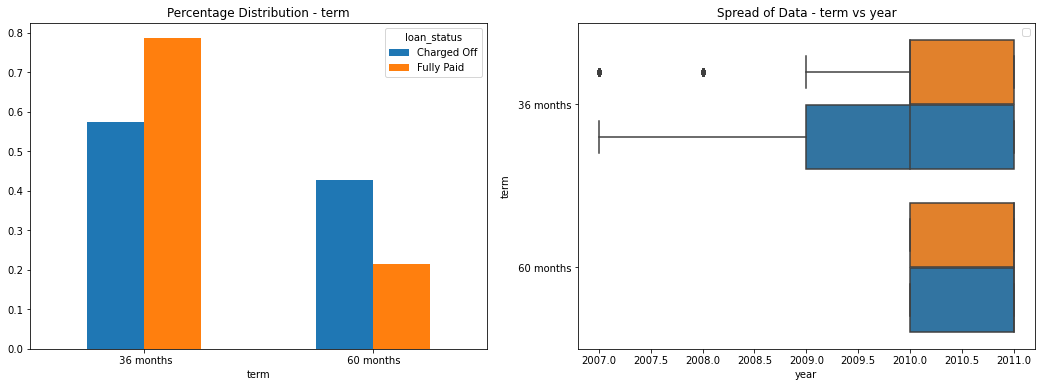

loan_status  Charged Off  Fully Paid
term                                
 36 months          2010        2010
 60 months          2011        2011


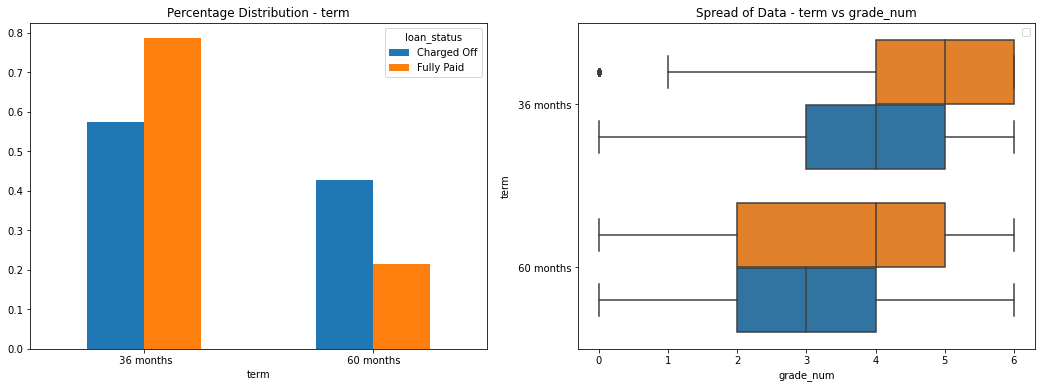

loan_status  Charged Off  Fully Paid
term                                
 36 months             4           5
 60 months             3           4


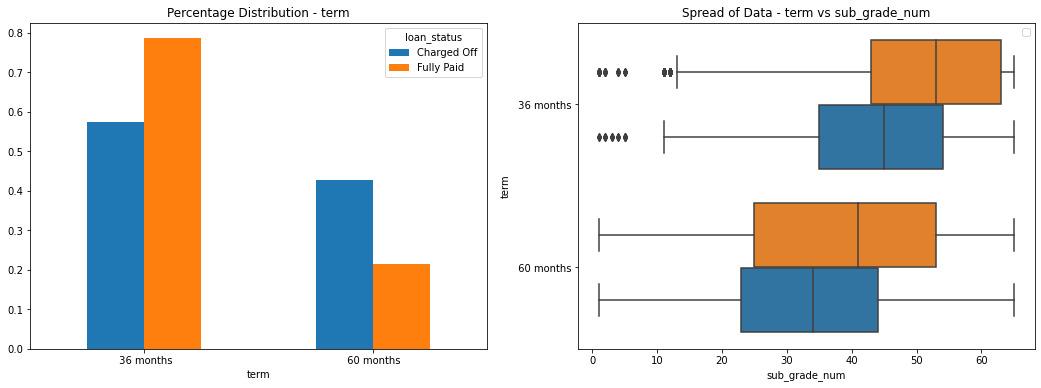

loan_status  Charged Off  Fully Paid
term                                
 36 months            45          53
 60 months            34          41


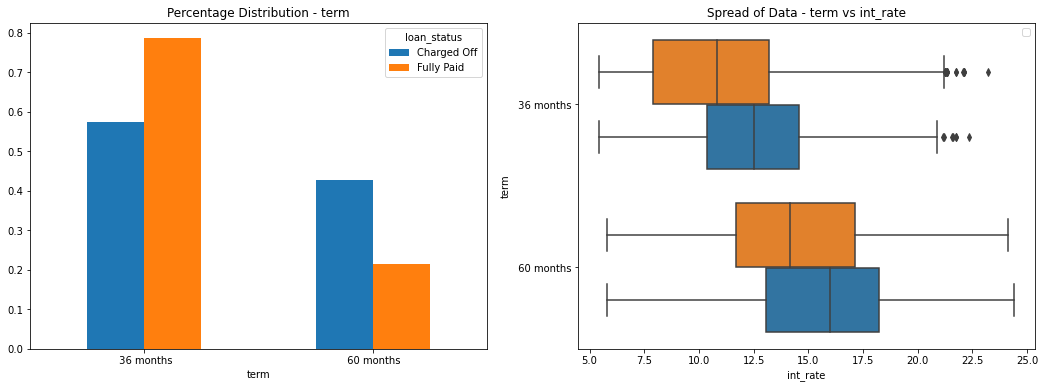

loan_status  Charged Off  Fully Paid
term                                
 36 months         12.53       10.83
 60 months         15.99       14.17


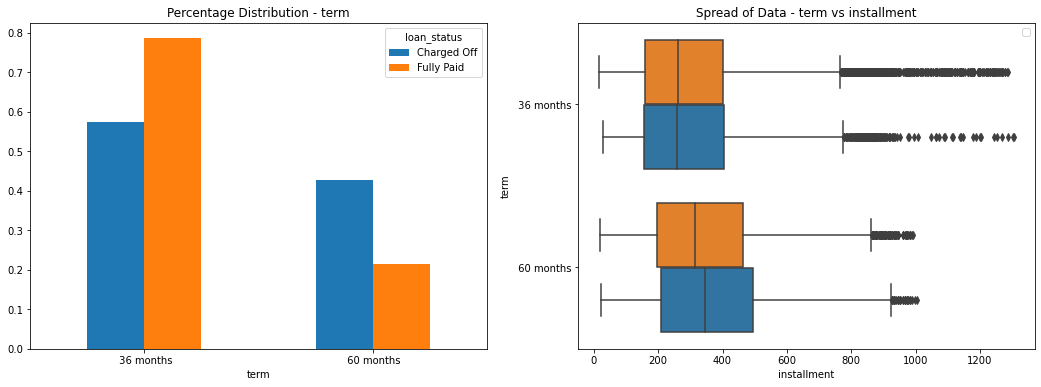

loan_status  Charged Off  Fully Paid
term                                
 36 months        258.10      261.27
 60 months        344.57      315.79


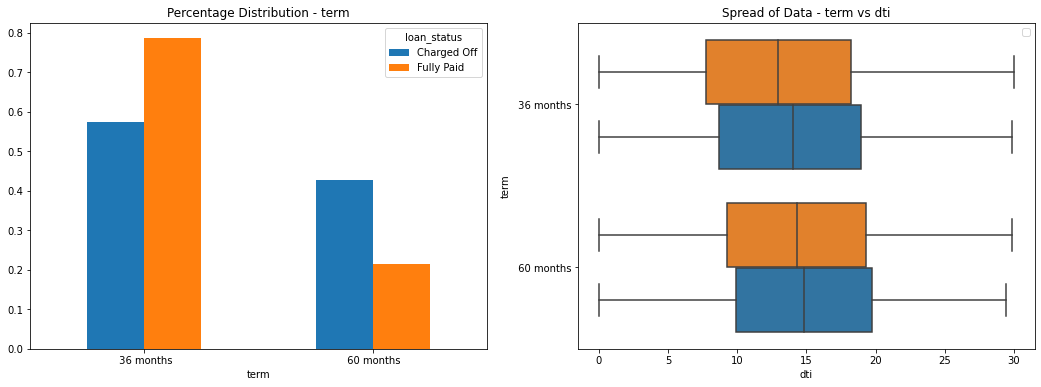

loan_status  Charged Off  Fully Paid
term                                
 36 months         14.00       12.94
 60 months         14.86       14.30
--------
Plotting for grade


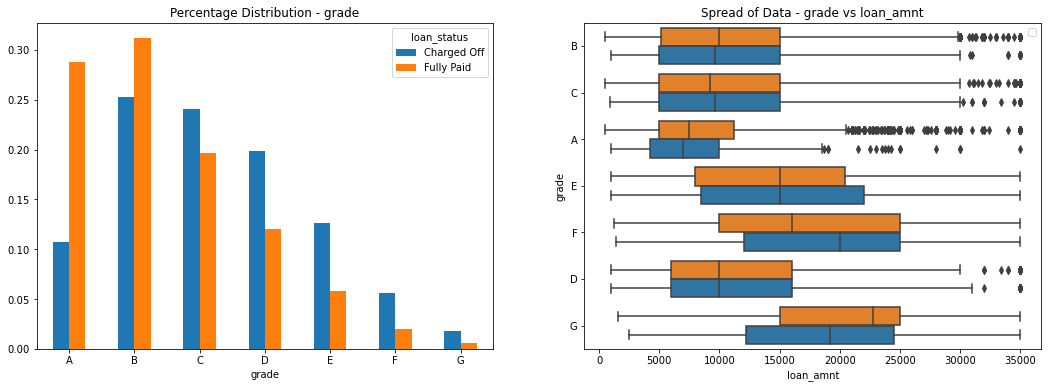

loan_status  Charged Off  Fully Paid
grade                               
A                   7000        7500
B                   9600       10000
C                   9600        9250
D                  10000       10000
E                  15000       15000
F                  20000       16050
G                  19200       22750


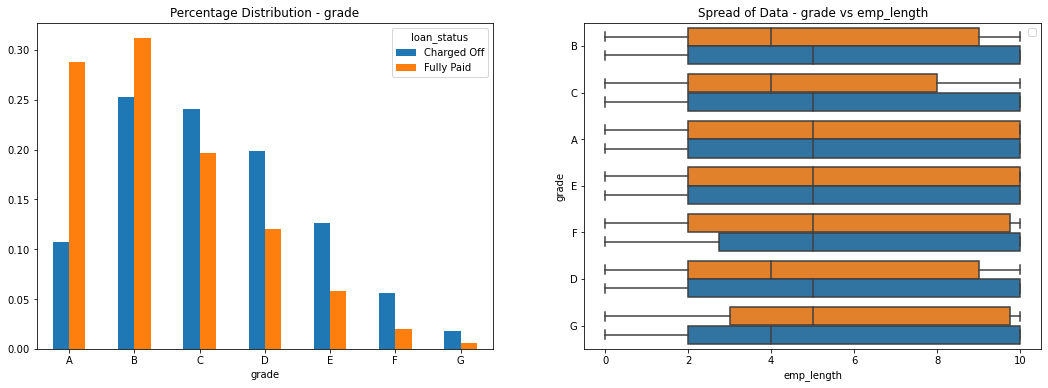

loan_status  Charged Off  Fully Paid
grade                               
A                      5           5
B                      5           4
C                      5           4
D                      5           4
E                      5           5
F                      5           5
G                      4           5


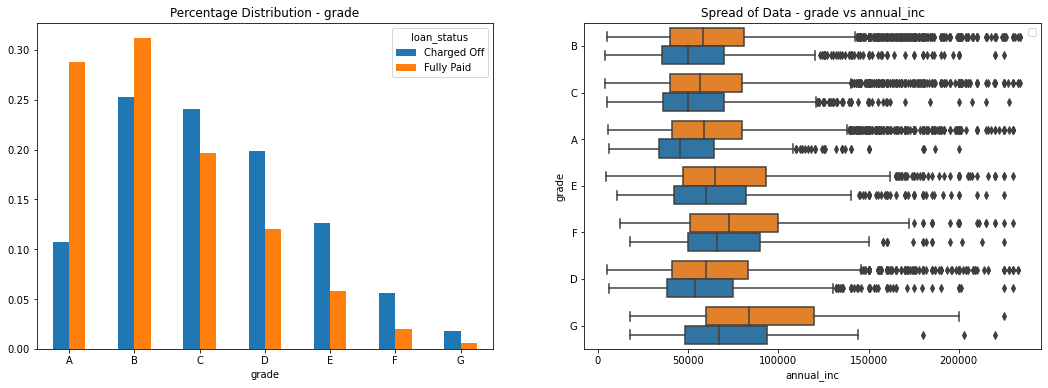

loan_status  Charged Off  Fully Paid
grade                               
A                  45600       58585
B                  50000       58327
C                  50000       56330
D                  54000       60000
E                  60000       65000
F                  66181       72568
G                  67000       83500


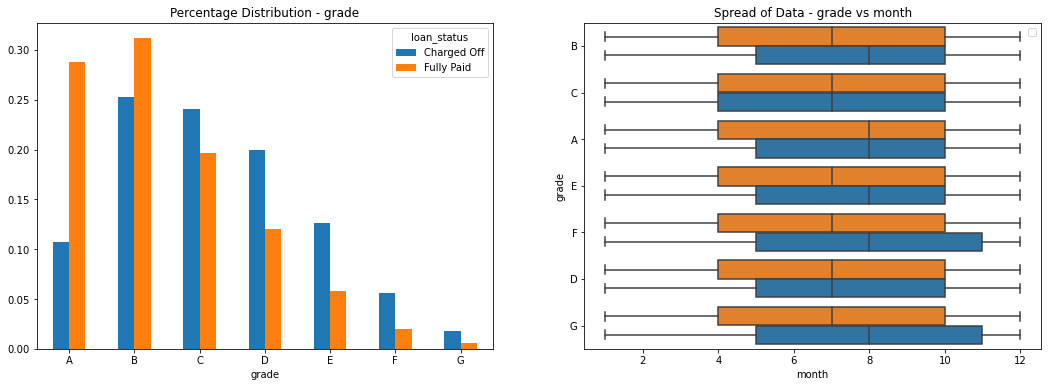

loan_status  Charged Off  Fully Paid
grade                               
A                      8           8
B                      8           7
C                      7           7
D                      7           7
E                      8           7
F                      8           7
G                      8           7


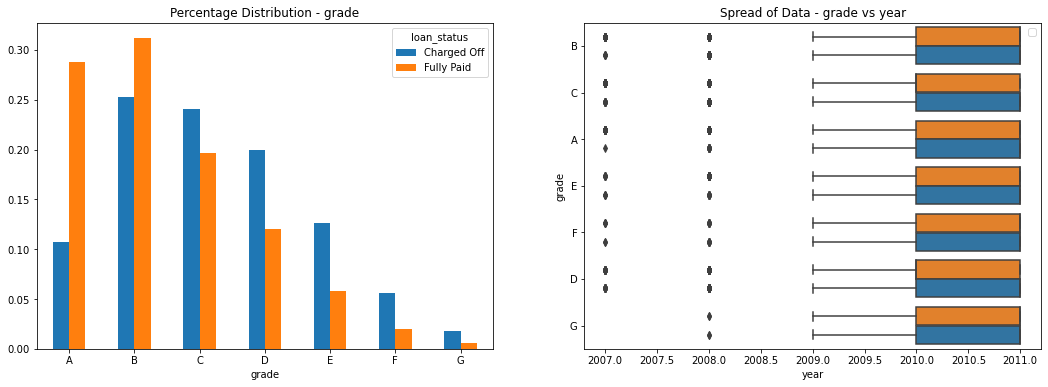

loan_status  Charged Off  Fully Paid
grade                               
A                   2011        2011
B                   2011        2011
C                   2011        2010
D                   2011        2010
E                   2011        2011
F                   2011        2011
G                   2011        2011


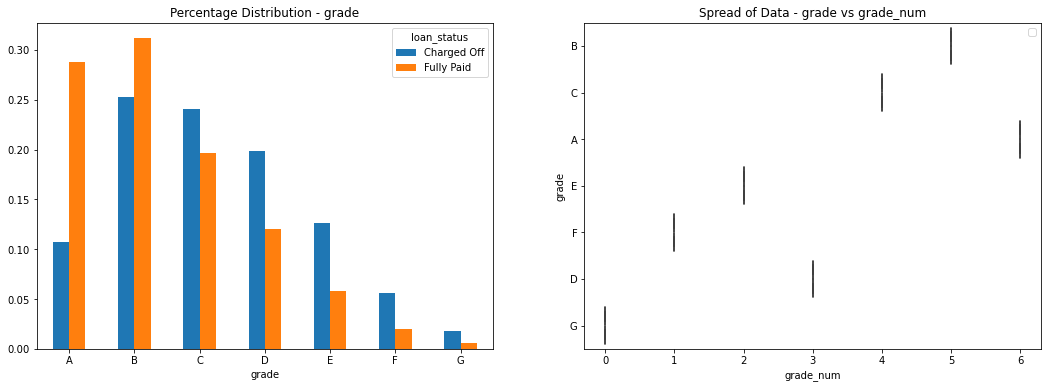

loan_status  Charged Off  Fully Paid
grade                               
A                      6           6
B                      5           5
C                      4           4
D                      3           3
E                      2           2
F                      1           1
G                      0           0


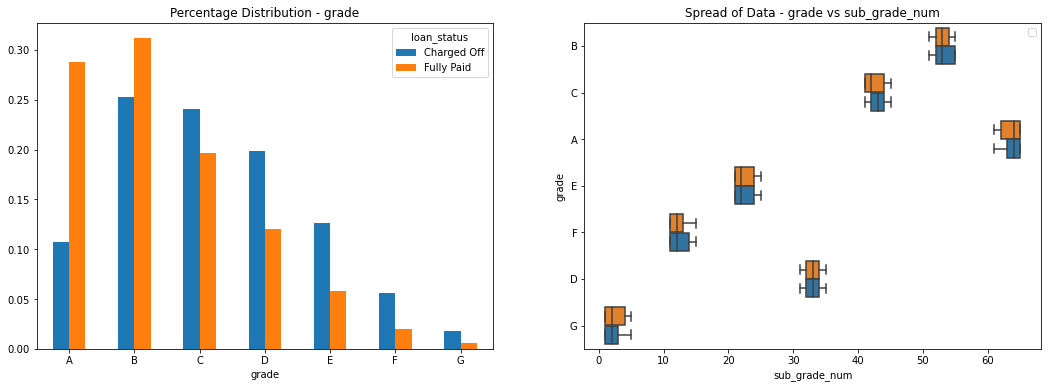

loan_status  Charged Off  Fully Paid
grade                               
A                     64          64
B                     53          53
C                     43          42
D                     33          33
E                     22          22
F                     12          12
G                      2           2


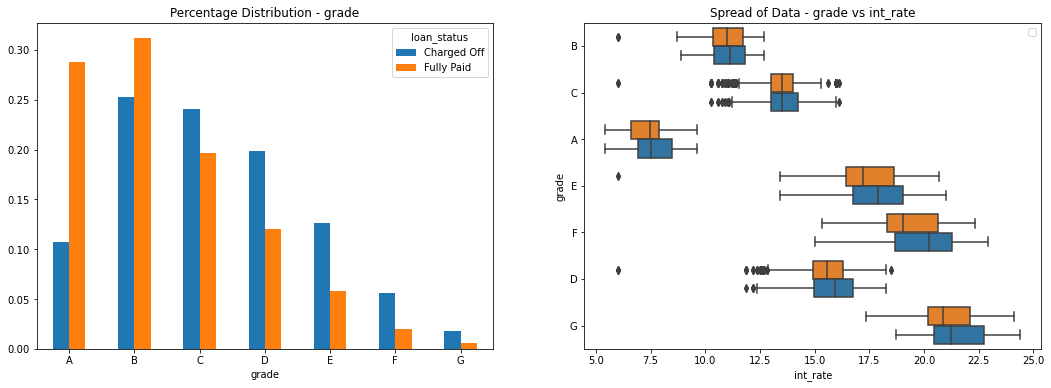

loan_status  Charged Off  Fully Paid
grade                               
A                   7.51        7.49
B                  11.12       10.99
C                  13.49       13.49
D                  15.95       15.58
E                  17.88       17.19
F                  20.25       19.04
G                  21.22       20.85


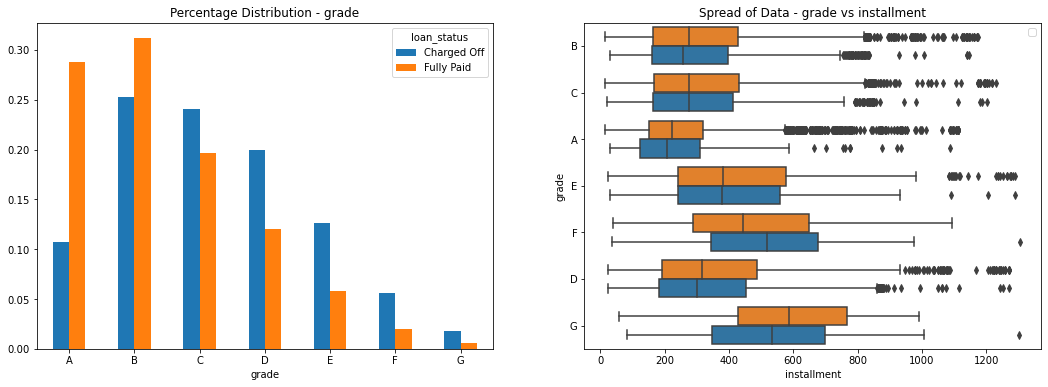

loan_status  Charged Off  Fully Paid
grade                               
A                208.540     223.055
B                258.470     275.640
C                276.060     275.690
D                299.980     317.710
E                377.330     380.695
F                518.195     442.535
G                535.240     586.160


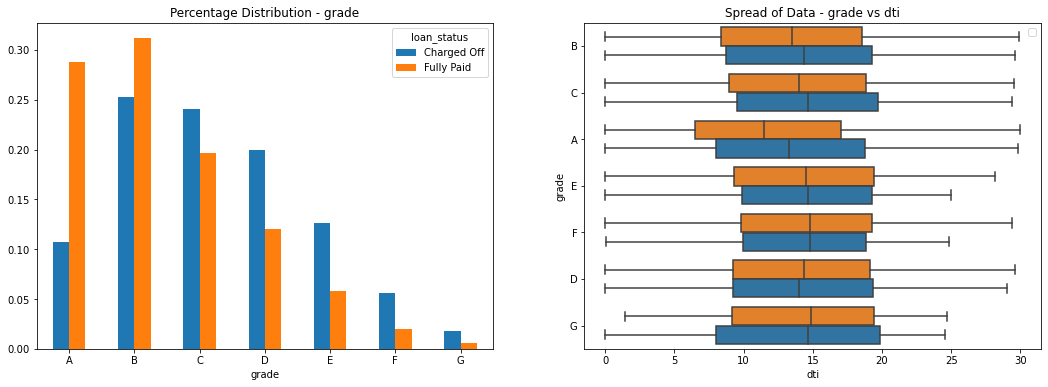

loan_status  Charged Off  Fully Paid
grade                               
A                 13.280       11.46
B                 14.345       13.48
C                 14.690       14.04
D                 14.035       14.40
E                 14.655       14.52
F                 14.765       14.83
G                 14.620       14.86
--------
Plotting for sub_grade


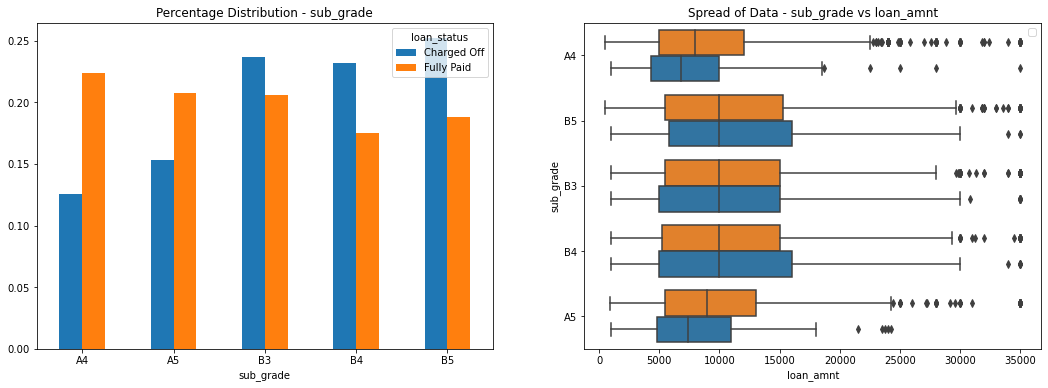

loan_status  Charged Off  Fully Paid
sub_grade                           
A4                6812.5      8000.0
A5                7425.0      9000.0
B3               10000.0     10000.0
B4               10000.0     10000.0
B5               10000.0     10000.0


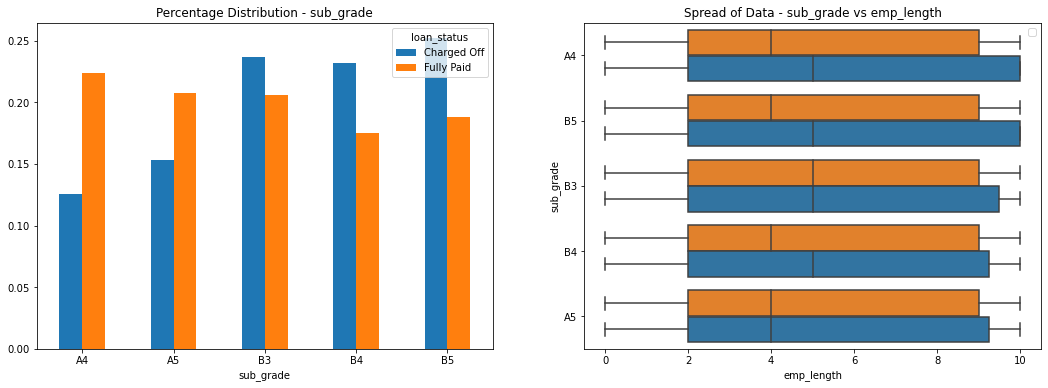

loan_status  Charged Off  Fully Paid
sub_grade                           
A4                     5           4
A5                     4           4
B3                     5           5
B4                     5           4
B5                     5           4


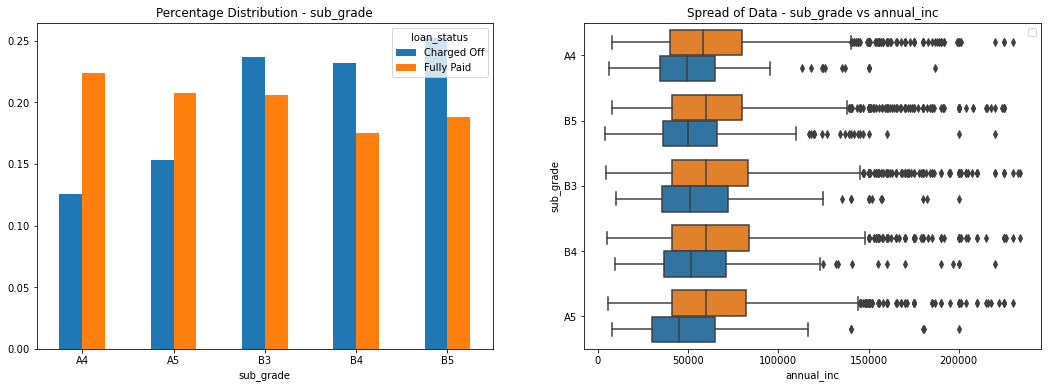

loan_status  Charged Off  Fully Paid
sub_grade                           
A4                 49300       58000
A5                 45000       60000
B3                 51000       59700
B4                 51823       60000
B5                 50000       60000


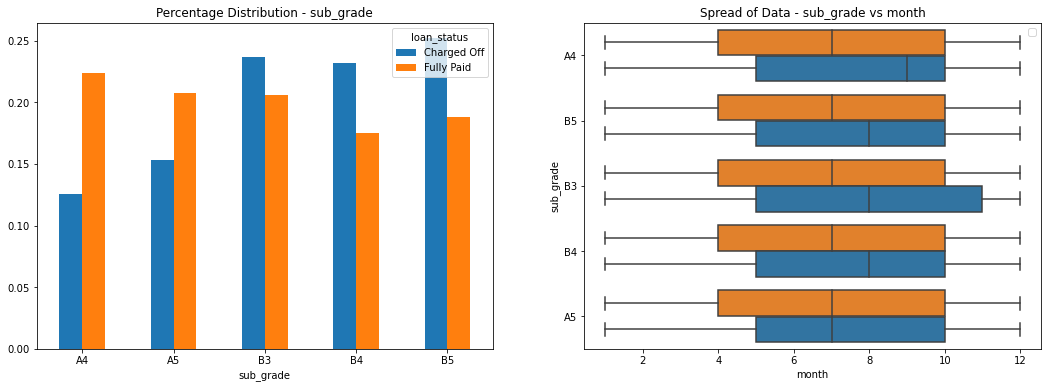

loan_status  Charged Off  Fully Paid
sub_grade                           
A4                     9           7
A5                     7           7
B3                     8           7
B4                     8           7
B5                     8           7


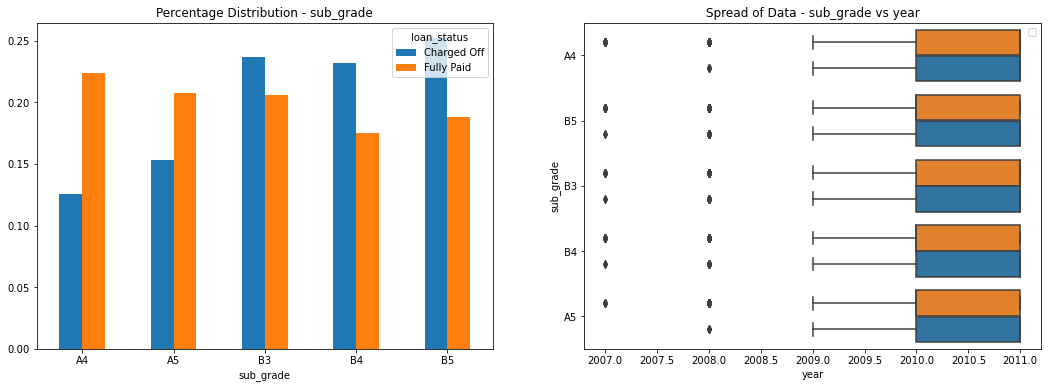

loan_status  Charged Off  Fully Paid
sub_grade                           
A4                  2011        2011
A5                  2011        2010
B3                  2011        2011
B4                  2011        2010
B5                  2011        2010


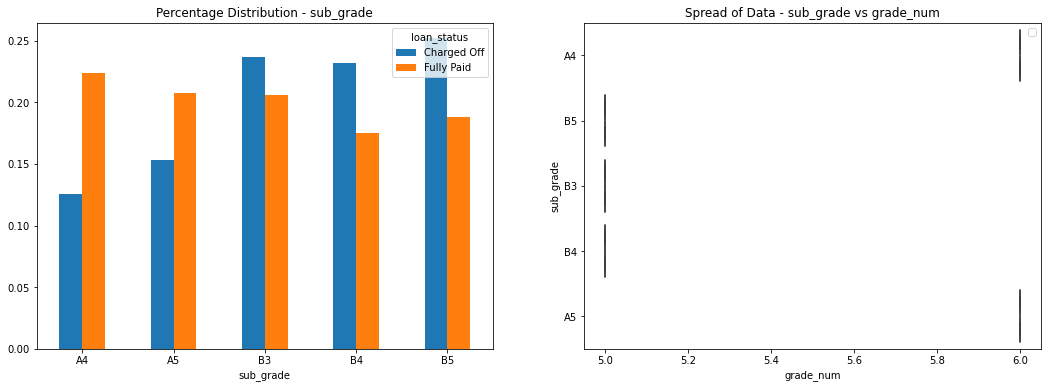

loan_status  Charged Off  Fully Paid
sub_grade                           
A4                     6           6
A5                     6           6
B3                     5           5
B4                     5           5
B5                     5           5


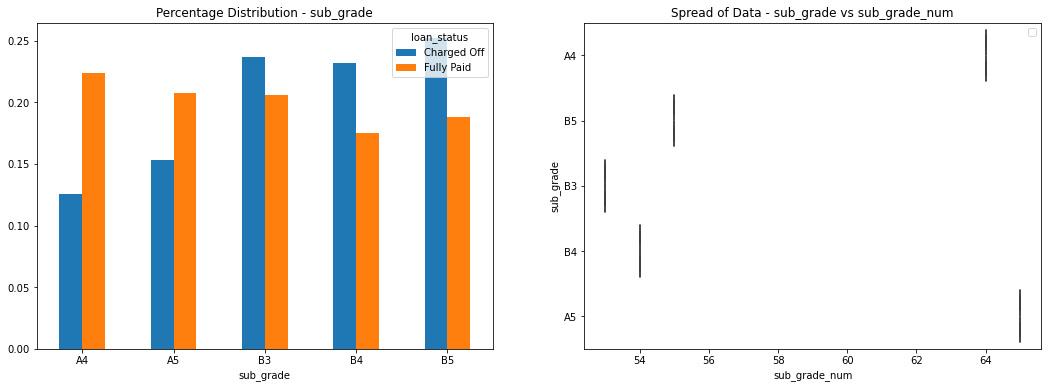

loan_status  Charged Off  Fully Paid
sub_grade                           
A4                    64          64
A5                    65          65
B3                    53          53
B4                    54          54
B5                    55          55


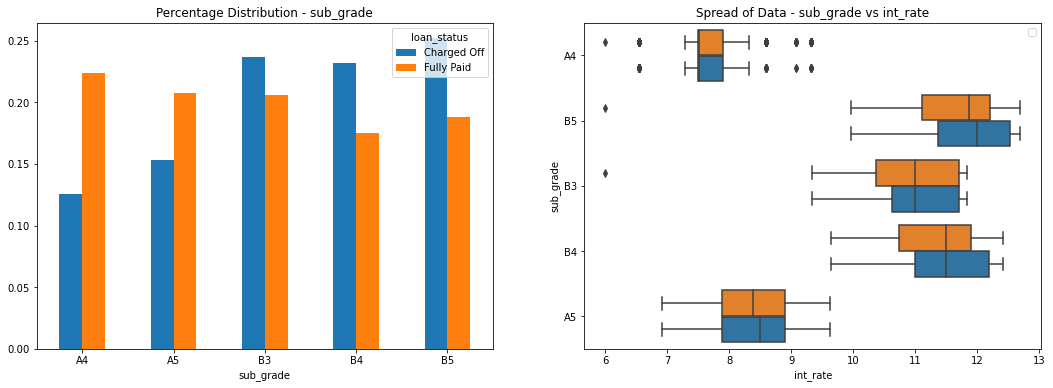

loan_status  Charged Off  Fully Paid
sub_grade                           
A4                  7.51        7.51
A5                  8.49        8.38
B3                 10.99       10.99
B4                 11.49       11.49
B5                 11.99       11.86


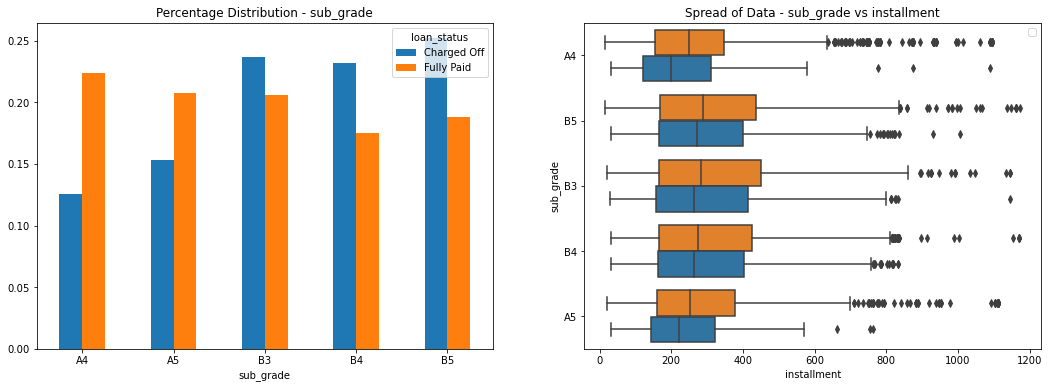

loan_status  Charged Off  Fully Paid
sub_grade                           
A4                199.20     248.820
A5                222.15     252.860
B3                264.61     282.860
B4                263.82     273.980
B5                271.14     287.675


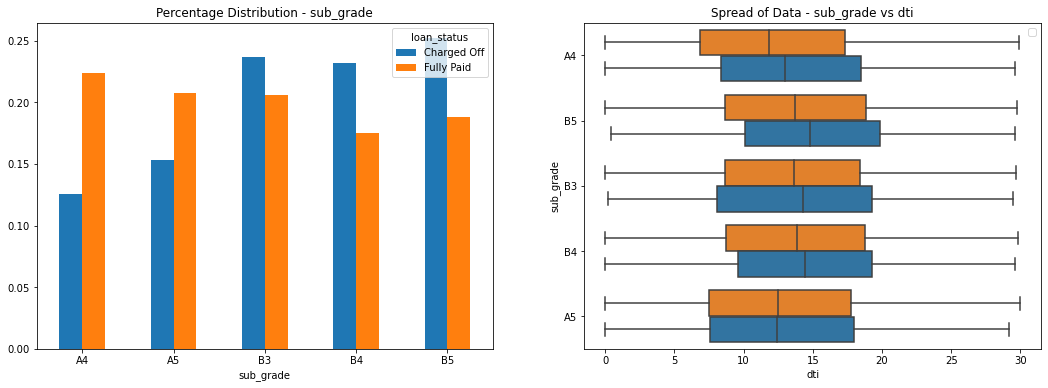

loan_status  Charged Off  Fully Paid
sub_grade                           
A4                12.995      11.860
A5                12.430      12.480
B3                14.310      13.650
B4                14.420      13.850
B5                14.800      13.745
--------
Plotting for home_ownership


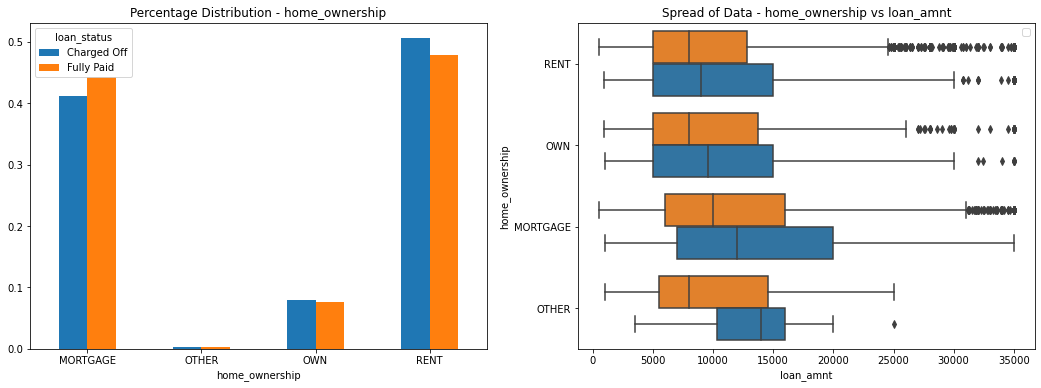

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE              12000       10000
OTHER                 14000        8000
OWN                    9600        8000
RENT                   9000        8000


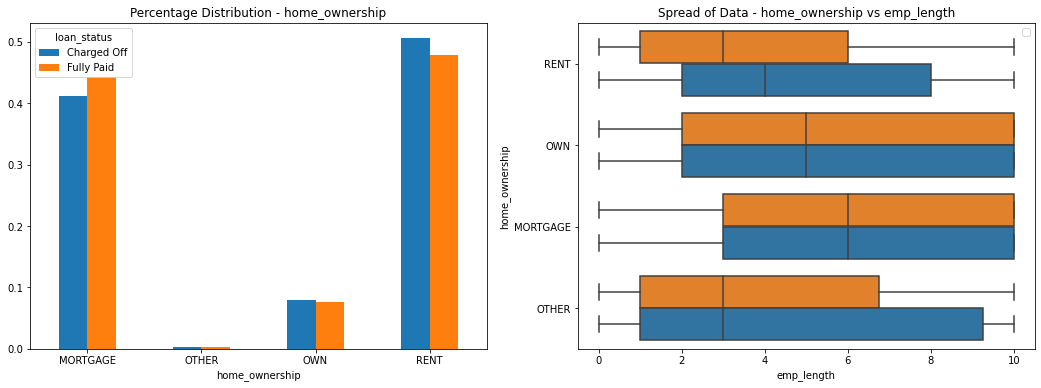

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE                  6           6
OTHER                     3           3
OWN                       5           5
RENT                      4           3


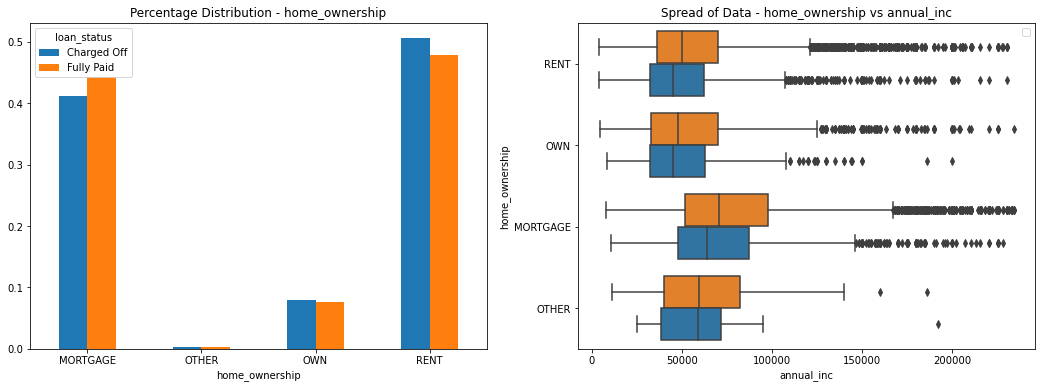

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE              64000       70800
OTHER                 58750       59300
OWN                   45000       48000
RENT                  45000       50000


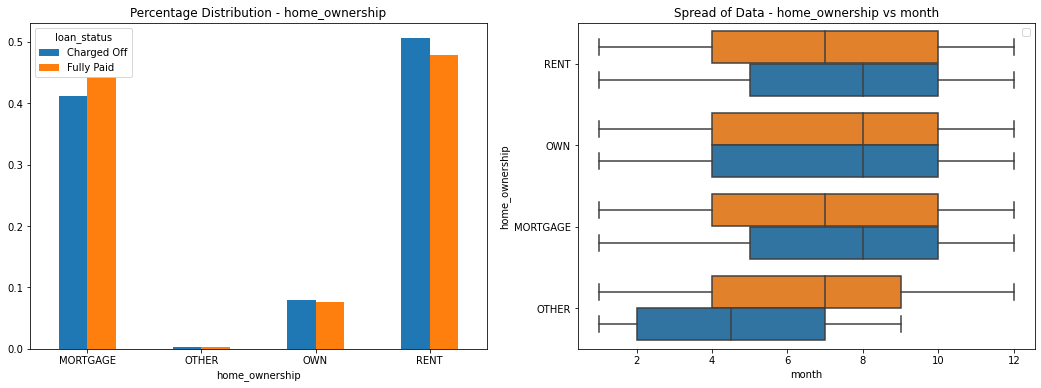

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE                8.0         7.0
OTHER                   4.5         7.0
OWN                     8.0         8.0
RENT                    8.0         7.0


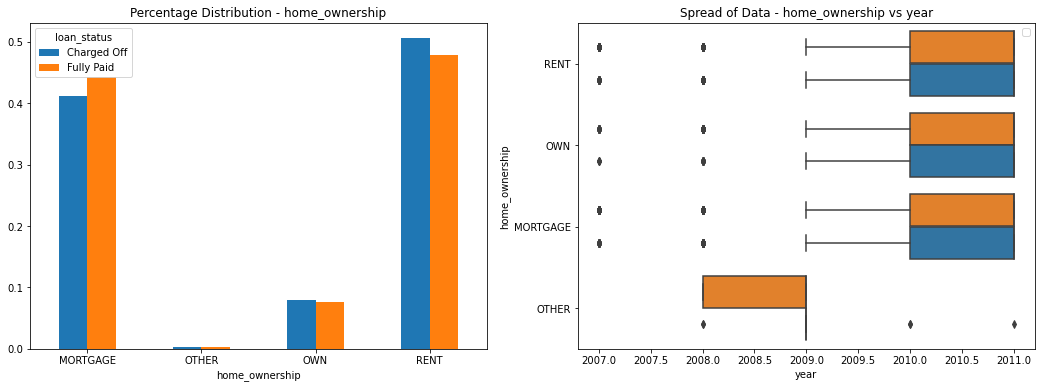

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               2011        2011
OTHER                  2009        2009
OWN                    2011        2011
RENT                   2011        2011


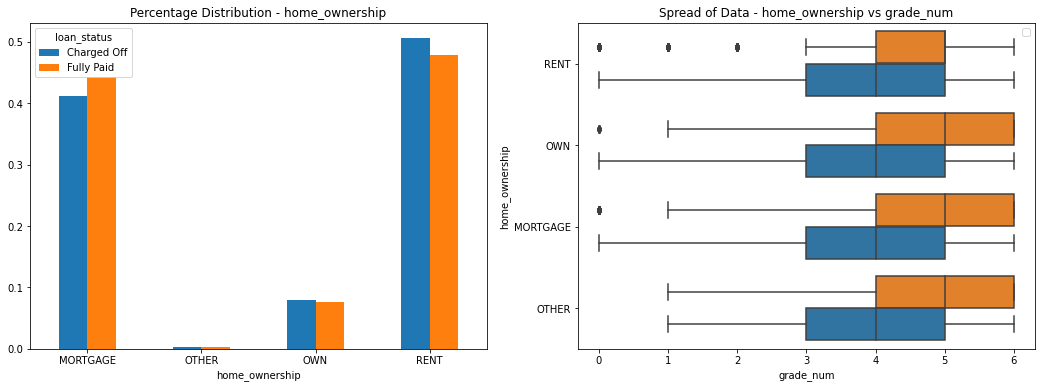

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE                  4           5
OTHER                     4           5
OWN                       4           5
RENT                      4           5


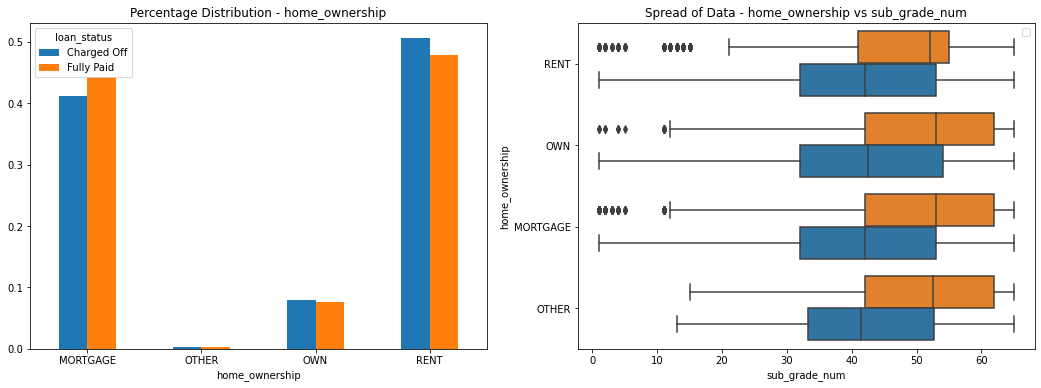

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               42.0        53.0
OTHER                  41.5        52.5
OWN                    42.5        53.0
RENT                   42.0        52.0


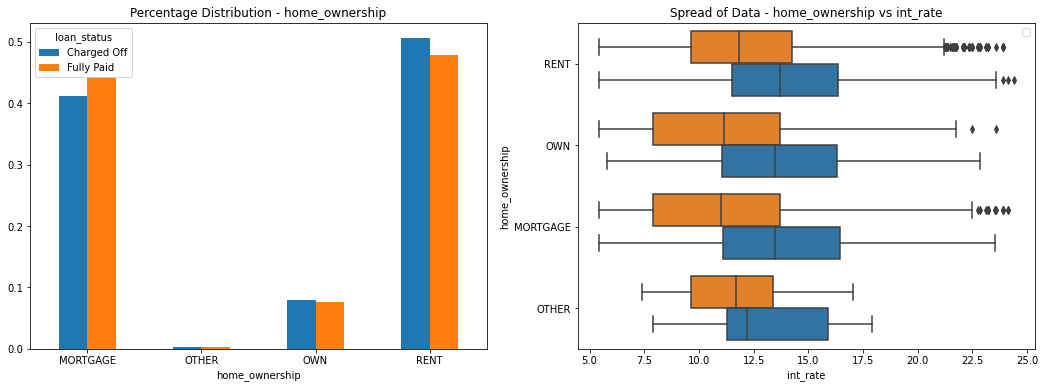

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE              13.49      10.990
OTHER                 12.21      11.705
OWN                   13.49      11.140
RENT                  13.72      11.830


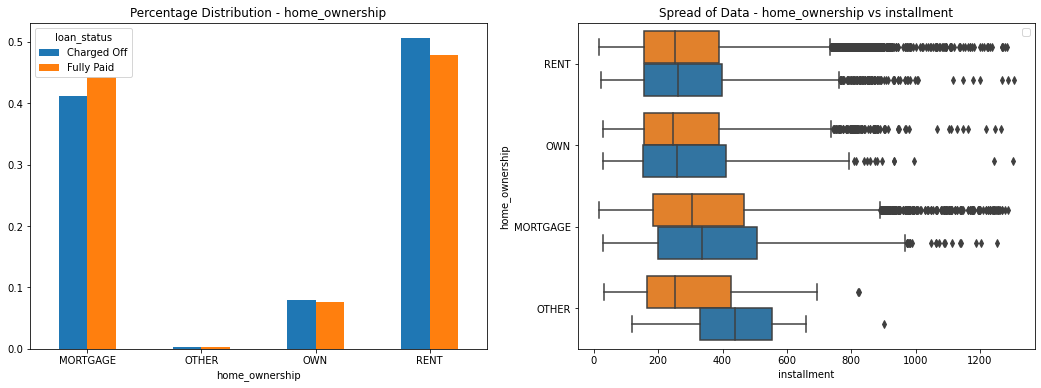

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE            336.670     305.145
OTHER               439.705     252.680
OWN                 257.950     247.660
RENT                260.590     253.535


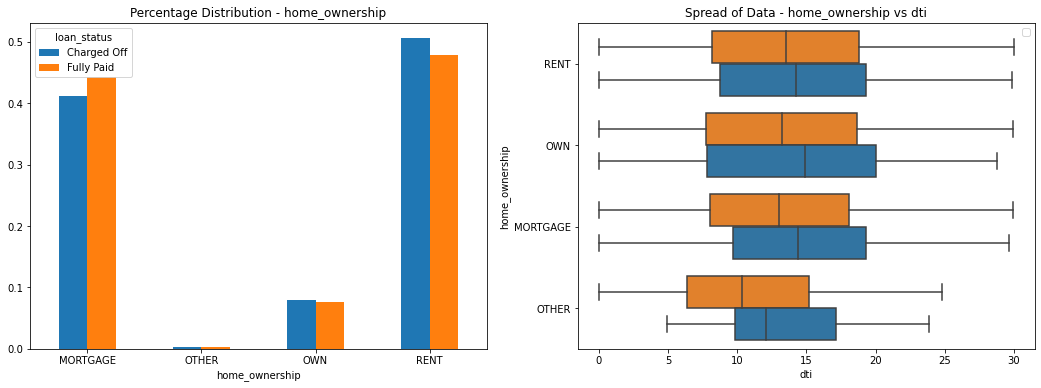

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE             14.375      13.025
OTHER                12.065      10.330
OWN                  14.880      13.240
RENT                 14.265      13.530
--------
Plotting for verification_status


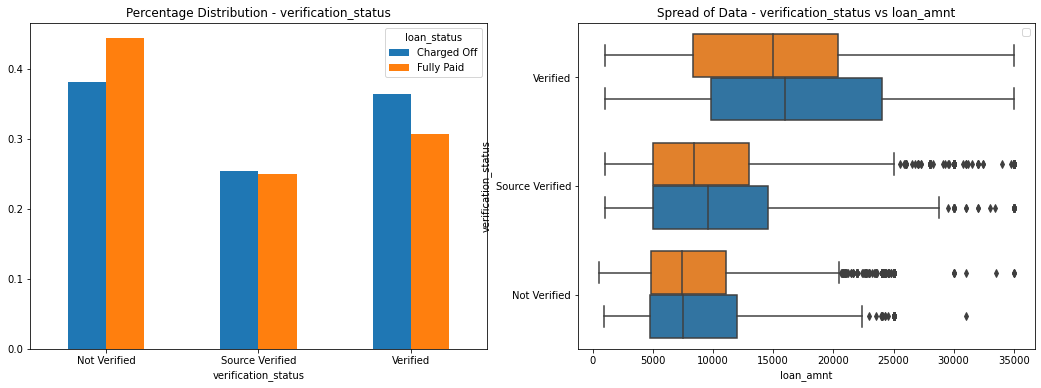

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified              7500.0      7437.5
Source Verified           9600.0      8400.0
Verified                 16000.0     15000.0


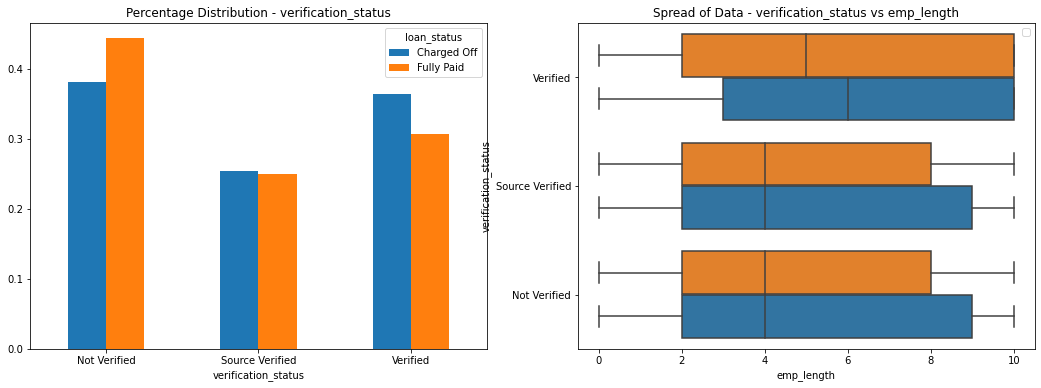

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                   4           4
Source Verified                4           4
Verified                       6           5


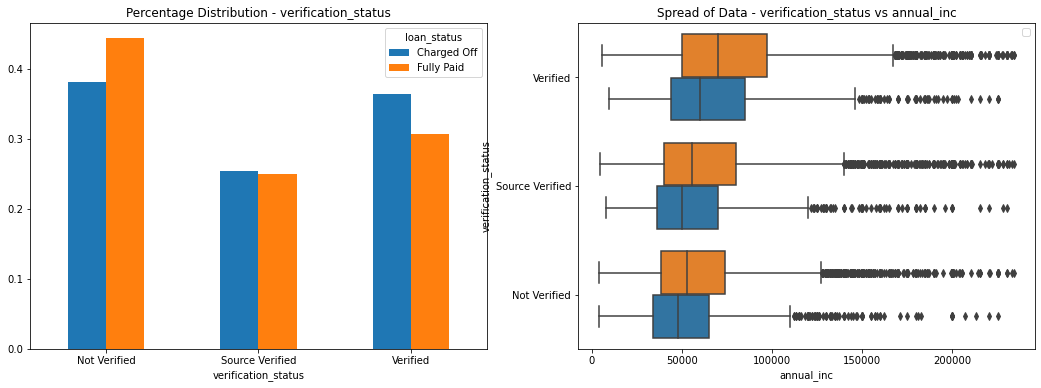

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified               48000       53000
Source Verified            50000       55525
Verified                   60000       70000


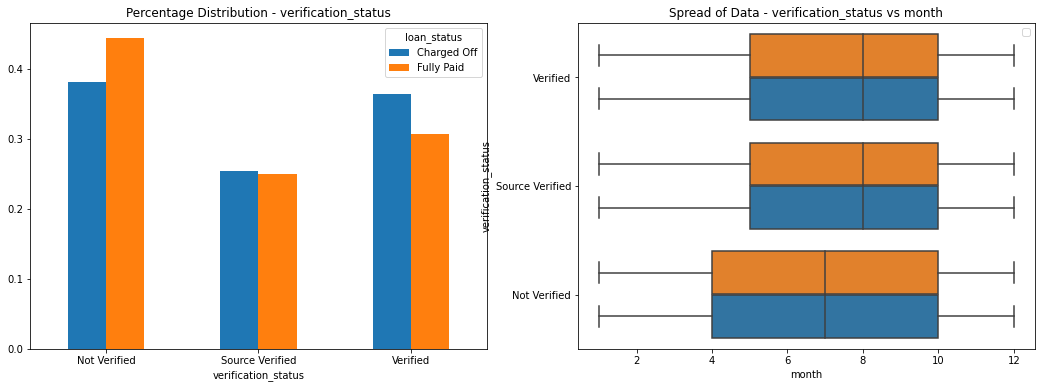

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                   7           7
Source Verified                8           8
Verified                       8           8


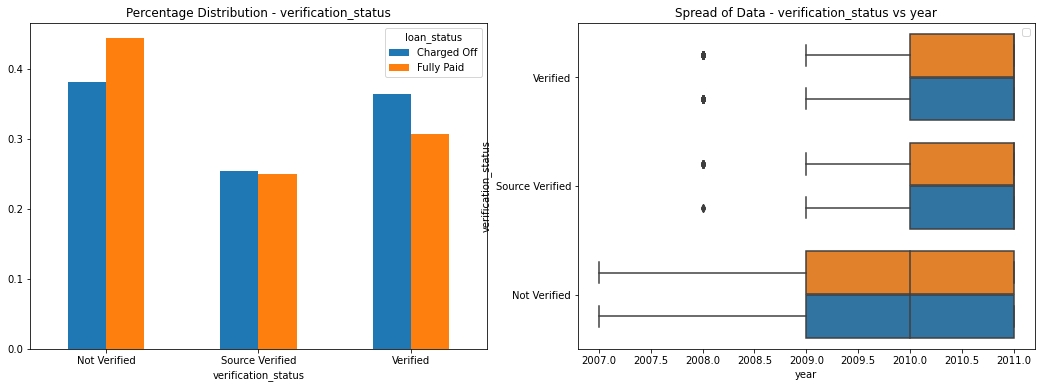

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                2010        2010
Source Verified             2011        2011
Verified                    2011        2011


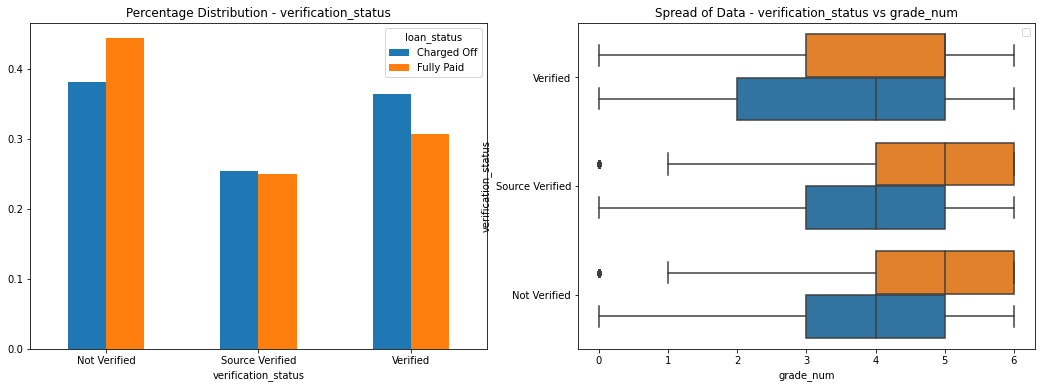

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                   4           5
Source Verified                4           5
Verified                       4           5


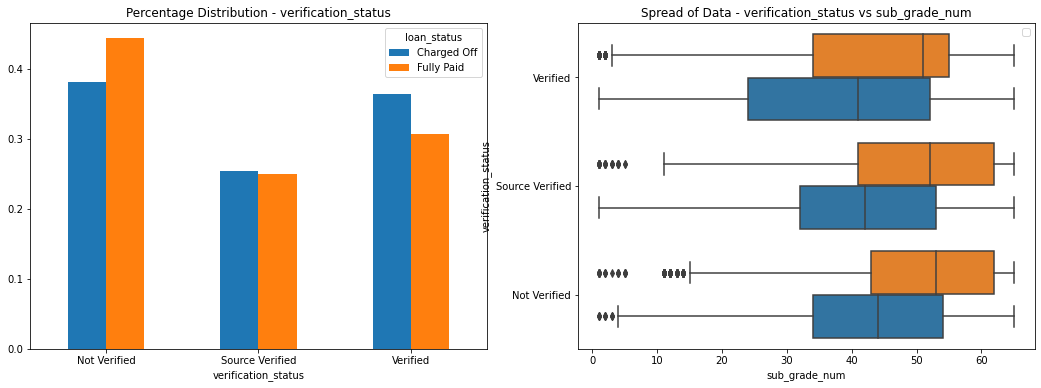

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                  44          53
Source Verified               42          52
Verified                      41          51


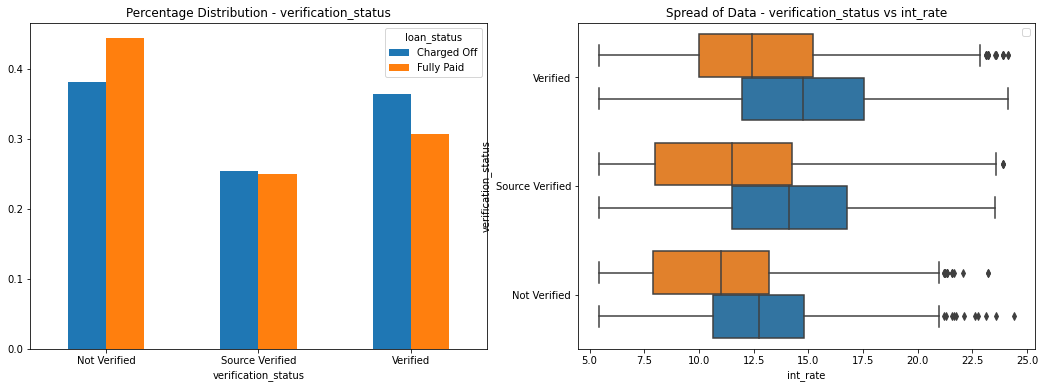

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified               12.73       10.99
Source Verified            14.14       11.49
Verified                   14.74       12.42


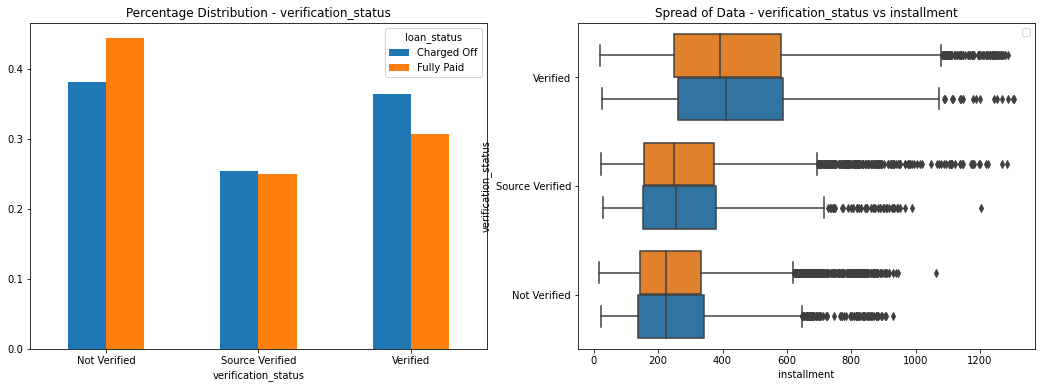

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified             225.540     222.945
Source Verified          255.820     250.415
Verified                 409.835     392.810


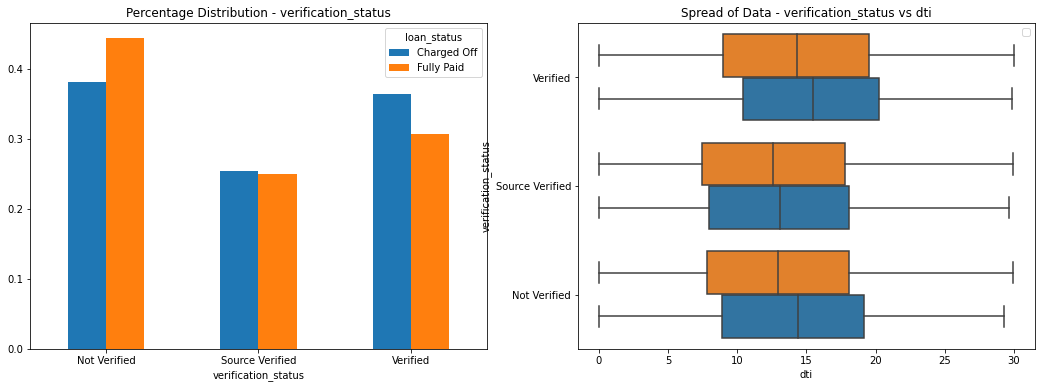

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified              14.380       12.96
Source Verified           13.110       12.62
Verified                  15.445       14.31
--------
Plotting for loan_status
Plotting for purpose


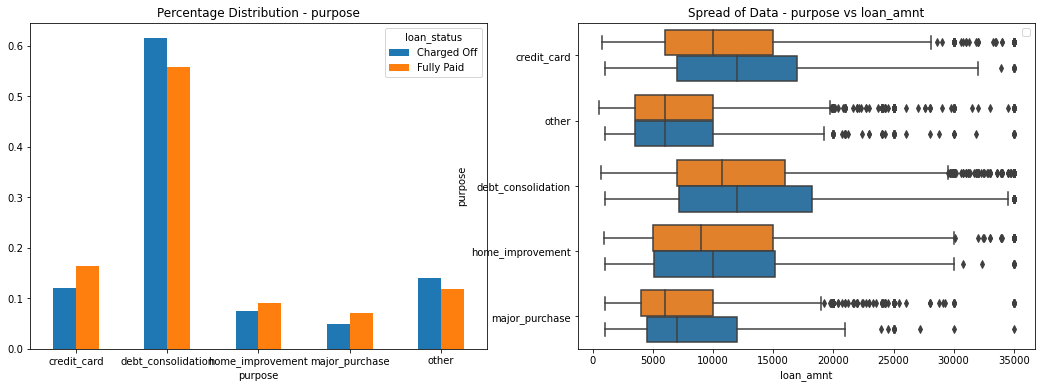

loan_status         Charged Off  Fully Paid
purpose                                    
credit_card               12000       10000
debt_consolidation        12000       10750
home_improvement          10000        9000
major_purchase             7000        6000
other                      6000        6000


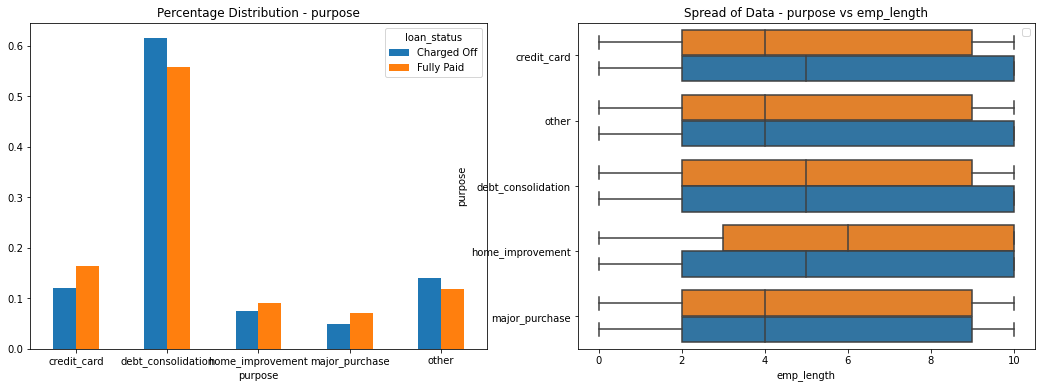

loan_status         Charged Off  Fully Paid
purpose                                    
credit_card                   5           4
debt_consolidation            5           5
home_improvement              5           6
major_purchase                4           4
other                         4           4


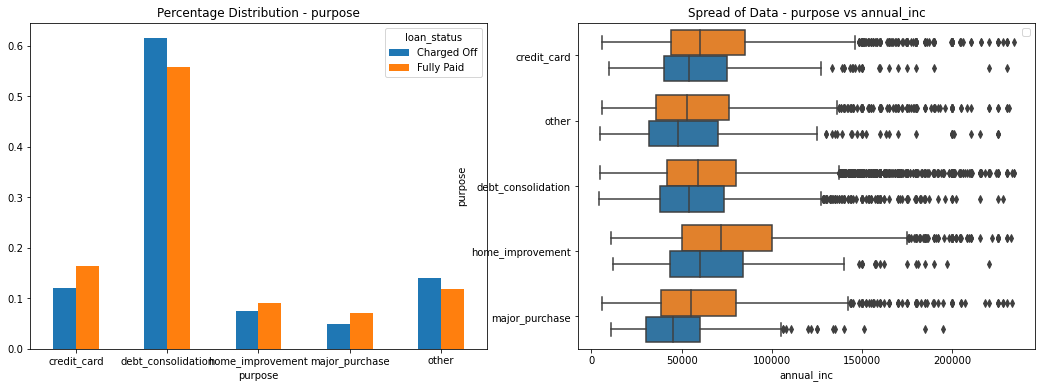

loan_status         Charged Off  Fully Paid
purpose                                    
credit_card               54000       60000
debt_consolidation        54000       59000
home_improvement          60000       72000
major_purchase            45000       55272
other                     48000       53000


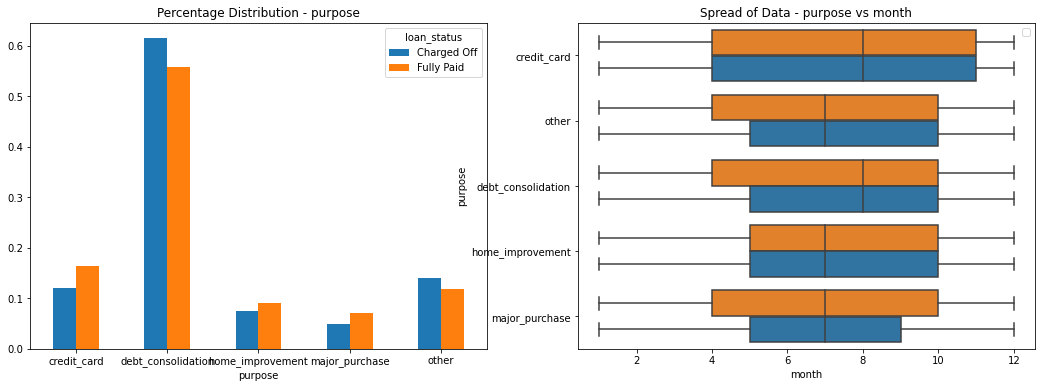

loan_status         Charged Off  Fully Paid
purpose                                    
credit_card                   8           8
debt_consolidation            8           8
home_improvement              7           7
major_purchase                7           7
other                         7           7


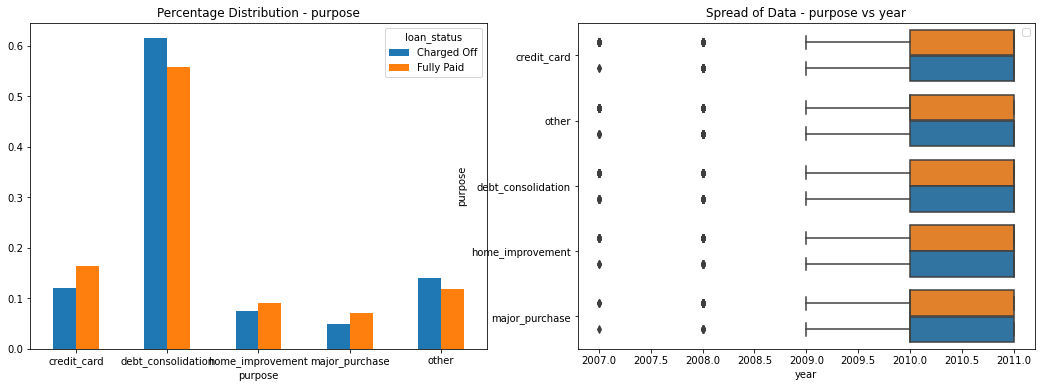

loan_status         Charged Off  Fully Paid
purpose                                    
credit_card                2011        2011
debt_consolidation         2011        2011
home_improvement           2011        2011
major_purchase             2010        2010
other                      2011        2010


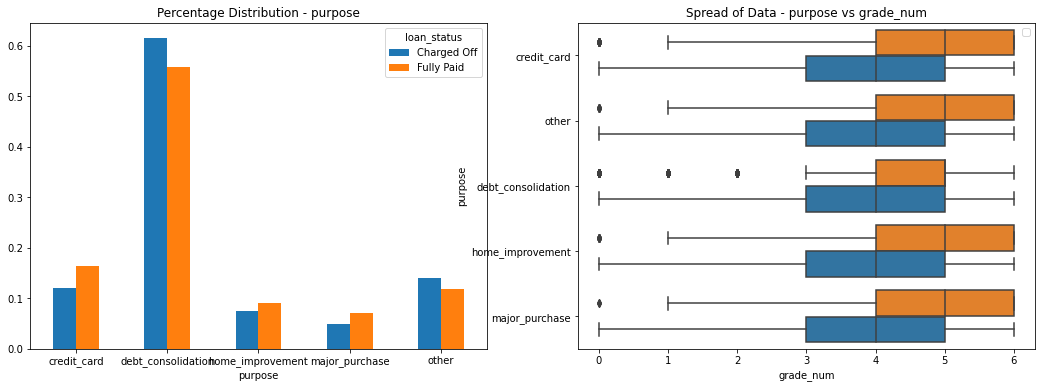

loan_status         Charged Off  Fully Paid
purpose                                    
credit_card                   4           5
debt_consolidation            4           5
home_improvement              4           5
major_purchase                4           5
other                         4           5


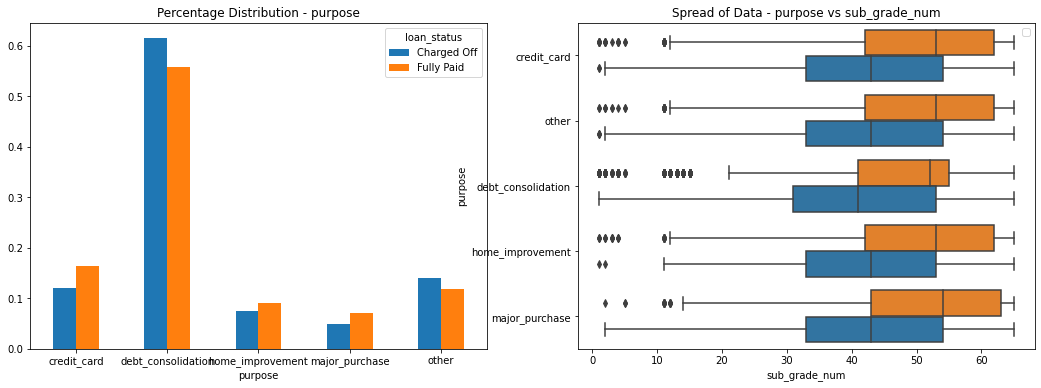

loan_status         Charged Off  Fully Paid
purpose                                    
credit_card                  43          53
debt_consolidation           41          52
home_improvement             43          53
major_purchase               43          54
other                        43          53


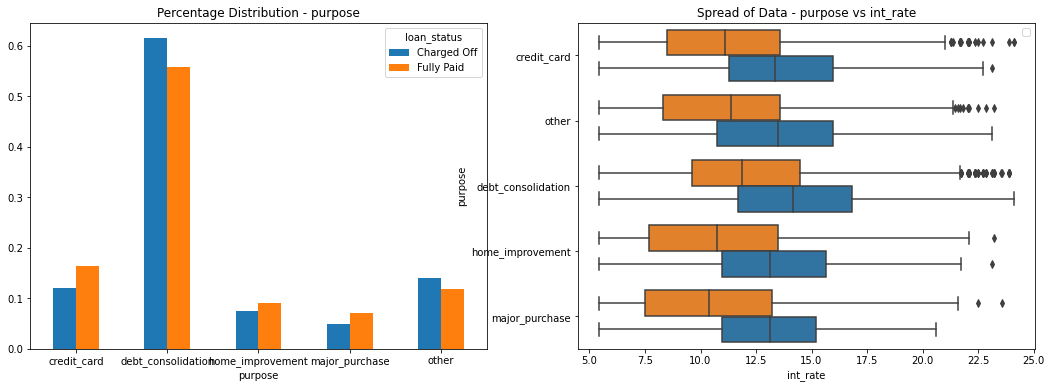

loan_status         Charged Off  Fully Paid
purpose                                    
credit_card              13.350       11.12
debt_consolidation       14.170       11.86
home_improvement         13.135       10.75
major_purchase           13.110       10.38
other                    13.480       11.36


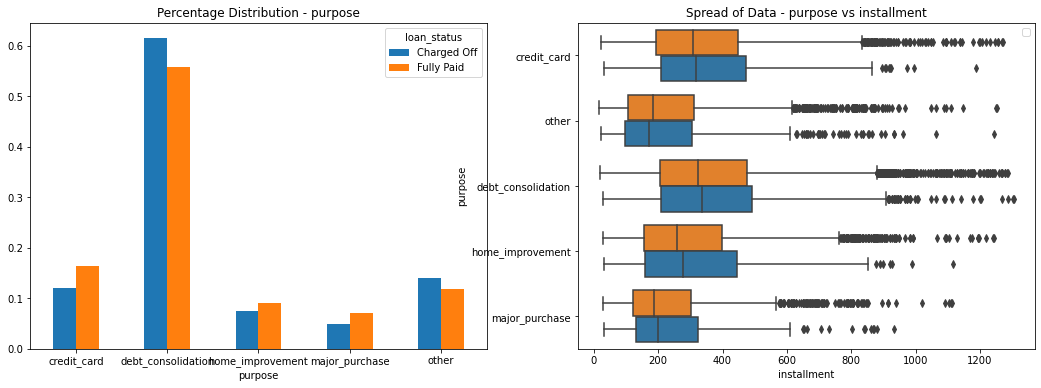

loan_status         Charged Off  Fully Paid
purpose                                    
credit_card             318.350      307.40
debt_consolidation      337.010      323.85
home_improvement        275.985      258.82
major_purchase          199.480      186.07
other                   172.210      185.22


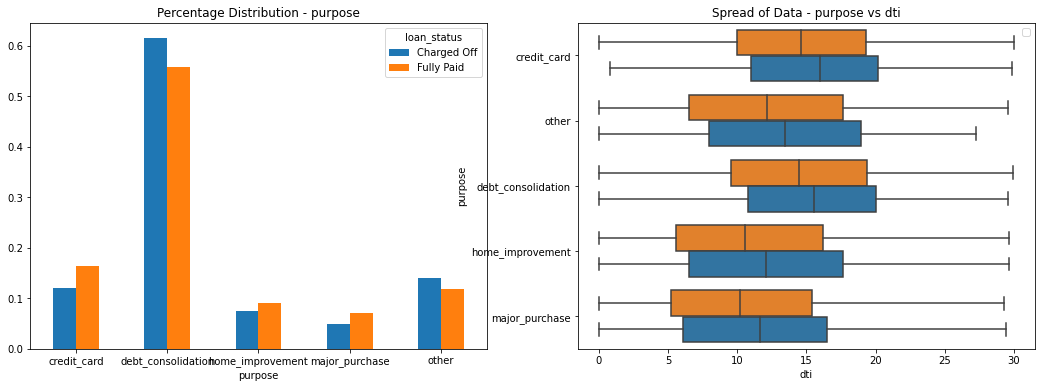

loan_status         Charged Off  Fully Paid
purpose                                    
credit_card               15.97       14.63
debt_consolidation        15.54       14.44
home_improvement          12.05       10.55
major_purchase            11.68       10.23
other                     13.46       12.16
--------
Plotting for addr_state


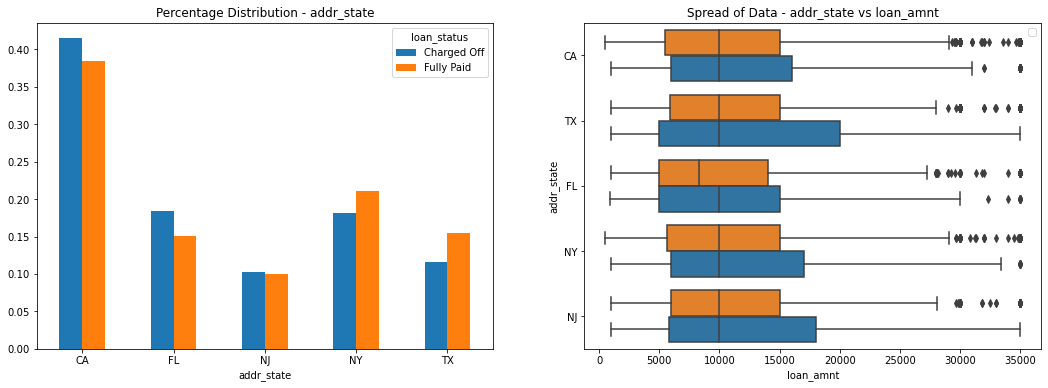

loan_status  Charged Off  Fully Paid
addr_state                          
CA                 10000       10000
FL                 10000        8325
NJ                 10000       10000
NY                 10000        9950
TX                 10000       10000


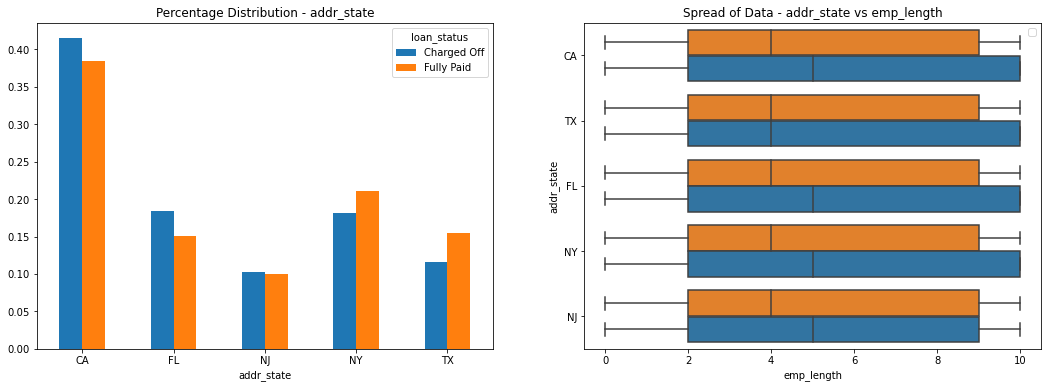

loan_status  Charged Off  Fully Paid
addr_state                          
CA                     5           4
FL                     5           4
NJ                     5           4
NY                     5           4
TX                     4           4


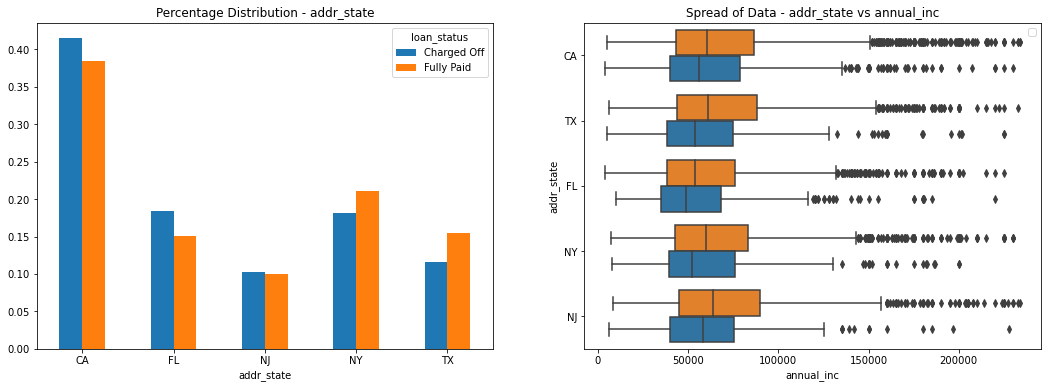

loan_status  Charged Off  Fully Paid
addr_state                          
CA               56000.0     60544.5
FL               48996.0     54000.0
NJ               58000.0     63576.0
NY               52000.0     60000.0
TX               53500.0     61000.0


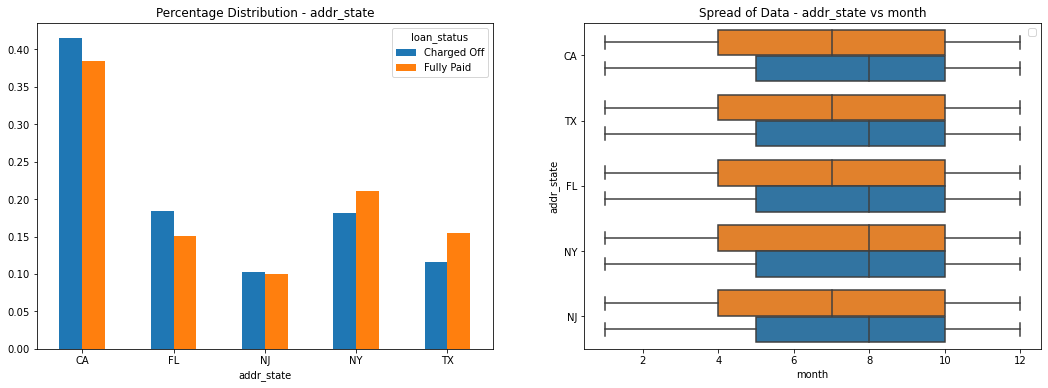

loan_status  Charged Off  Fully Paid
addr_state                          
CA                     8           7
FL                     8           7
NJ                     8           7
NY                     8           8
TX                     8           7


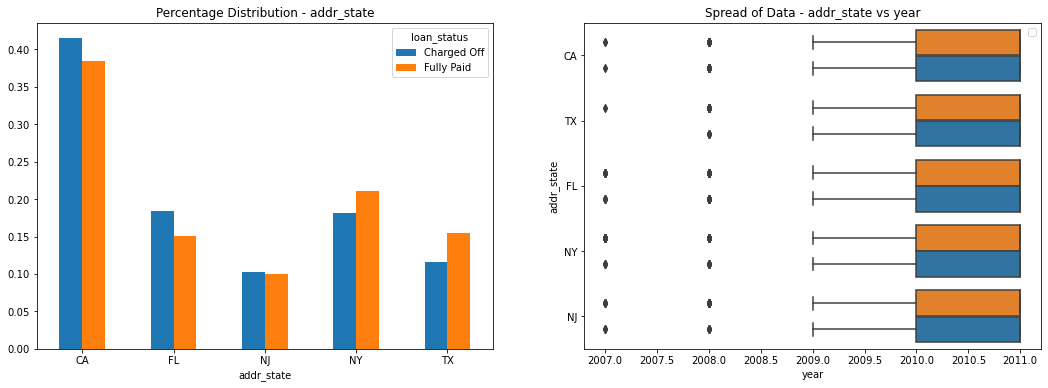

loan_status  Charged Off  Fully Paid
addr_state                          
CA                  2011        2011
FL                  2011        2011
NJ                  2011        2011
NY                  2011        2011
TX                  2011        2011


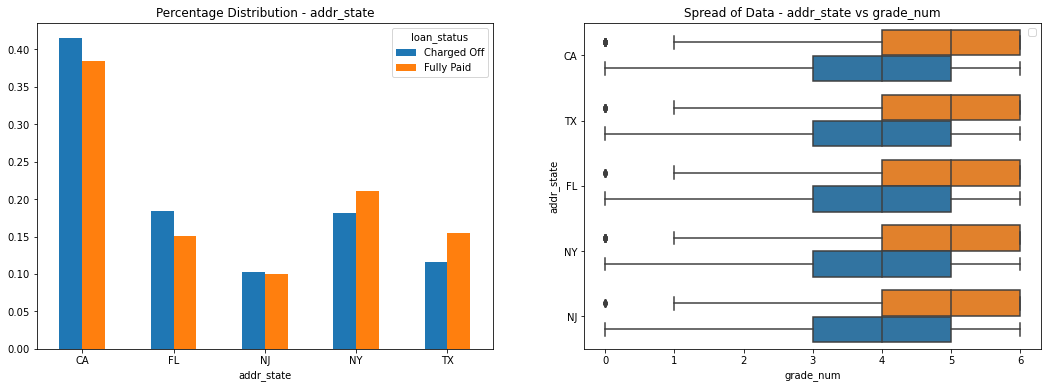

loan_status  Charged Off  Fully Paid
addr_state                          
CA                     4           5
FL                     4           5
NJ                     4           5
NY                     4           5
TX                     4           5


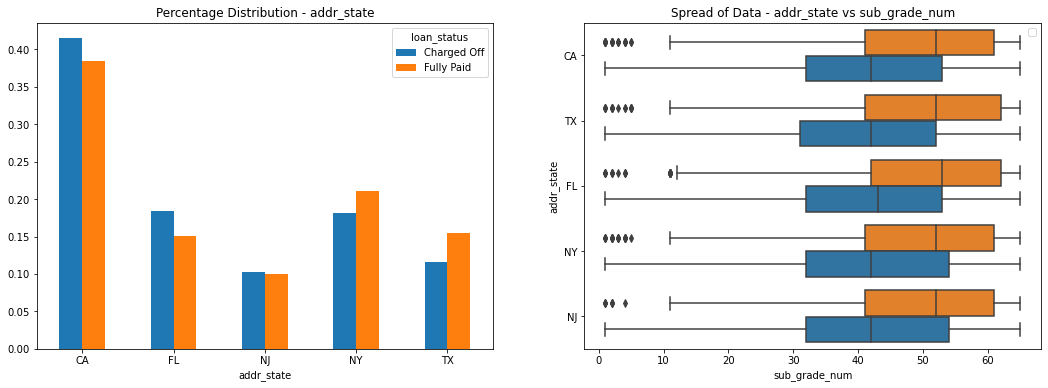

loan_status  Charged Off  Fully Paid
addr_state                          
CA                    42          52
FL                    43          53
NJ                    42          52
NY                    42          52
TX                    42          52


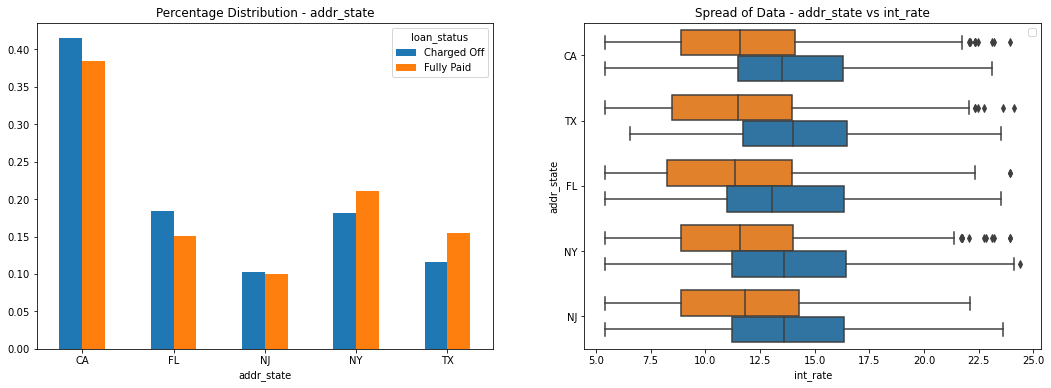

loan_status  Charged Off  Fully Paid
addr_state                          
CA                 13.49       11.58
FL                 13.06       11.36
NJ                 13.61       11.83
NY                 13.61       11.58
TX                 13.99       11.48


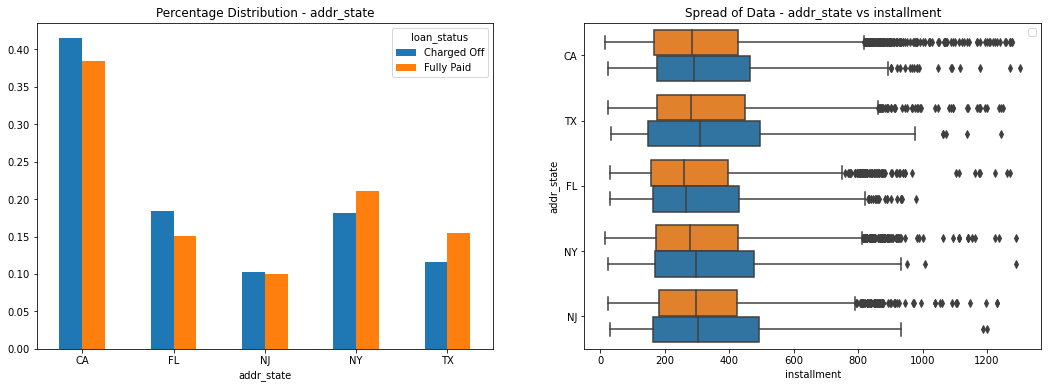

loan_status  Charged Off  Fully Paid
addr_state                          
CA                292.17     284.725
FL                265.18     259.080
NJ                304.61     295.960
NY                296.02     279.840
TX                309.91     282.530


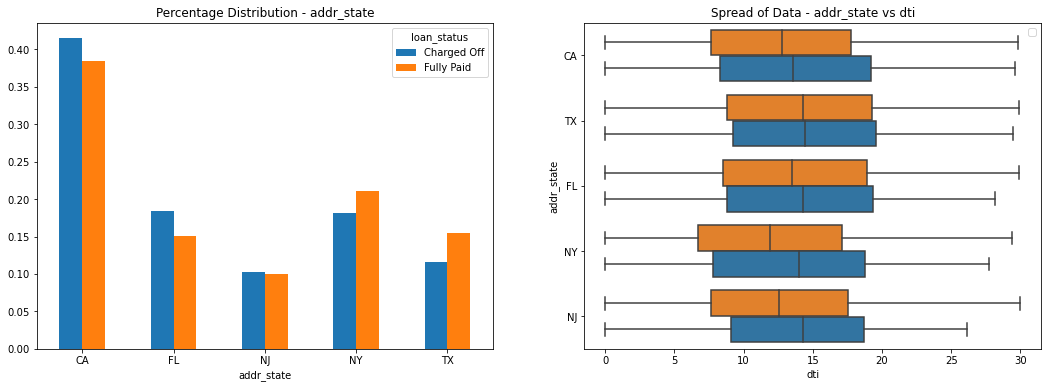

loan_status  Charged Off  Fully Paid
addr_state                          
CA                 13.56      12.800
FL                 14.29      13.535
NJ                 14.28      12.540
NY                 14.04      11.910
TX                 14.44      14.280
--------
Plotting for month_alpha


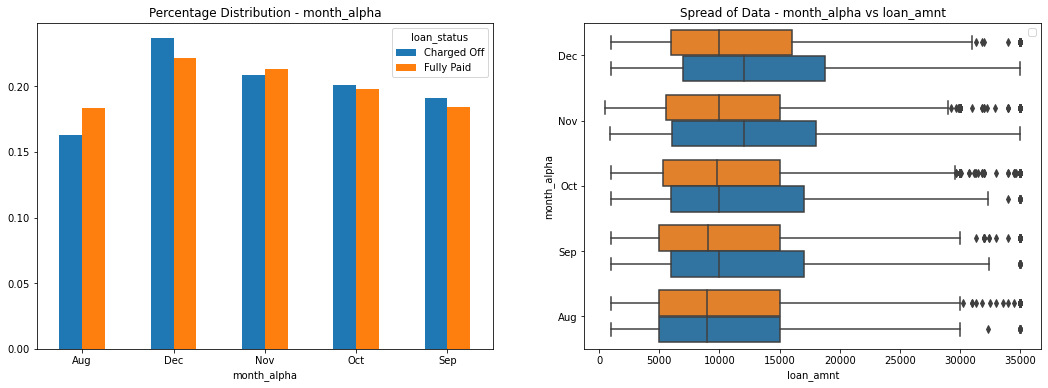

loan_status  Charged Off  Fully Paid
month_alpha                         
Aug                 9000        9000
Dec                12000       10000
Nov                12000       10000
Oct                10000        9800
Sep                10000        9025


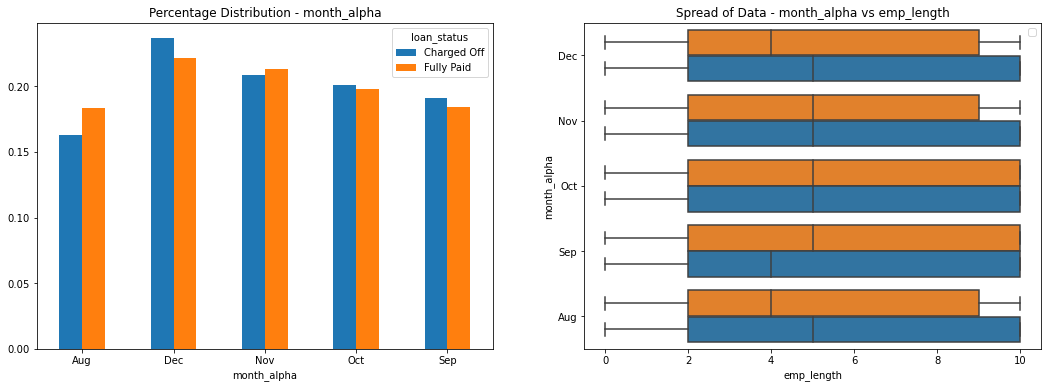

loan_status  Charged Off  Fully Paid
month_alpha                         
Aug                    5           4
Dec                    5           4
Nov                    5           5
Oct                    5           5
Sep                    4           5


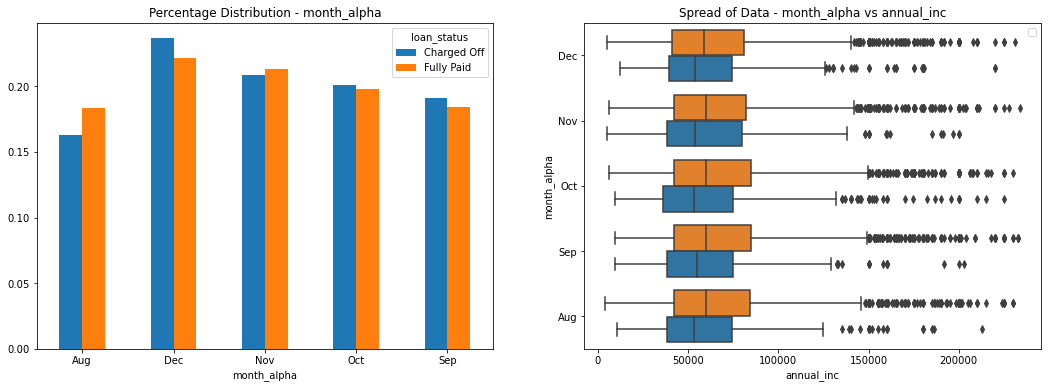

loan_status  Charged Off  Fully Paid
month_alpha                         
Aug                53000       60000
Dec                54000       59000
Nov                53500       60000
Oct                53000       60000
Sep                54996       60000


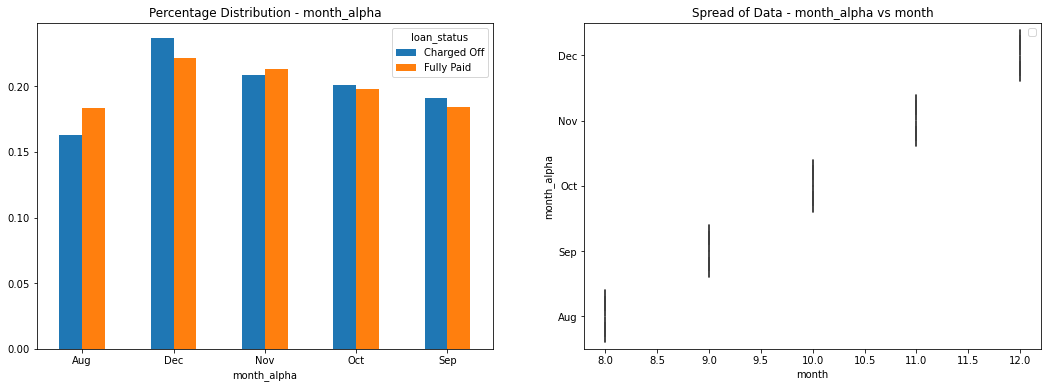

loan_status  Charged Off  Fully Paid
month_alpha                         
Aug                    8           8
Dec                   12          12
Nov                   11          11
Oct                   10          10
Sep                    9           9


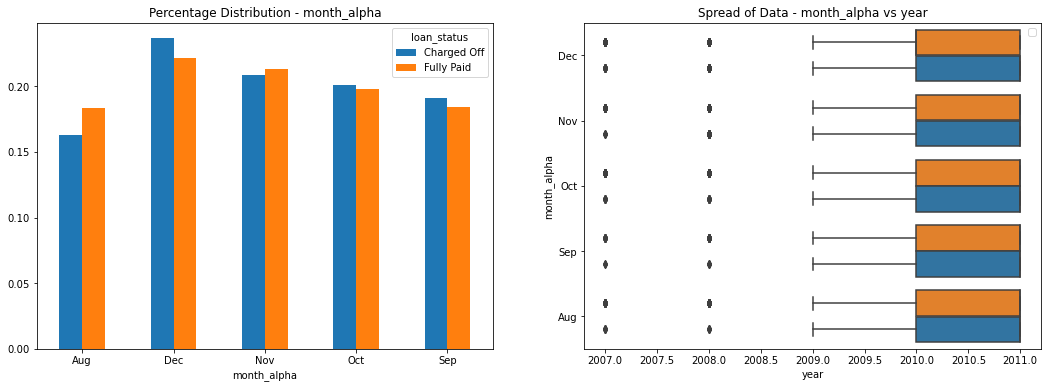

loan_status  Charged Off  Fully Paid
month_alpha                         
Aug                 2011        2011
Dec                 2011        2010
Nov                 2011        2011
Oct                 2011        2011
Sep                 2011        2011


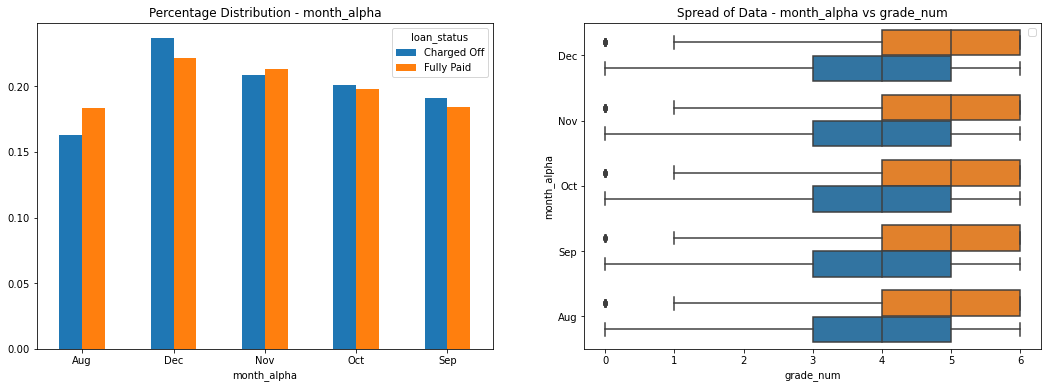

loan_status  Charged Off  Fully Paid
month_alpha                         
Aug                    4           5
Dec                    4           5
Nov                    4           5
Oct                    4           5
Sep                    4           5


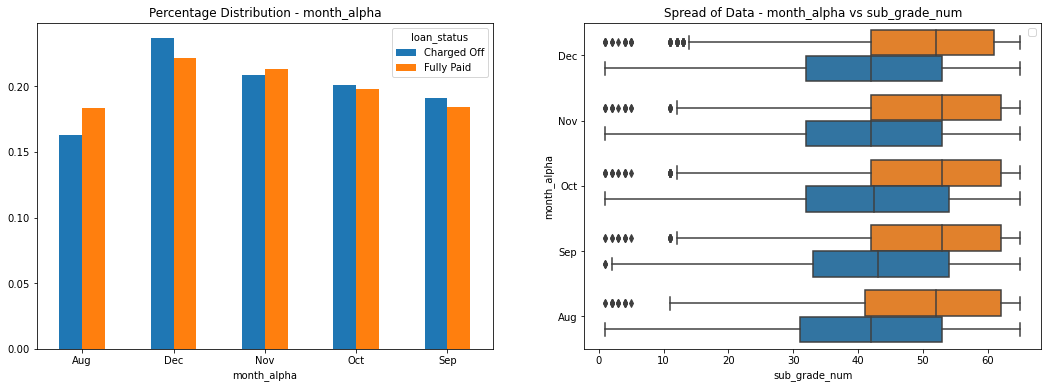

loan_status  Charged Off  Fully Paid
month_alpha                         
Aug                 42.0        52.0
Dec                 42.0        52.0
Nov                 42.0        53.0
Oct                 42.5        53.0
Sep                 43.0        53.0


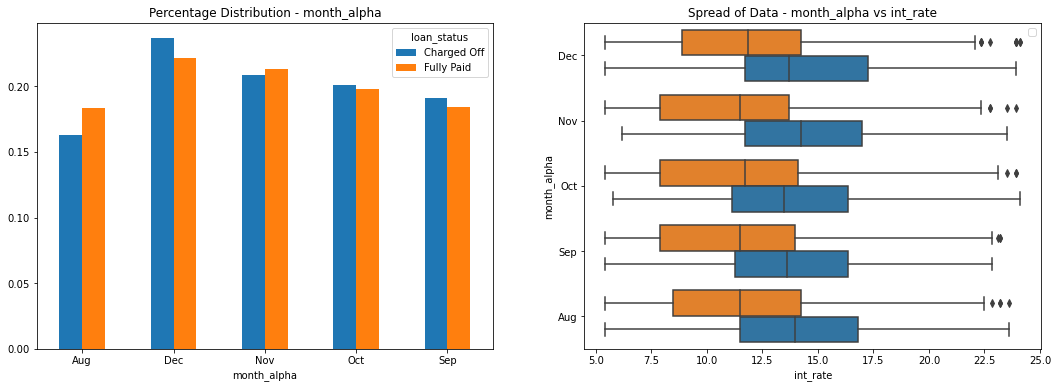

loan_status  Charged Off  Fully Paid
month_alpha                         
Aug                13.99       11.49
Dec                13.72       11.83
Nov                14.26       11.48
Oct                13.49       11.71
Sep                13.61       11.49


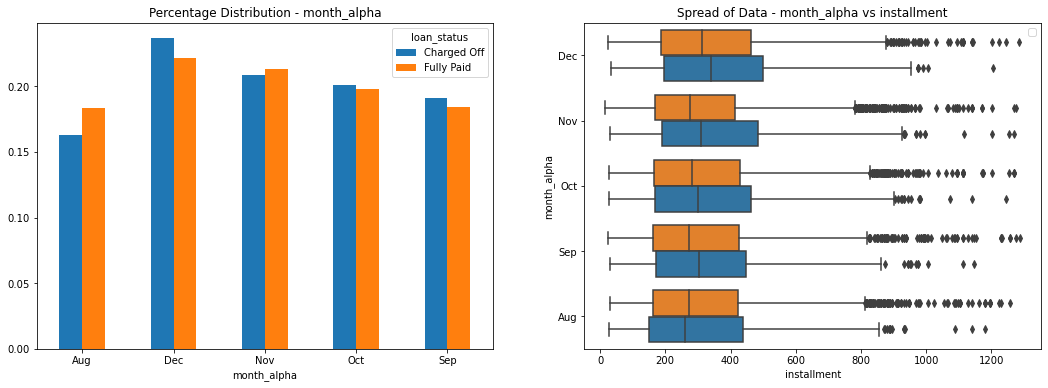

loan_status  Charged Off  Fully Paid
month_alpha                         
Aug              261.260      271.83
Dec              339.310      311.11
Nov              309.905      275.22
Oct              299.235      281.62
Sep              302.520      271.91


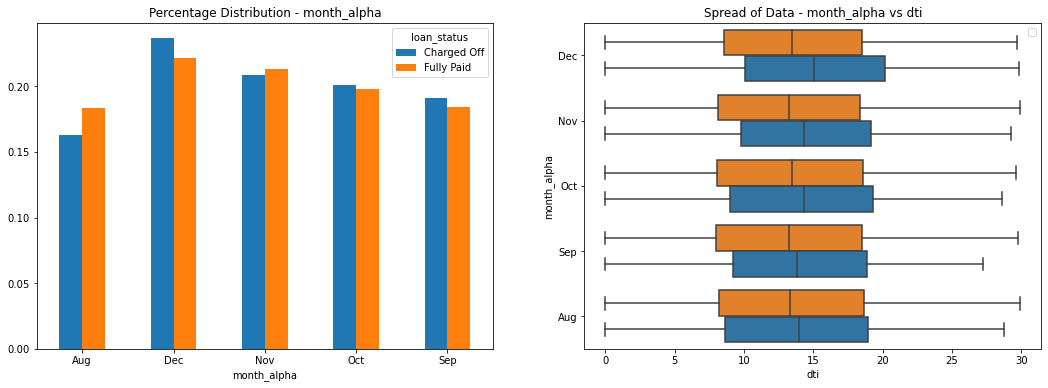

loan_status  Charged Off  Fully Paid
month_alpha                         
Aug               14.000       13.34
Dec               15.050       13.47
Nov               14.355       13.23
Oct               14.340       13.50
Sep               13.810       13.23
--------
Plotting for loan_amount_cat


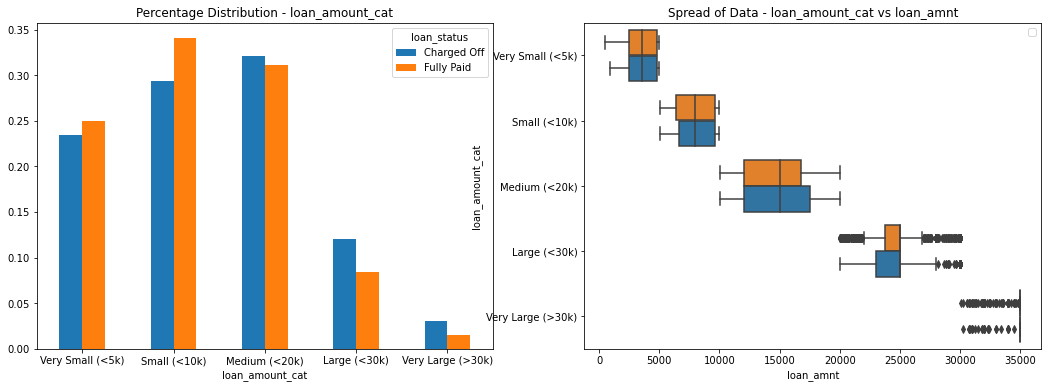

loan_status        Charged Off  Fully Paid
loan_amount_cat                           
Very Small (<5k)          3600        3600
Small (<10k)              8000        8000
Medium (<20k)            15000       15000
Large (<30k)             25000       25000
Very Large (>30k)        35000       35000


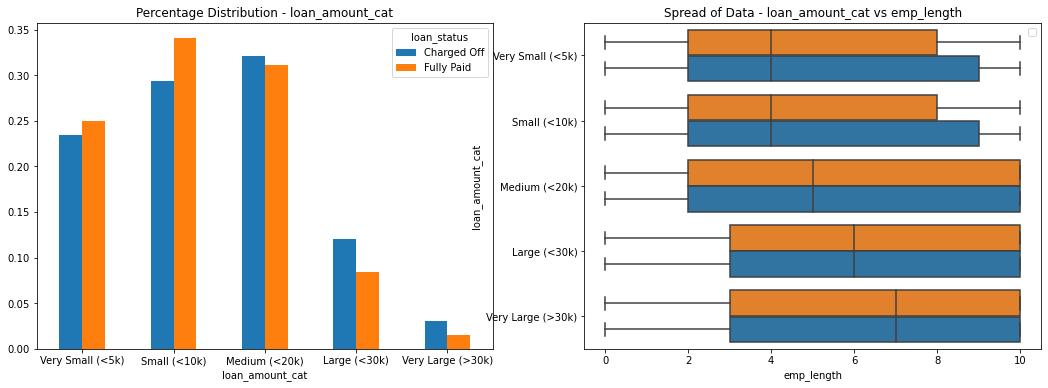

loan_status        Charged Off  Fully Paid
loan_amount_cat                           
Very Small (<5k)             4           4
Small (<10k)                 4           4
Medium (<20k)                5           5
Large (<30k)                 6           6
Very Large (>30k)            7           7


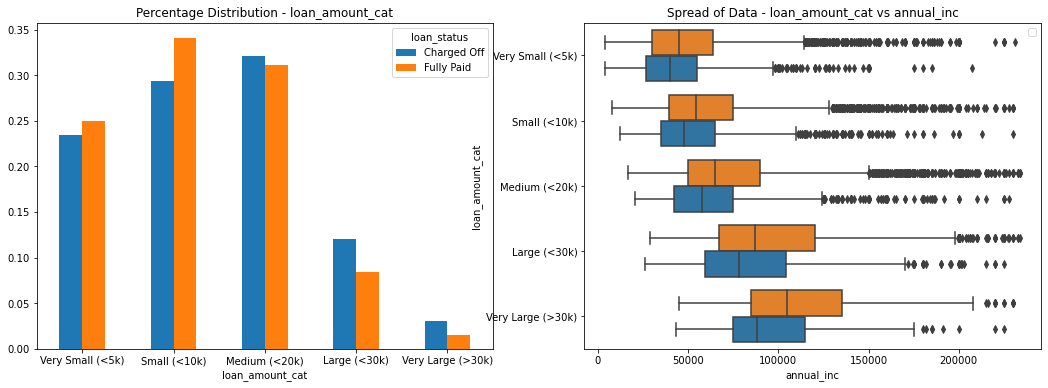

loan_status        Charged Off  Fully Paid
loan_amount_cat                           
Very Small (<5k)         40000       45000
Small (<10k)             47500       54162
Medium (<20k)            57600       65004
Large (<30k)             78000       87000
Very Large (>30k)        88000      105000


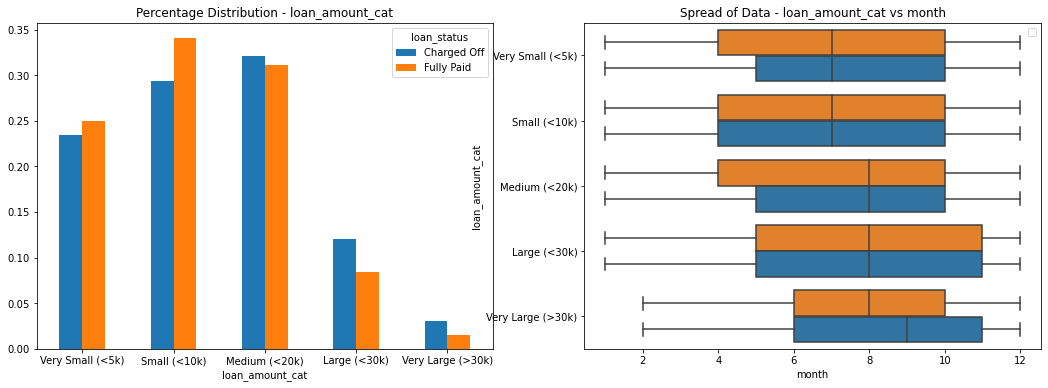

loan_status        Charged Off  Fully Paid
loan_amount_cat                           
Very Small (<5k)             7           7
Small (<10k)                 7           7
Medium (<20k)                8           8
Large (<30k)                 8           8
Very Large (>30k)            9           8


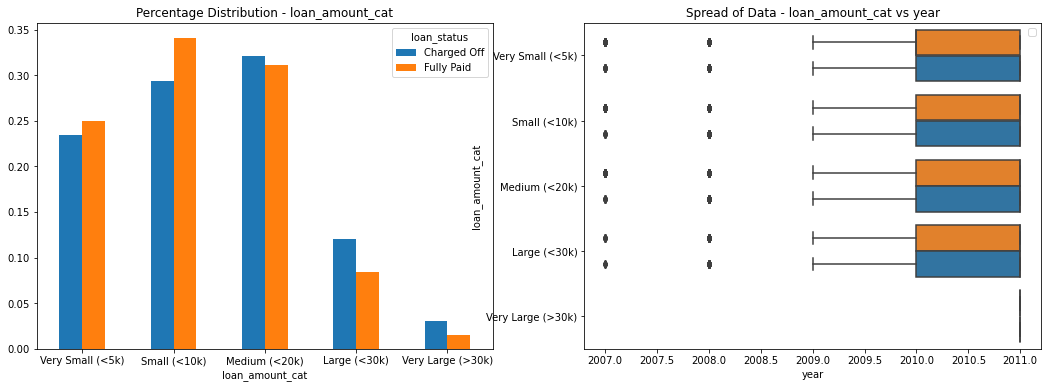

loan_status        Charged Off  Fully Paid
loan_amount_cat                           
Very Small (<5k)          2011        2010
Small (<10k)              2011        2011
Medium (<20k)             2011        2011
Large (<30k)              2011        2011
Very Large (>30k)         2011        2011


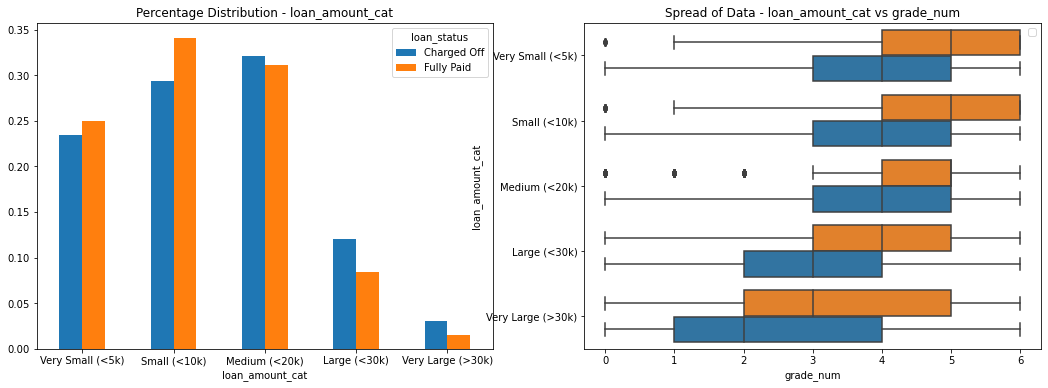

loan_status        Charged Off  Fully Paid
loan_amount_cat                           
Very Small (<5k)             4           5
Small (<10k)                 4           5
Medium (<20k)                4           5
Large (<30k)                 3           4
Very Large (>30k)            2           3


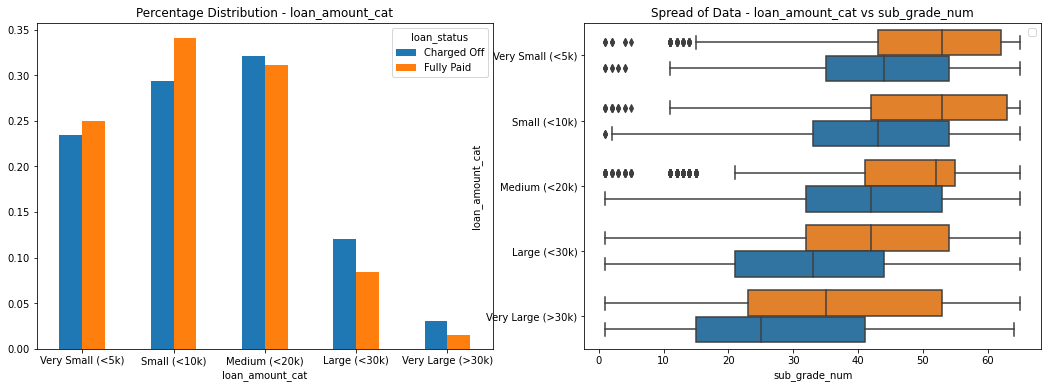

loan_status        Charged Off  Fully Paid
loan_amount_cat                           
Very Small (<5k)            44          53
Small (<10k)                43          53
Medium (<20k)               42          52
Large (<30k)                33          42
Very Large (>30k)           25          35


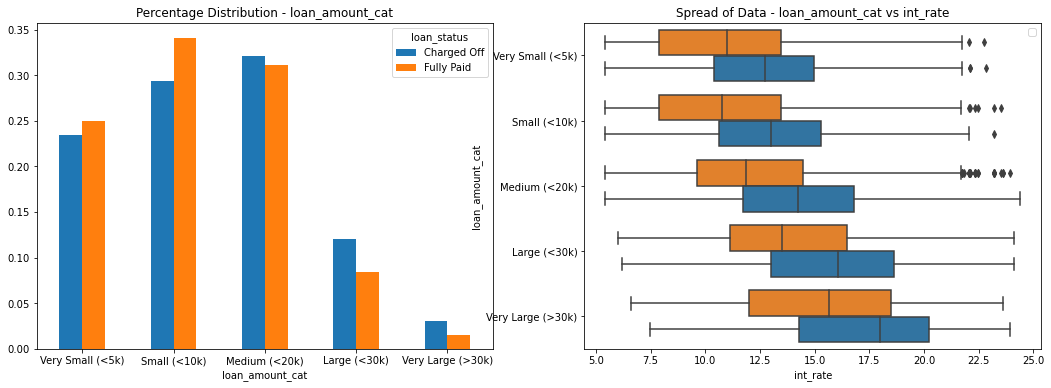

loan_status        Charged Off  Fully Paid
loan_amount_cat                           
Very Small (<5k)         12.73       10.99
Small (<10k)             12.99       10.75
Medium (<20k)            14.26       11.86
Large (<30k)             16.08       13.49
Very Large (>30k)        17.99       15.65


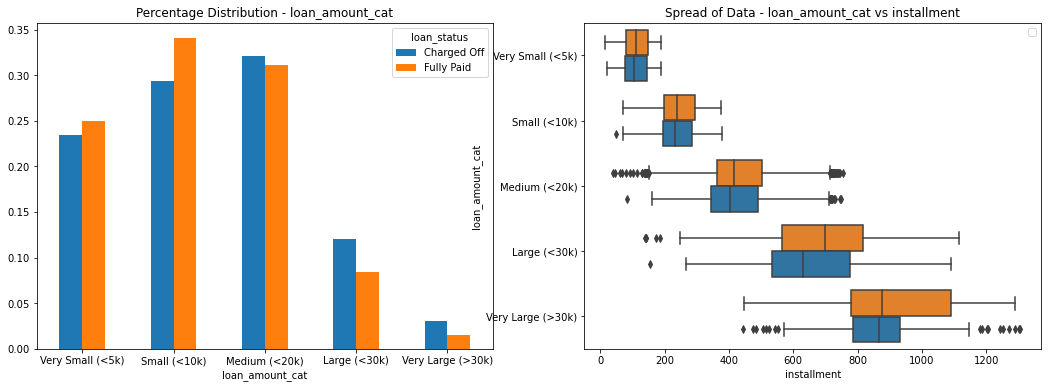

loan_status        Charged Off  Fully Paid
loan_amount_cat                           
Very Small (<5k)        105.45      111.15
Small (<10k)            232.68      239.40
Medium (<20k)           402.80      417.22
Large (<30k)            629.14      699.29
Very Large (>30k)       865.52      874.93


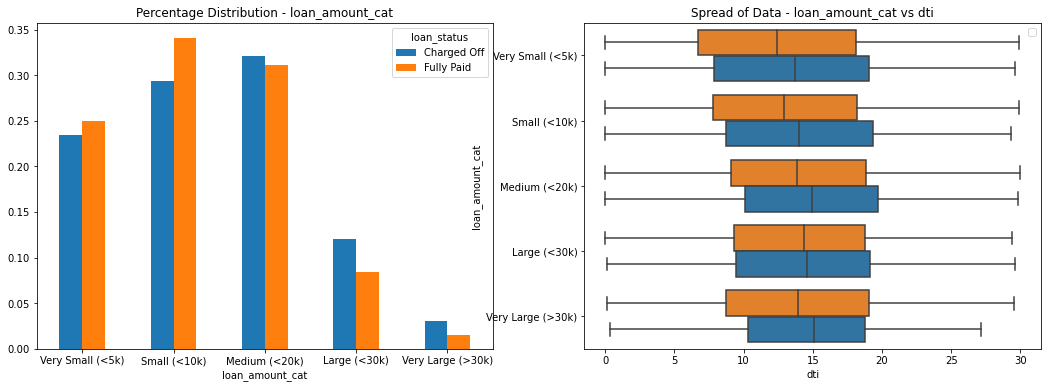

loan_status        Charged Off  Fully Paid
loan_amount_cat                           
Very Small (<5k)         13.71      12.445
Small (<10k)             13.99      12.900
Medium (<20k)            14.93      13.890
Large (<30k)             14.61      14.370
Very Large (>30k)        15.12      13.910
--------
Plotting for int_rate_cat


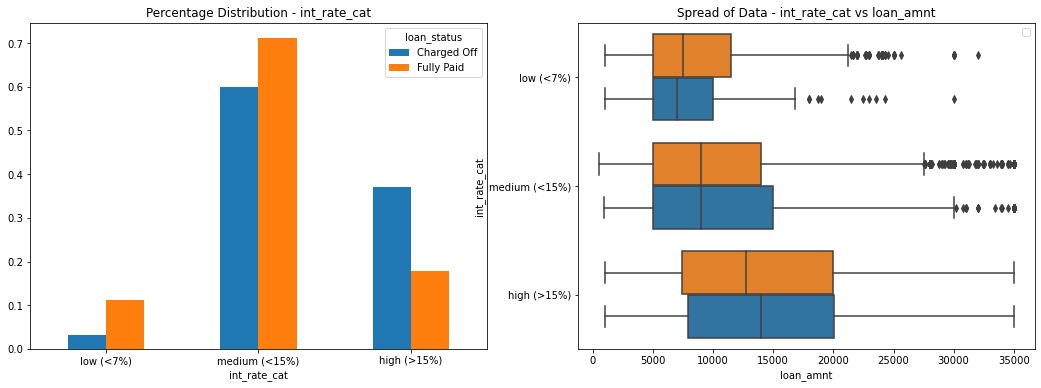

loan_status    Charged Off  Fully Paid
int_rate_cat                          
low (<7%)             7000        7500
medium (<15%)         9000        9000
high (>15%)          14000       12700


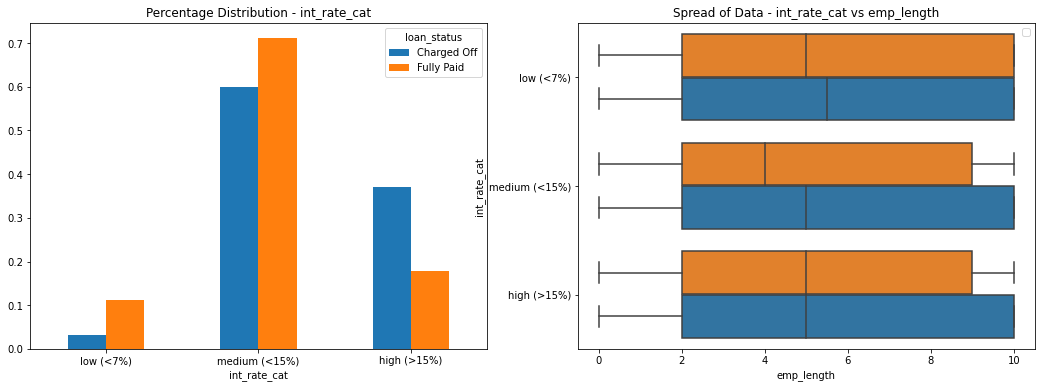

loan_status    Charged Off  Fully Paid
int_rate_cat                          
low (<7%)              5.5         5.0
medium (<15%)          5.0         4.0
high (>15%)            5.0         5.0


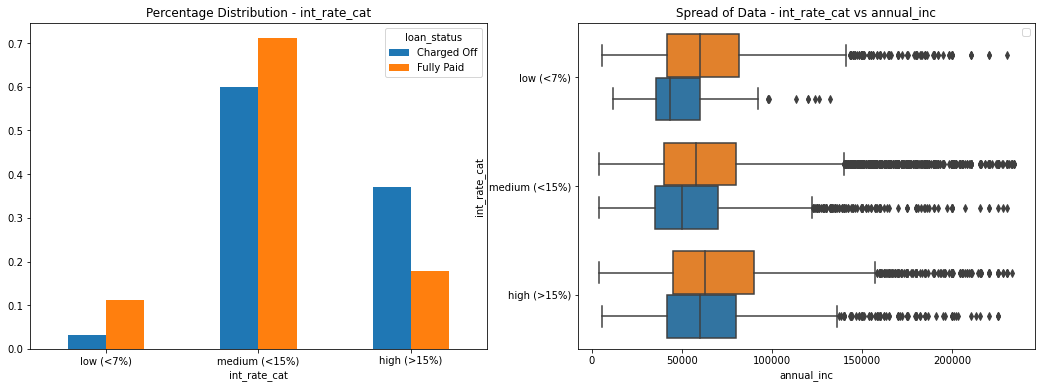

loan_status    Charged Off  Fully Paid
int_rate_cat                          
low (<7%)            43200       60000
medium (<15%)        50000       57600
high (>15%)          60000       63000


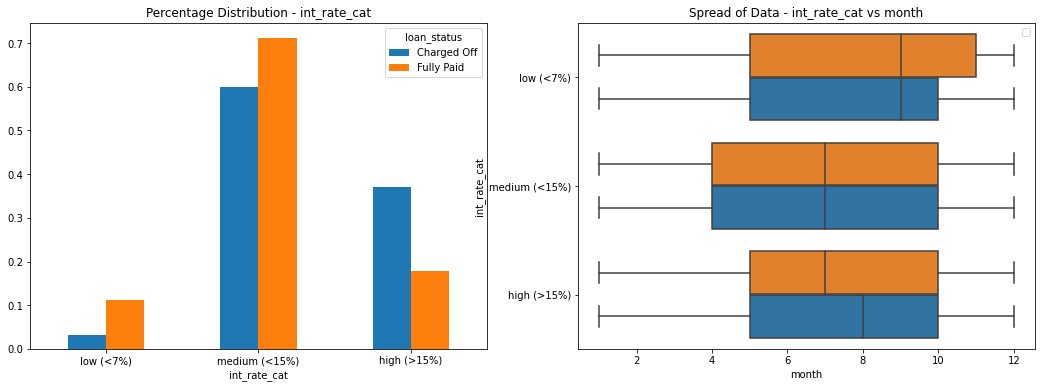

loan_status    Charged Off  Fully Paid
int_rate_cat                          
low (<7%)                9           9
medium (<15%)            7           7
high (>15%)              8           7


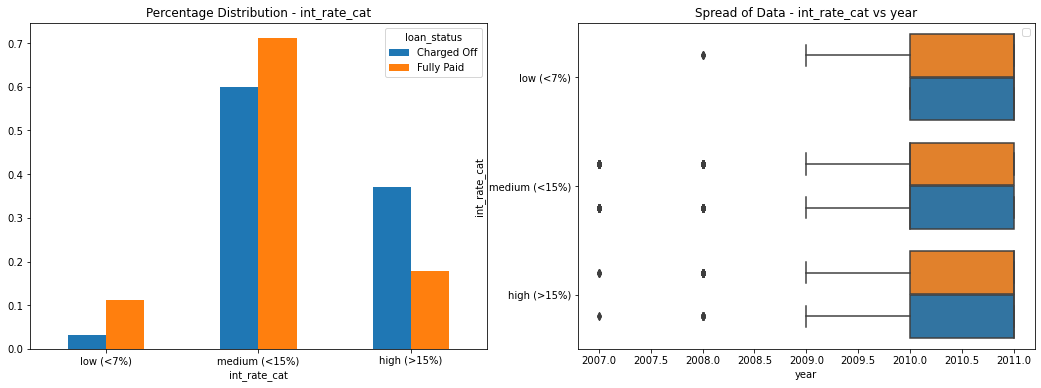

loan_status    Charged Off  Fully Paid
int_rate_cat                          
low (<7%)             2011        2011
medium (<15%)         2010        2010
high (>15%)           2011        2011


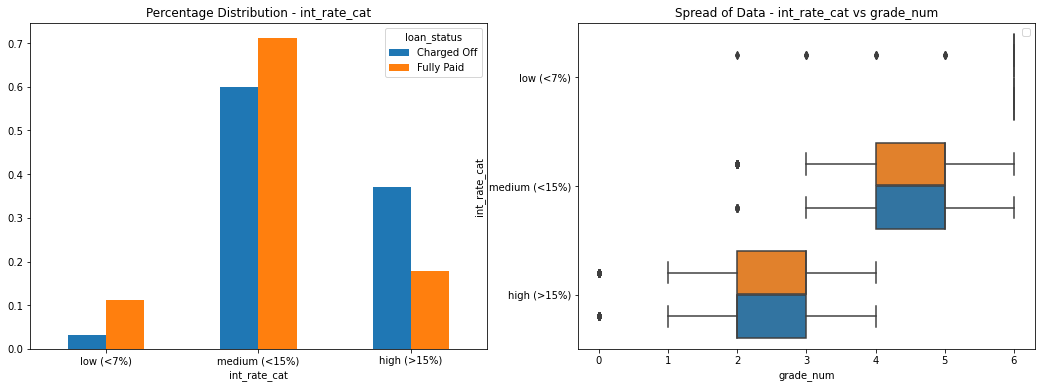

loan_status    Charged Off  Fully Paid
int_rate_cat                          
low (<7%)                6           6
medium (<15%)            5           5
high (>15%)              2           3


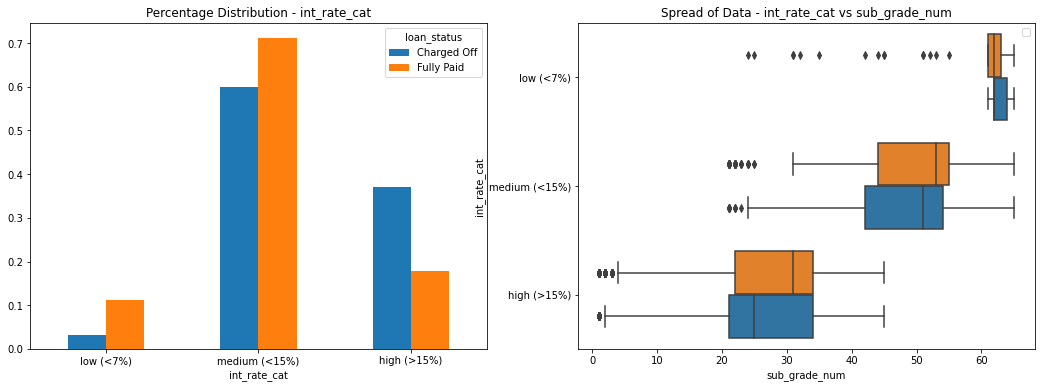

loan_status    Charged Off  Fully Paid
int_rate_cat                          
low (<7%)               62          62
medium (<15%)           51          53
high (>15%)             25          31


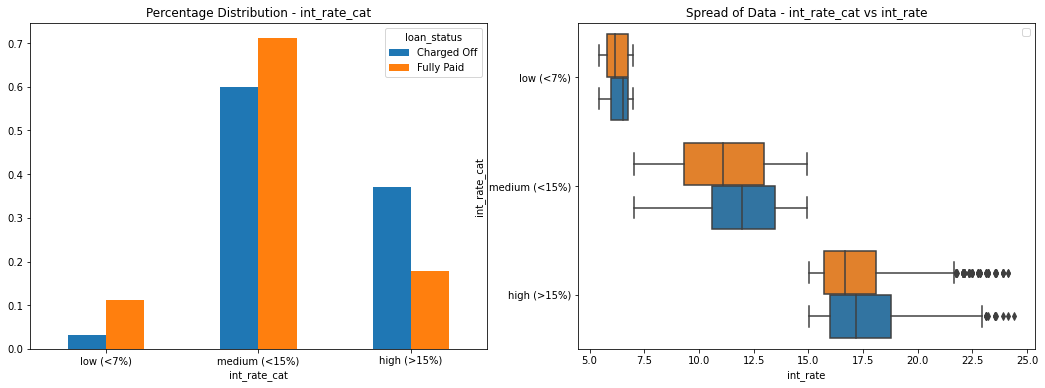

loan_status    Charged Off  Fully Paid
int_rate_cat                          
low (<7%)             6.54        6.17
medium (<15%)        11.99       11.11
high (>15%)          17.19       16.69


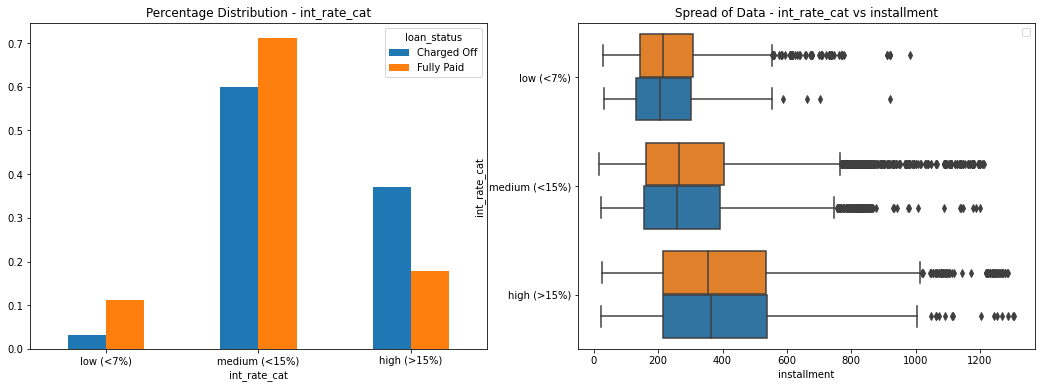

loan_status    Charged Off  Fully Paid
int_rate_cat                          
low (<7%)          204.585     215.860
medium (<15%)      258.680     265.175
high (>15%)        364.460     355.640


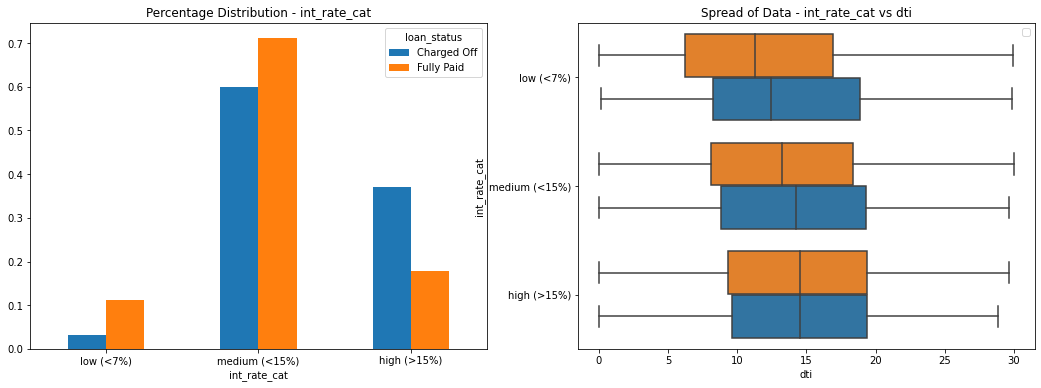

loan_status    Charged Off  Fully Paid
int_rate_cat                          
low (<7%)           12.455       11.30
medium (<15%)       14.270       13.23
high (>15%)         14.570       14.51
--------
Plotting for dti_cat


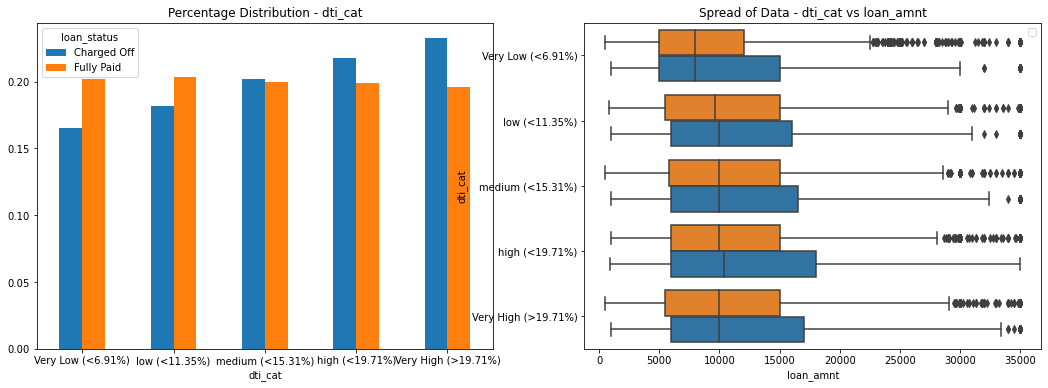

loan_status          Charged Off  Fully Paid
dti_cat                                     
Very Low (<6.91%)           8000        8000
low (<11.35%)              10000        9600
medium (<15.31%)           10000       10000
high (<19.71%)             10375       10000
Very High (>19.71%)        10000        9975


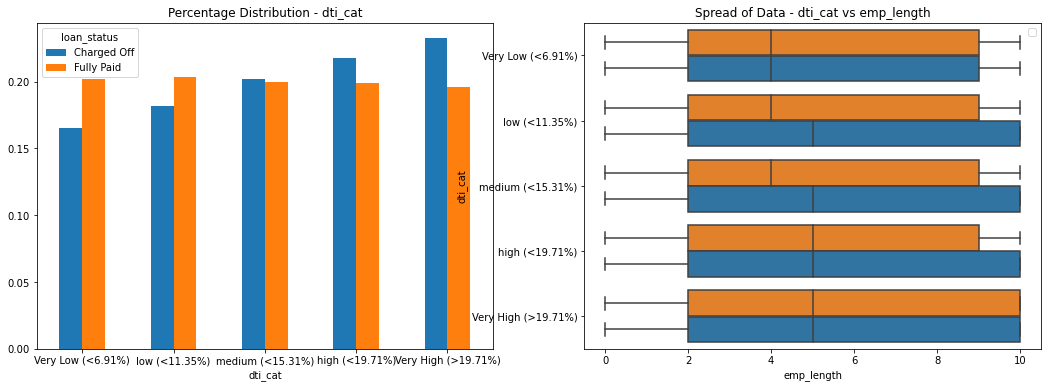

loan_status          Charged Off  Fully Paid
dti_cat                                     
Very Low (<6.91%)              4           4
low (<11.35%)                  5           4
medium (<15.31%)               5           4
high (<19.71%)                 5           5
Very High (>19.71%)            5           5


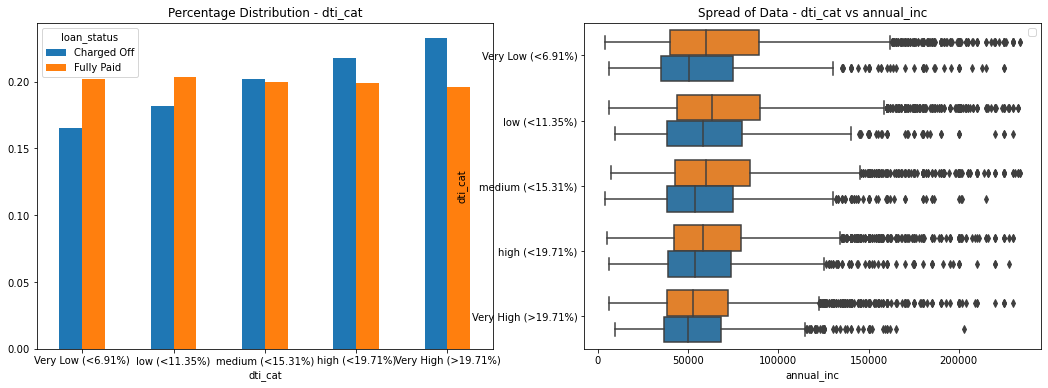

loan_status          Charged Off  Fully Paid
dti_cat                                     
Very Low (<6.91%)          50582       60000
low (<11.35%)              58000       63000
medium (<15.31%)           54000       60000
high (<19.71%)             54000       57996
Very High (>19.71%)        50000       52800


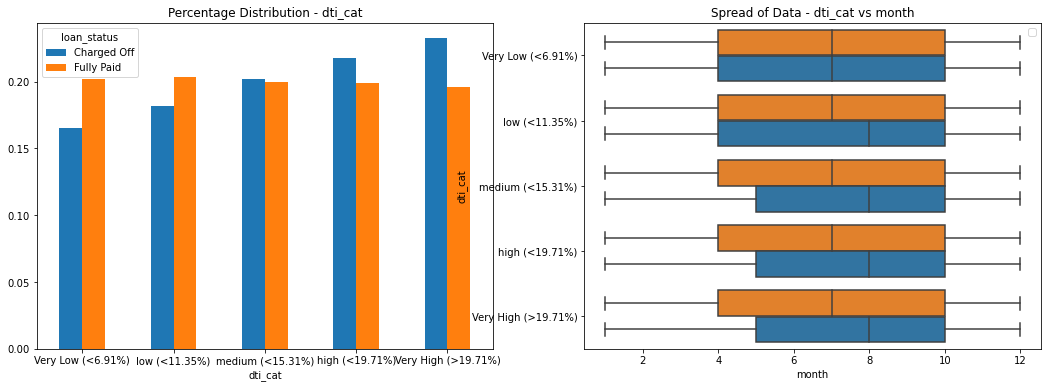

loan_status          Charged Off  Fully Paid
dti_cat                                     
Very Low (<6.91%)              7           7
low (<11.35%)                  8           7
medium (<15.31%)               8           7
high (<19.71%)                 8           7
Very High (>19.71%)            8           7


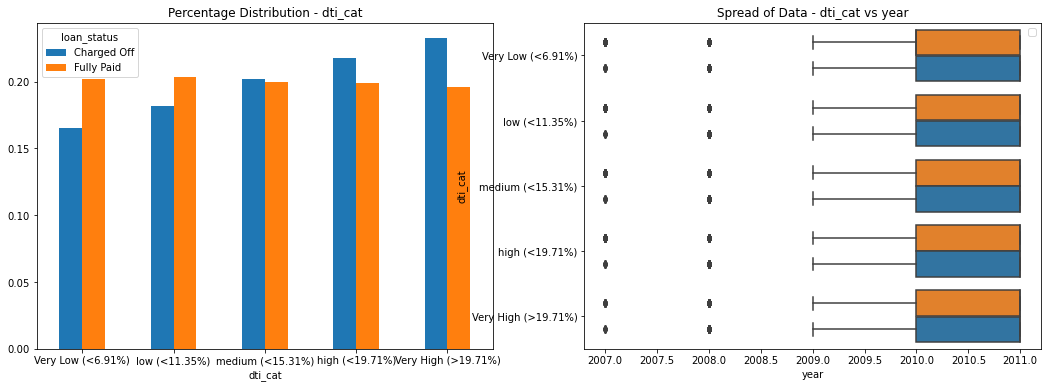

loan_status          Charged Off  Fully Paid
dti_cat                                     
Very Low (<6.91%)           2011        2010
low (<11.35%)               2011        2011
medium (<15.31%)            2011        2011
high (<19.71%)              2011        2011
Very High (>19.71%)         2011        2011


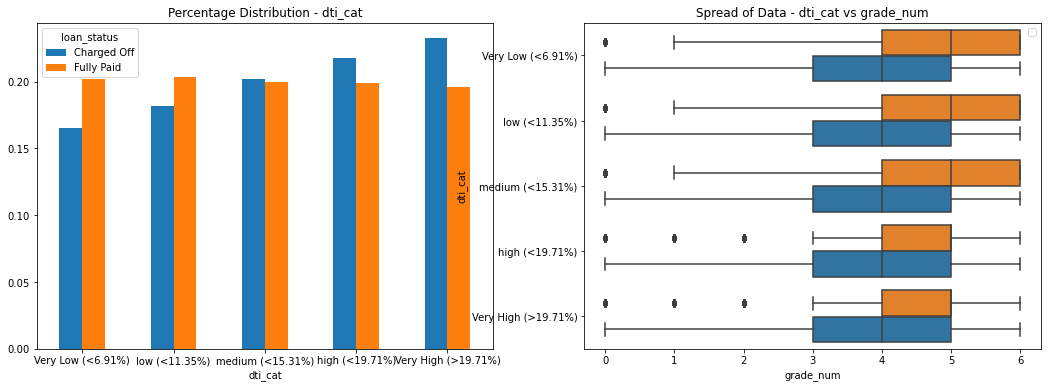

loan_status          Charged Off  Fully Paid
dti_cat                                     
Very Low (<6.91%)              4           5
low (<11.35%)                  4           5
medium (<15.31%)               4           5
high (<19.71%)                 4           5
Very High (>19.71%)            4           5


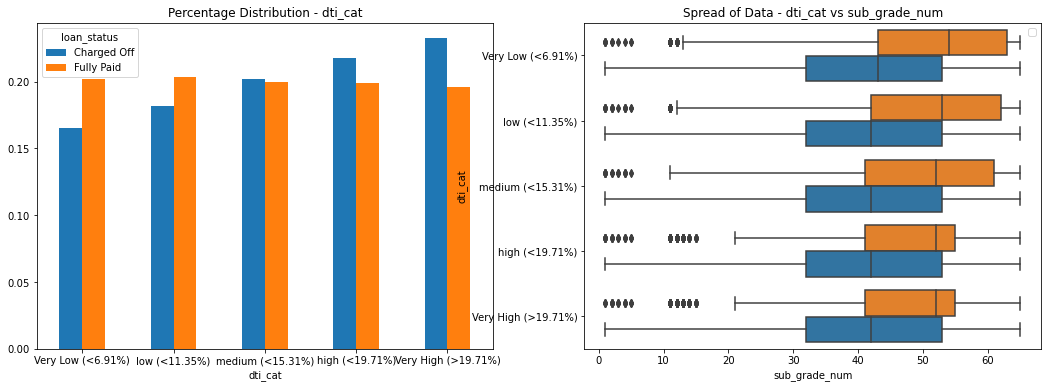

loan_status          Charged Off  Fully Paid
dti_cat                                     
Very Low (<6.91%)             43          54
low (<11.35%)                 42          53
medium (<15.31%)              42          52
high (<19.71%)                42          52
Very High (>19.71%)           42          52


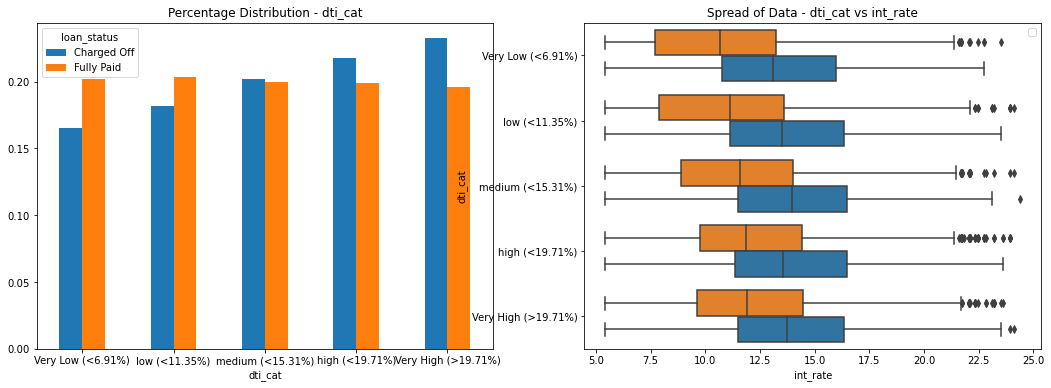

loan_status          Charged Off  Fully Paid
dti_cat                                     
Very Low (<6.91%)          13.11       10.65
low (<11.35%)              13.49       11.11
medium (<15.31%)           13.98       11.58
high (<19.71%)             13.57       11.86
Very High (>19.71%)        13.72       11.89


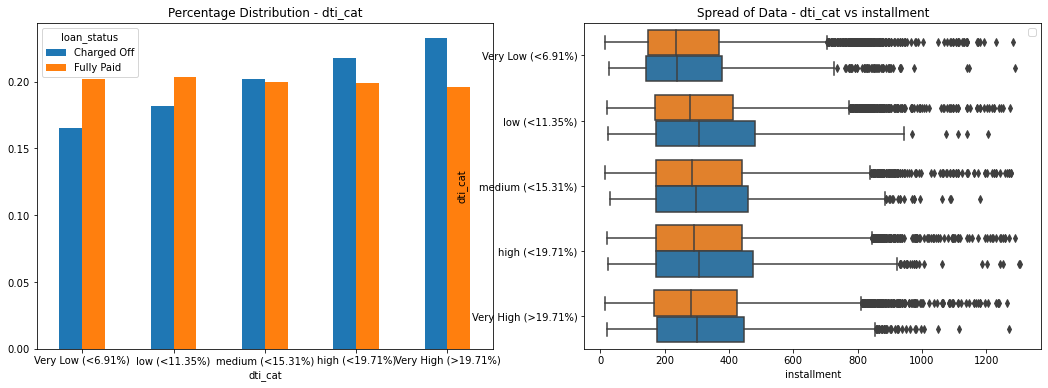

loan_status          Charged Off  Fully Paid
dti_cat                                     
Very Low (<6.91%)        240.170     236.370
low (<11.35%)            308.060     277.980
medium (<15.31%)         298.125     285.895
high (<19.71%)           308.705     292.530
Very High (>19.71%)      301.075     282.090


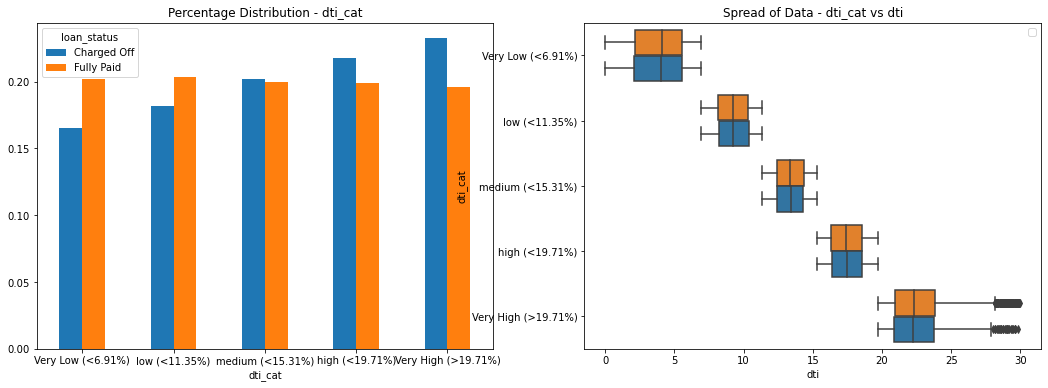

loan_status          Charged Off  Fully Paid
dti_cat                                     
Very Low (<6.91%)          4.000        4.08
low (<11.35%)              9.260        9.25
medium (<15.31%)          13.415       13.37
high (<19.71%)            17.490       17.43
Very High (>19.71%)       22.250       22.30
--------


In [169]:
for cat in categories:
    print(f'Plotting for {cat}')
    if cat == 'loan_status': 
        continue
    else:
        for num in numeric:
            if num in ['pub_rec_bankruptcies', 'loan_status_num']:
                continue
            if len(loan_df[cat].unique()) < 10:
                plot_bivariate_with_hue(num, cat, loan_df)
            else:
                top_5 = loan_df[cat].value_counts().index.to_list()[0:5]
                top_5_df = loan_df[loan_df[cat].isin(top_5[0:5])]
                plot_bivariate_with_hue(num, cat, top_5_df)
    print('--------')

### Observations from Bivariate Analysis

---

# References
- https://seaborn.pydata.org/generated/seaborn.kdeplot.html
- https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
- https://www.w3schools.com/python/python_datetime.asp
- https://www.codegrepper.com/code-examples/python/extract+month+from+datetime+pandas
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
- https://www.delftstack.com/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/
- https://www.open.edu/openlearn/ocw/mod/oucontent/view.php?printable=1&id=4089
- https://pbpython.com/pandas-qcut-cut.html
- https://www.python-graph-gallery.com/33-control-colors-of-boxplot-seaborn
- https://matplotlib.org/stable/gallery/color/named_colors.html
- https://stackoverflow.com/a/58434981/7048915